# AVACADO PROJECT
                                          
                                          
                                          
                                          
## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

### Content:-

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Some relevant columns in the dataset:-

######  Date - The date of the observation
######  AveragePrice - the average price of a single avocado
######  type - conventional or organic
######  year - the year
######  Region - the city or region of the observation
######  Total Volume - Total number of avocados sold
######  4046 - Total number of avocados with PLU 4046 sold
######  4225 - Total number of avocados with PLU 4225 sold
######  4770 - Total number of avocados with PLU 4770 sold


### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

### Task: 
One of Classification and other of Regression



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [4]:
# loading the dataset
avacado = pd.read_csv('avocado.csv')

In [5]:
avacado.head()
# looking at the first 5 rows

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [6]:
avacado.tail()
# last five rows

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [7]:
avacado.shape

# We have more than 18000 rows and 14 columns

(18249, 14)

In [8]:
avacado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
avacado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
# There are 9 features with float datatypt

# AND there are three object data types

# out of them, we have to convert Date feature which is object type in to DateTime datatype to further analysis the data based on the timeseries

# Also there is one feature called 'Unnamed:0' which we have to analyse further.

# HERE WE HAVE TWO cases we have to solve

# That is we have to predict the Average Price of the avacado and also we have to predict the region of the avacado

# we will have to use both regression and classification models for the given problem statements.

In [11]:
# CHECKING THE NULL VALUES

In [12]:
avacado.isnull().sum()

# There are no null values in the data

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

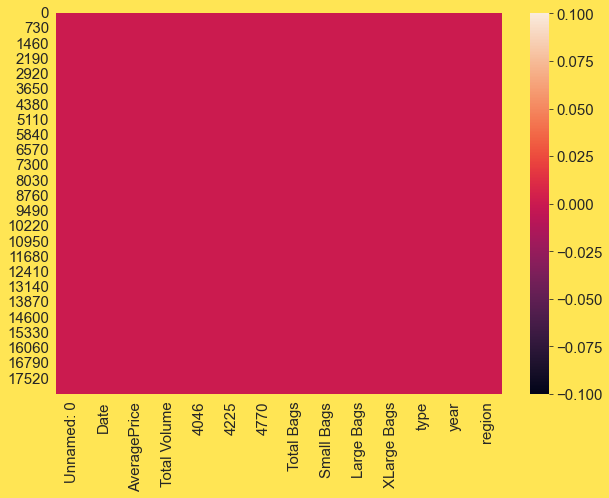

In [13]:
# plotting a heatmap 
sns.heatmap(avacado.isnull())

# Reconfirming no null values

In [14]:
# dropping the duplicates
duplicates = avacado[avacado.duplicated()]
duplicates

# there are no duplicates

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [15]:
# Converting Date into datetime datatype 
avacado['Date'] = pd.to_datetime(avacado['Date'])

In [16]:
# checking the datatypes again
avacado.dtypes

# We can see that the datatype of date is changed to datetime

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [17]:
# Now we will seperate the month and day from the date and make them as new features
avacado['Month'] = avacado['Date'].dt.month

In [18]:
# now day
avacado['Day'] = avacado['Date'].dt.day

In [19]:
avacado.sample(5)

Unnamed: 0       Date  AveragePrice  Total Volume       4046  \
9777           27 2015-06-21          1.43      31954.94    9953.25   
1301            1 2015-12-20          1.05    2044020.93  446433.13   
7156            3 2017-12-10          1.17    5543004.84  235645.01   
8223           10 2017-10-22          1.51      44004.03    9115.03   
15628          39 2017-04-02          1.95       9170.10     888.85   

             4225      4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
9777      2917.93     21.75    19062.01      740.07    18321.94         0.00   
1301   1024405.09  96387.48   476795.23   434534.42    38523.10      3737.71   
7156   4168090.07   8054.61  1131215.15   960202.45   170986.87        25.83   
8223     23293.35     47.27    11548.38     9164.30     2384.08         0.00   
15628      665.19      9.27     7606.79     7606.79        0.00         0.00   

               type  year              region  Month  Day  
9777        organic  2015              Denver      6   21  
1301   conventional  2015            Midsouth     12   20  
7156   conventional  2017           Northeast     12   10  
8223   conventional  2017            Syracuse     10   22  
15628       organic  2017  HarrisburgScranton      4    2

In [20]:
avacado.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [21]:
# checking the number of unique values in the df
avacado.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [22]:
# Since we got the month and day column seperately and there is already year present in the dataset
# We can go ahead and drop the Datetime column
#avacado.drop(['Date'],axis=1,inplace=True)

In [23]:
avacado.sample()

Unnamed: 0       Date  AveragePrice  Total Volume    4046      4225  \
5368          12 2016-10-02          1.43      53796.49  987.21  32211.73   

       4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
5368  37.44    20560.11    20560.11         0.0          0.0  conventional   

      year    region  Month  Day  
5368  2016  Syracuse     10    2

# EDA

In [24]:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
 14  Month         18249 non-null  int64         
 15  Day           18249 non-null  int64 

In [25]:
avacado.describe().T

# we can see the data description of the integer and continuous data
# we can observe most of these features are highly right skewed , beacause there mean is greater than median
# there are many outliers presnet in some of the features


count           mean           std      min       25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.00   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   
Month         18249.0       6.177215  3.534130e+00     1.00      3.00   
Day           18249.0      15.662612  8.776281e+00     1.00      8.00   

                    50%        75%          max  
Unnamed: 0        24.00      38.00        52.00  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00  
Month              6.00       9.00        12.00  
Day               16.00      23.00        31.00

In [26]:
# categorical description
avacado.describe(include='O').T

# avacoado has two types and there are 54 regions

count unique           top  freq
type    18249      2  conventional  9126
region  18249     54        Albany   338

In [27]:
avacado['region'].nunique()
# we can see there is equal amount of data for each region, Although WestexNewMexico is 3 rows short than other regions

54

In [28]:
# We can see that the Unnamed column represent the index of the region coulumn
# So it is similar to the region and it is unnecessary to keep the column for  further analysis and model building
avacado['Unnamed: 0'].nunique()

53

In [29]:
# So We are going to drop the column Unnamed: 0
avacado.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [31]:
# DROPPING the date coulumn as well, because we already have the  seperated month day and year columns
avacado.drop(['Date'],axis=1,inplace=True)

In [32]:
avacado.sample(3)

AveragePrice  Total Volume         4046         4225       4770  \
9099           1.08   42939821.55  14218843.83  13929702.12  928815.12   
13731          1.49       7189.09      1007.26       247.63       6.69   
7536           1.90     363427.67     92601.95    111769.87   14976.51   

        Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
9099   13862460.48  9866218.28  3789722.90    206519.30  conventional  2018   
13731      5927.51     5927.51        0.00         0.00       organic  2016   
7536     144079.34    87516.85    54855.78      1706.71  conventional  2017   

           region  Month  Day  
9099      TotalUS      1   21  
13731  Pittsburgh      5   29  
7536     Portland     10    8

### UnivariateAnalysis

In [33]:
avacado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [34]:
# seperating the categorical and continuous variables

cont_cols = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']         
cat_cols = ['type','year','region','Month','Day']

conventional    9126
organic         9123
Name: type, dtype: int64


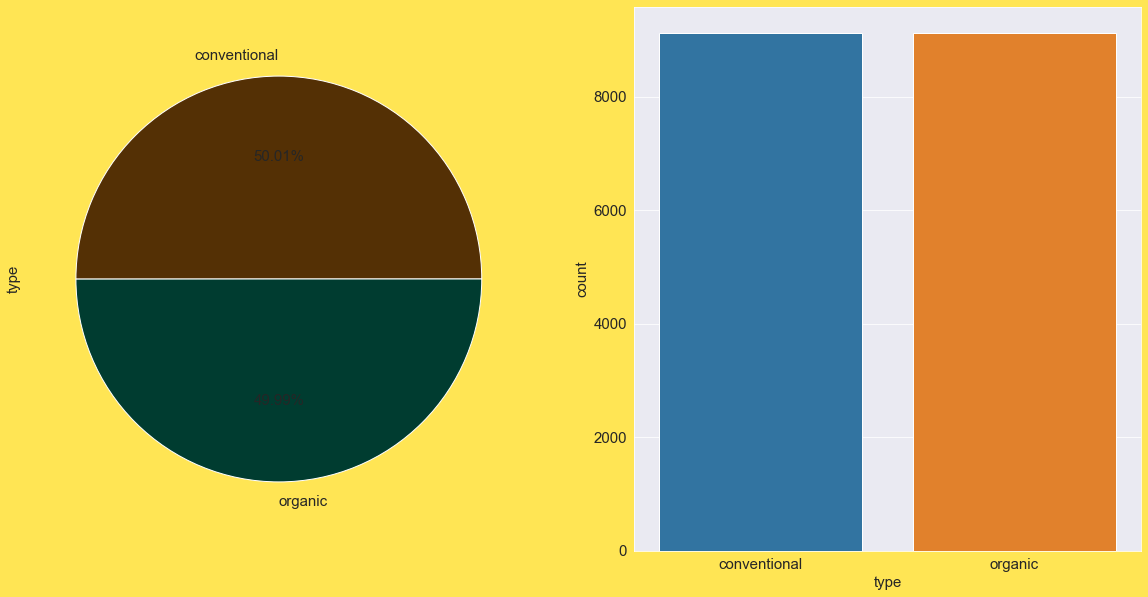

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


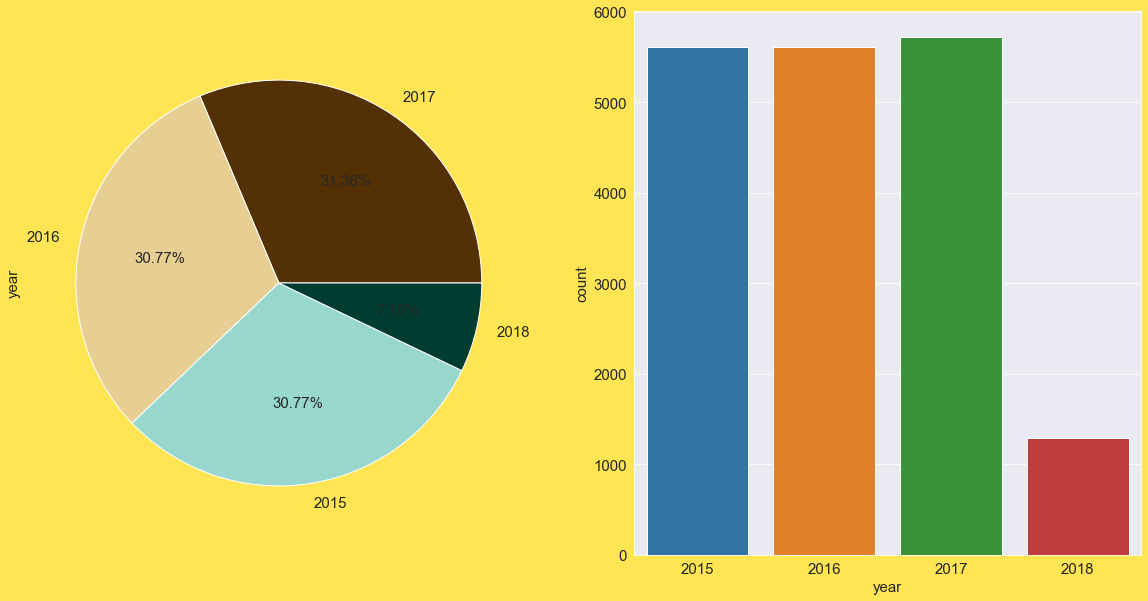

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

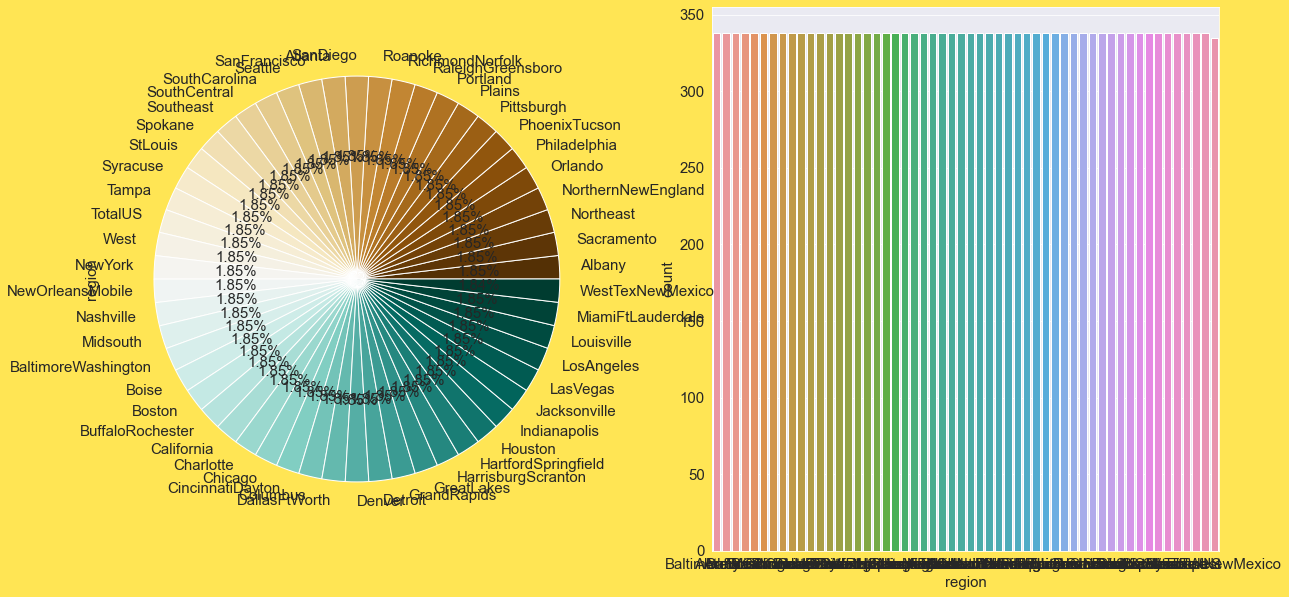

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


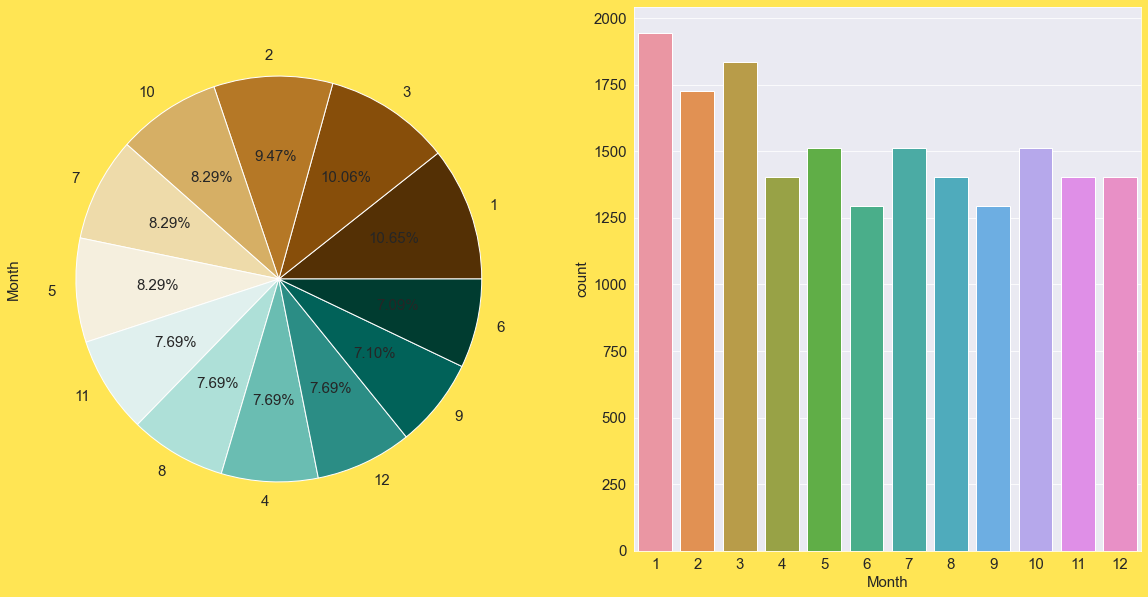

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Day, dtype: int64


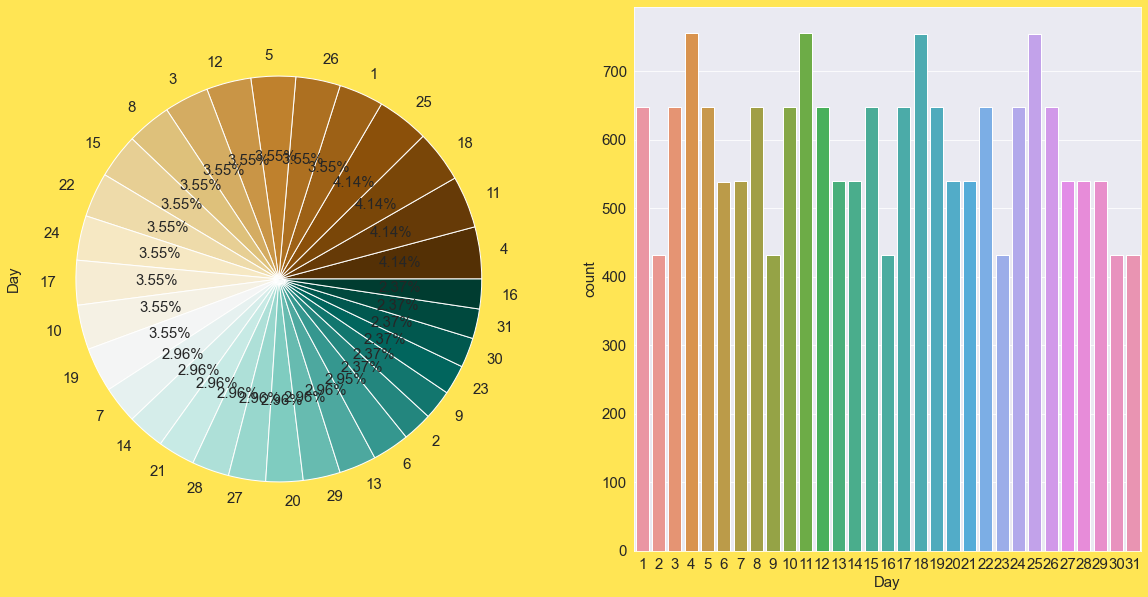

In [35]:
# We are plotting cat and pie plots to see the frequency of the categorical data

for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(avacado[i])
    plt.subplot(1,2,1)
    avacado[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(avacado[i].value_counts())
    plt.show()

In [35]:
# from above we can say that there are equal quantity of avacado types in the data

# We can observe more frequency of data in 2017, which we will find out why it is highest in our further analysis.

# And Also, In january month the data is more comaparitively with the other months and at the middle or half of the year in june the frequency is less

# There are 54 different region where the observations have been done
 

Now lets check the distribution of the features

We will also analyse the data with respect to region and AveragePrice as targets individually

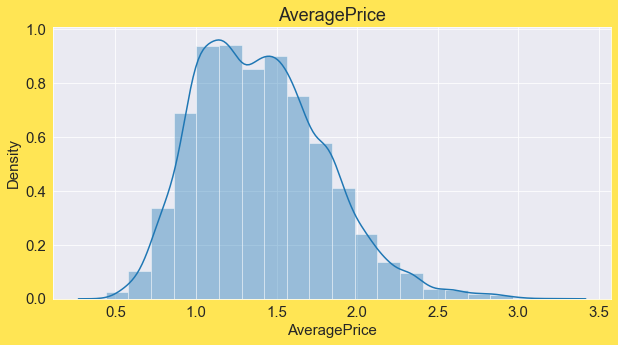

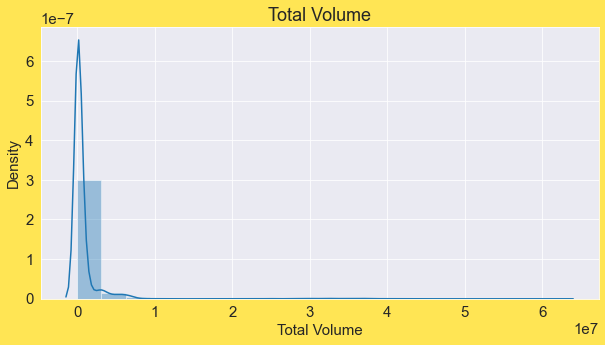

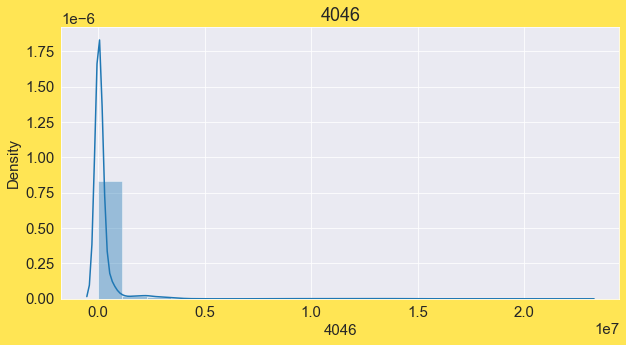

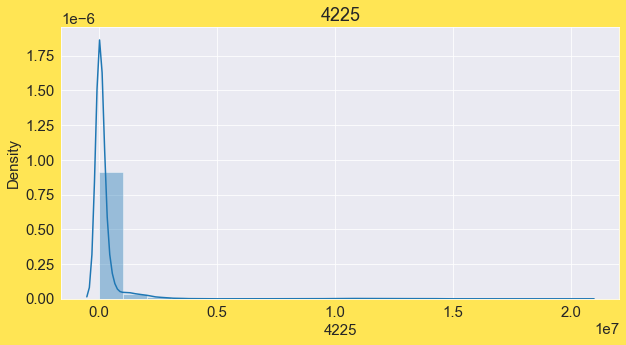

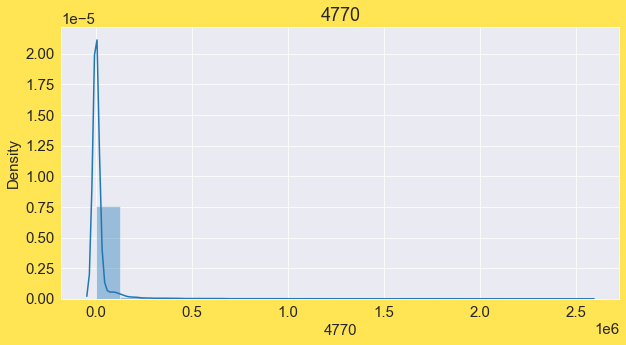

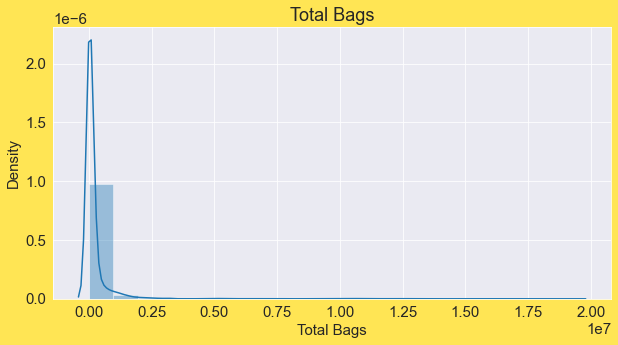

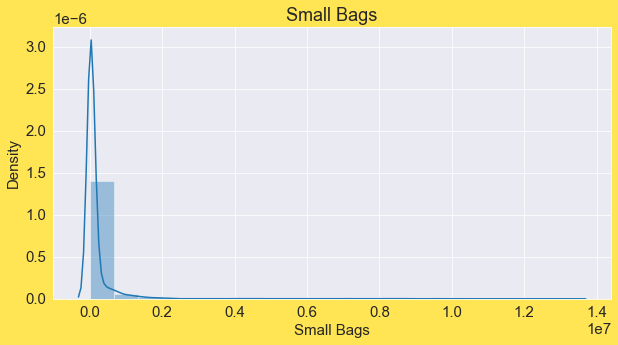

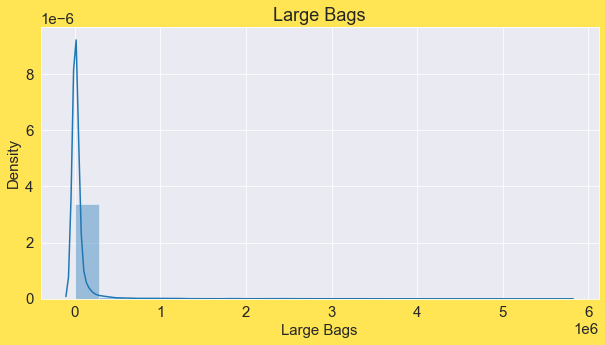

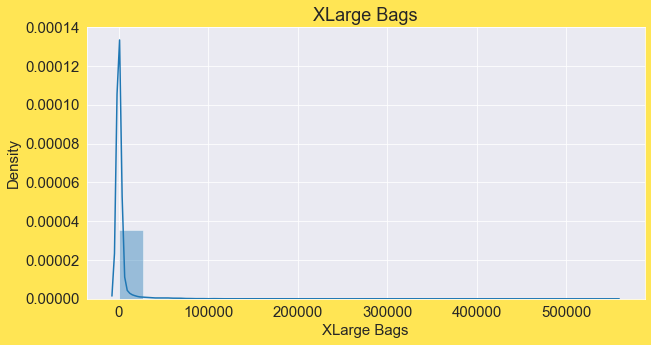

In [36]:
for i in avacado[cont_cols]:  
    
    plt.figure(figsize = (10, 5))
    sns.distplot(avacado[i],bins = 20)
    plt.title(i)
    plt.show()

In [37]:
# We can observe there is high amount of right skewness in all the columns

### Bivariate Analysis

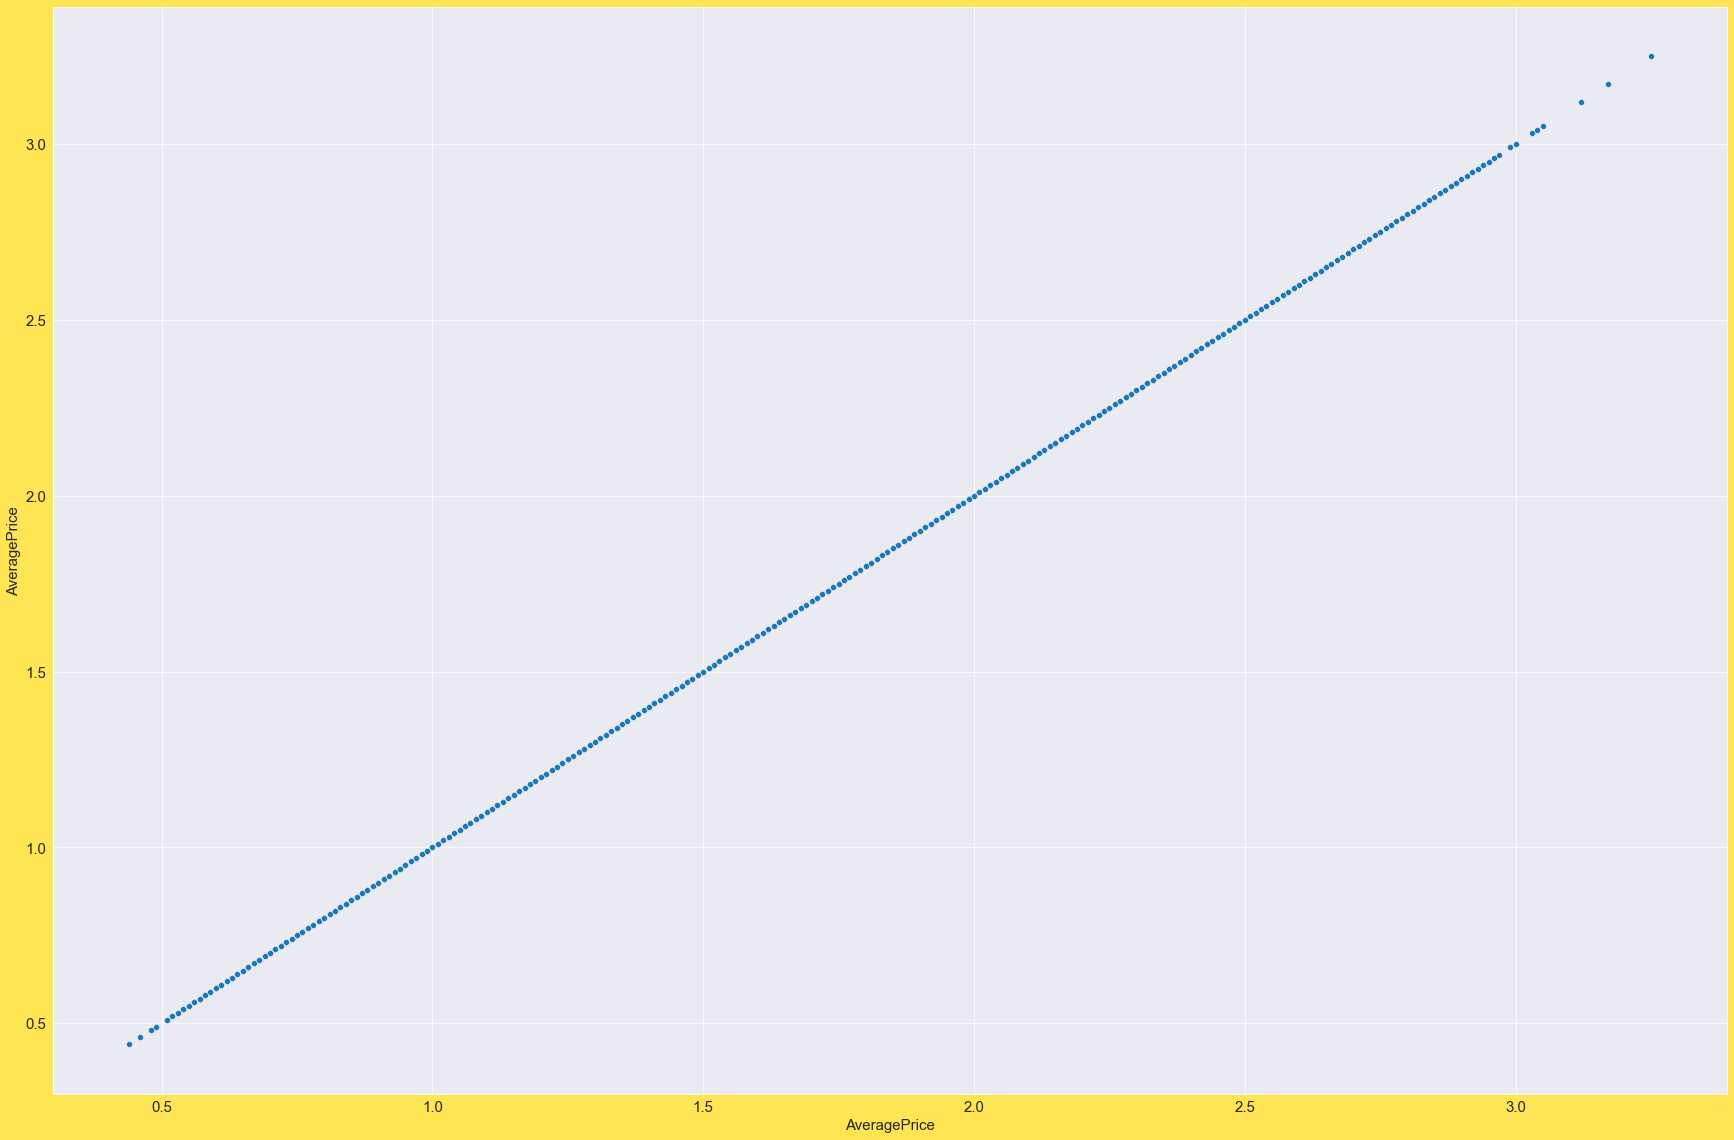

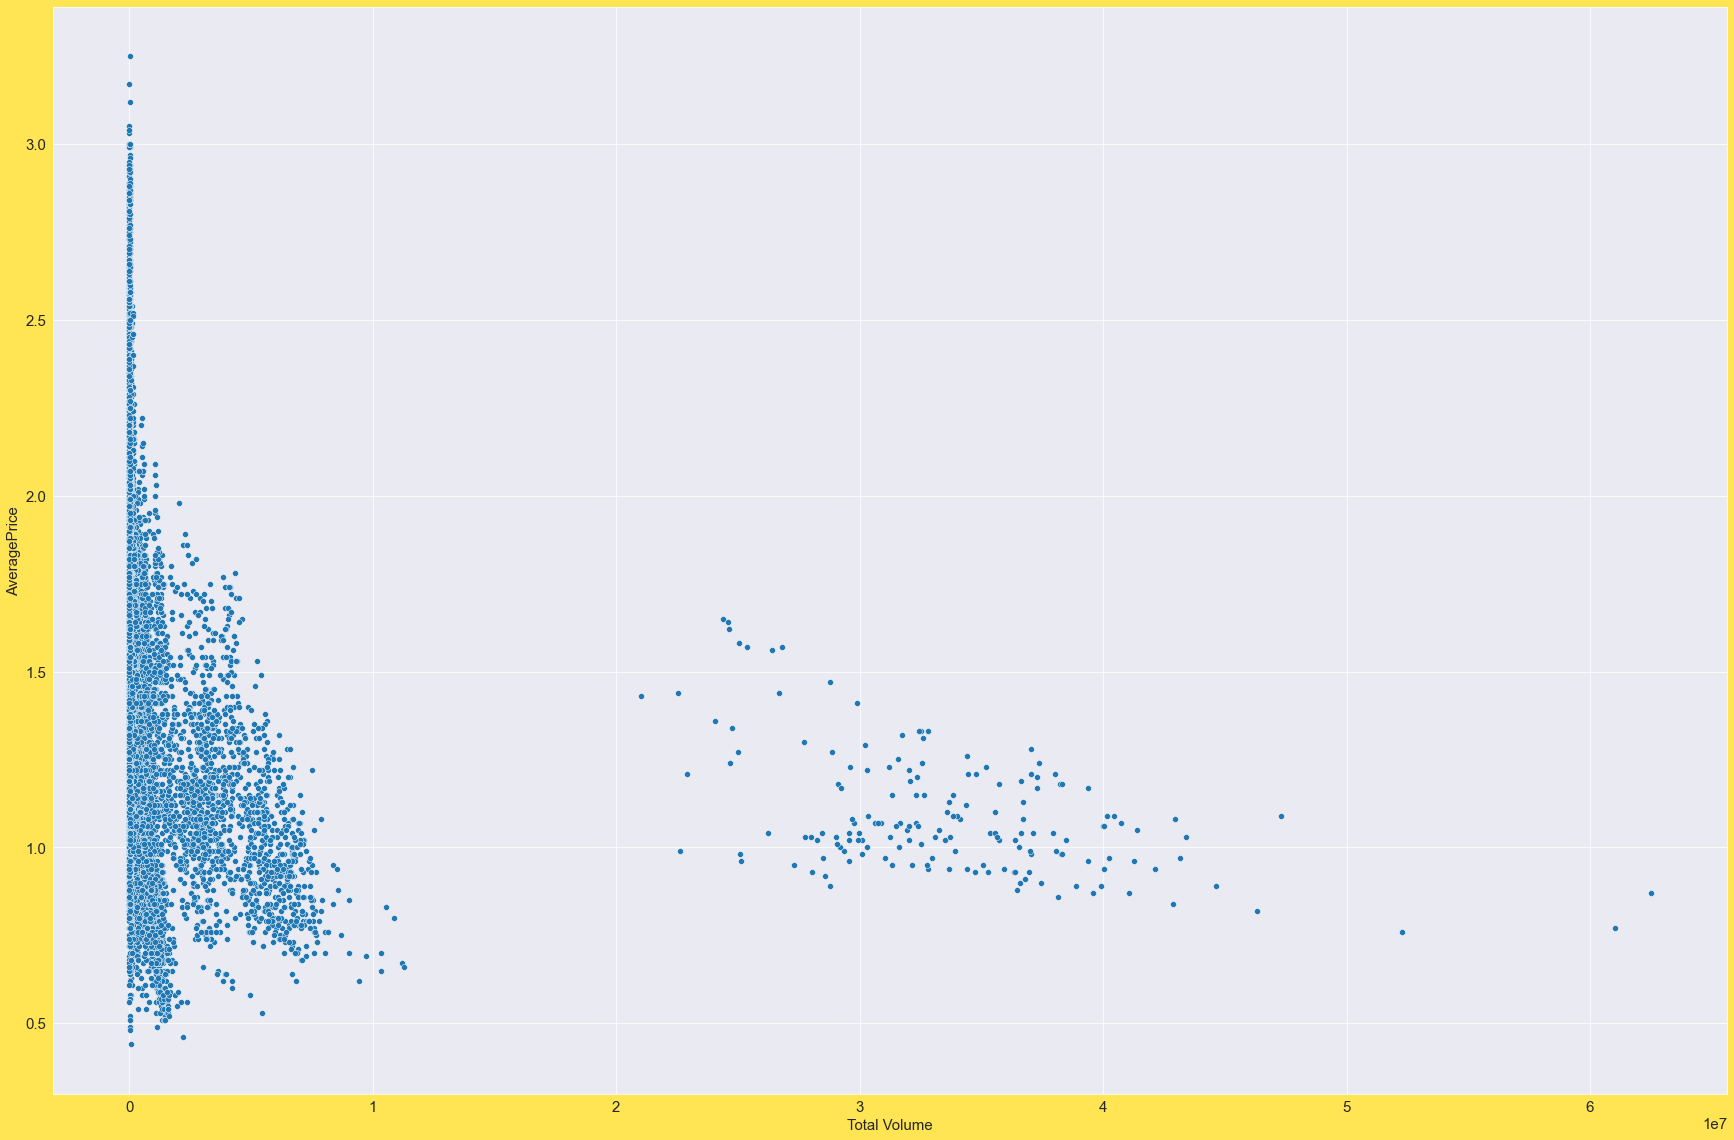

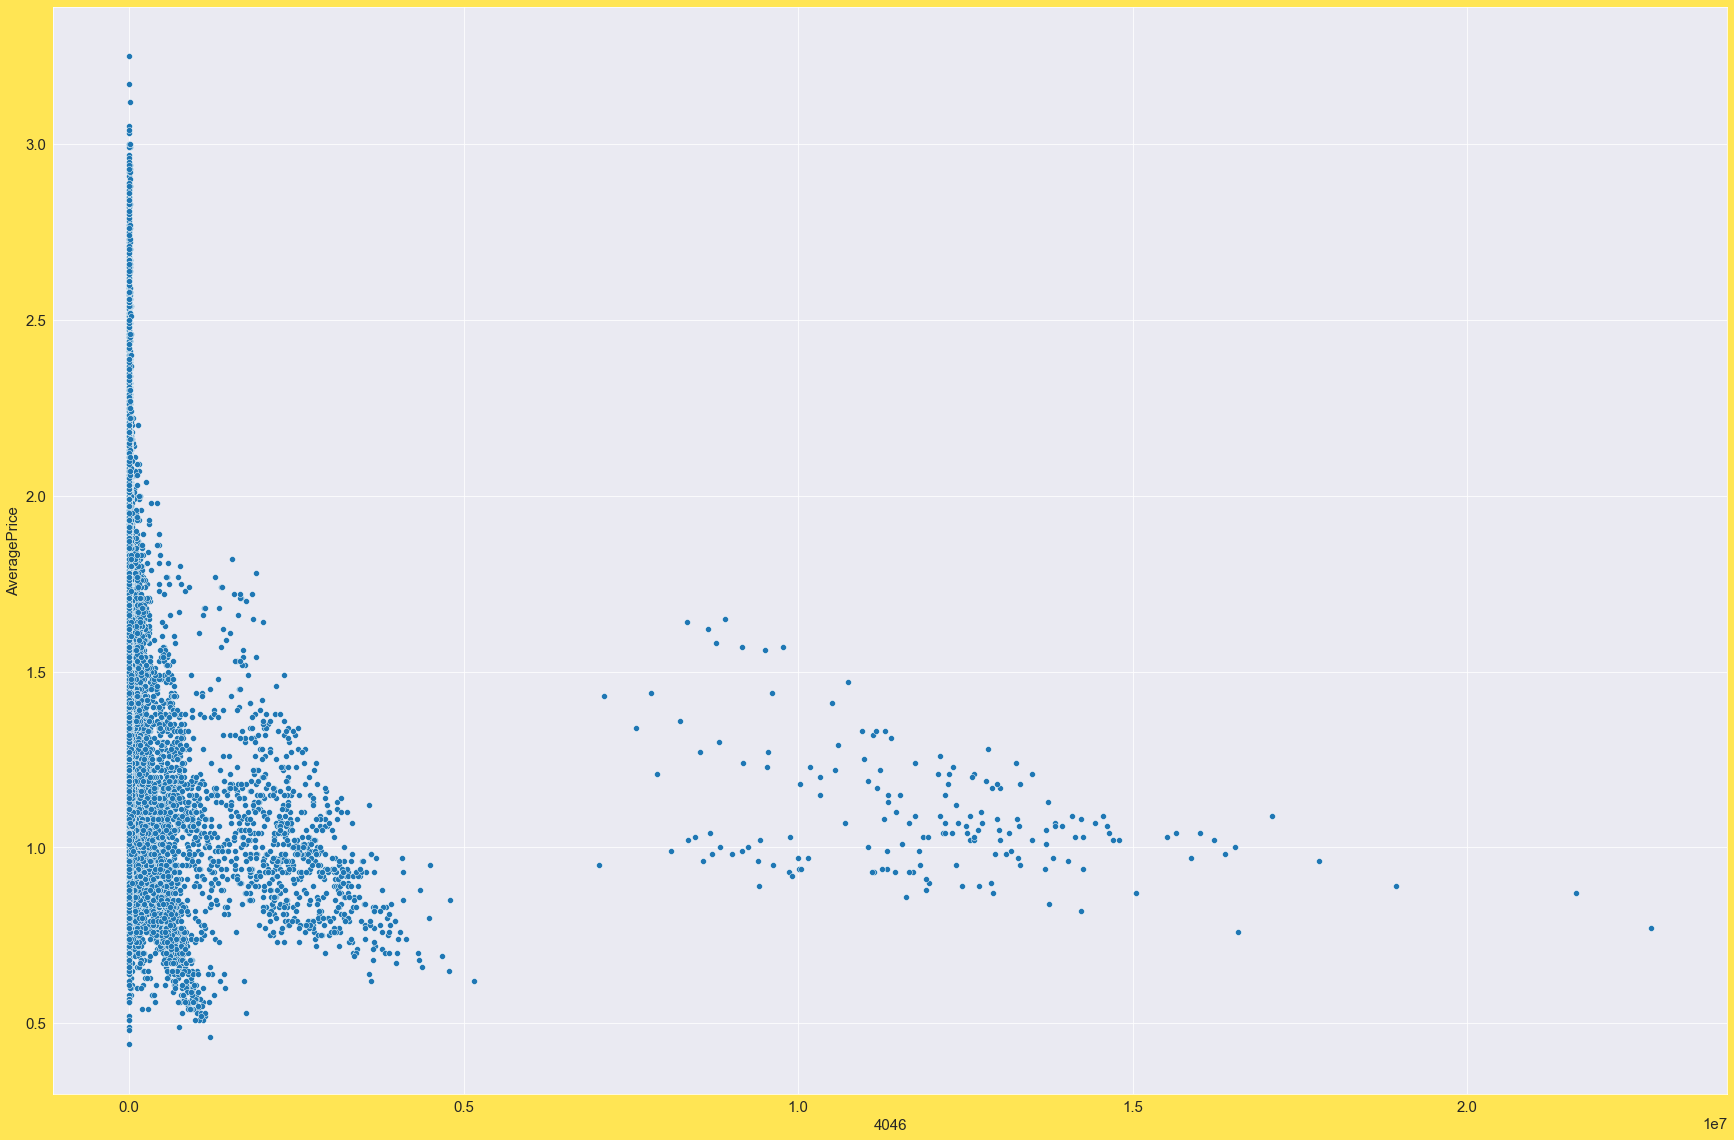

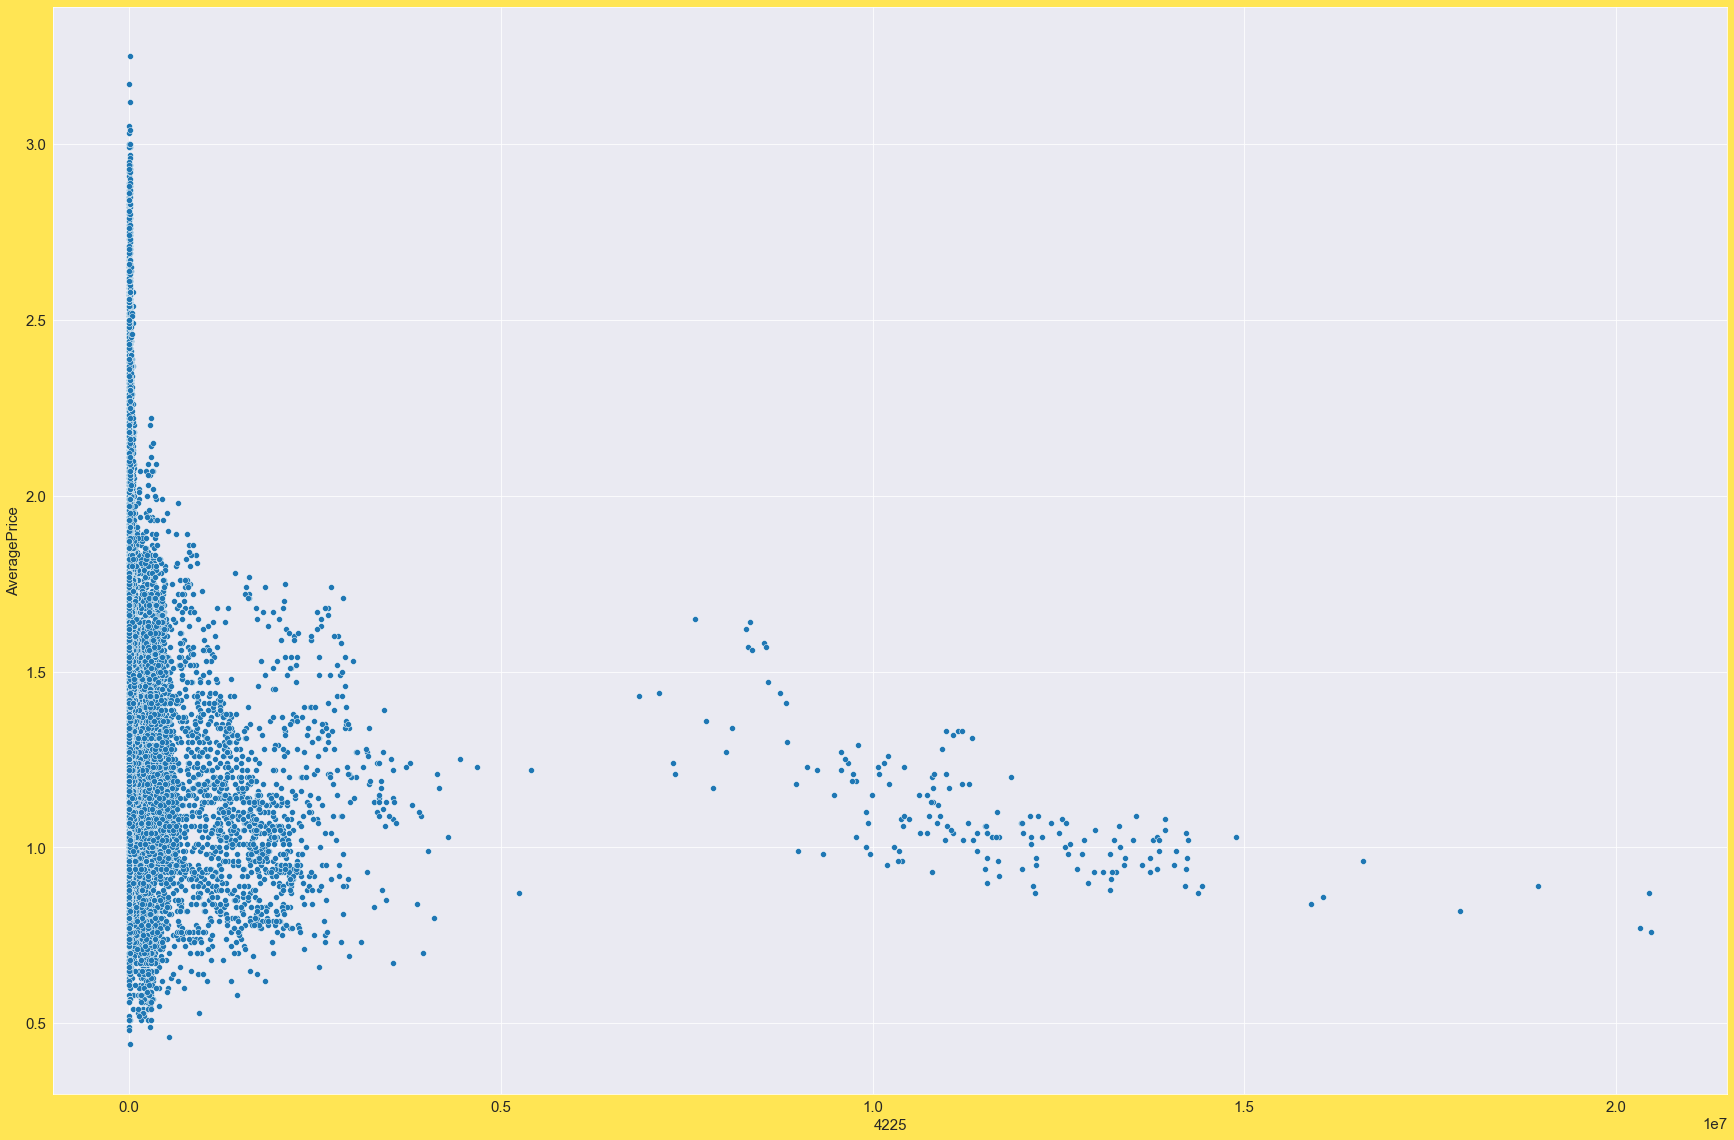

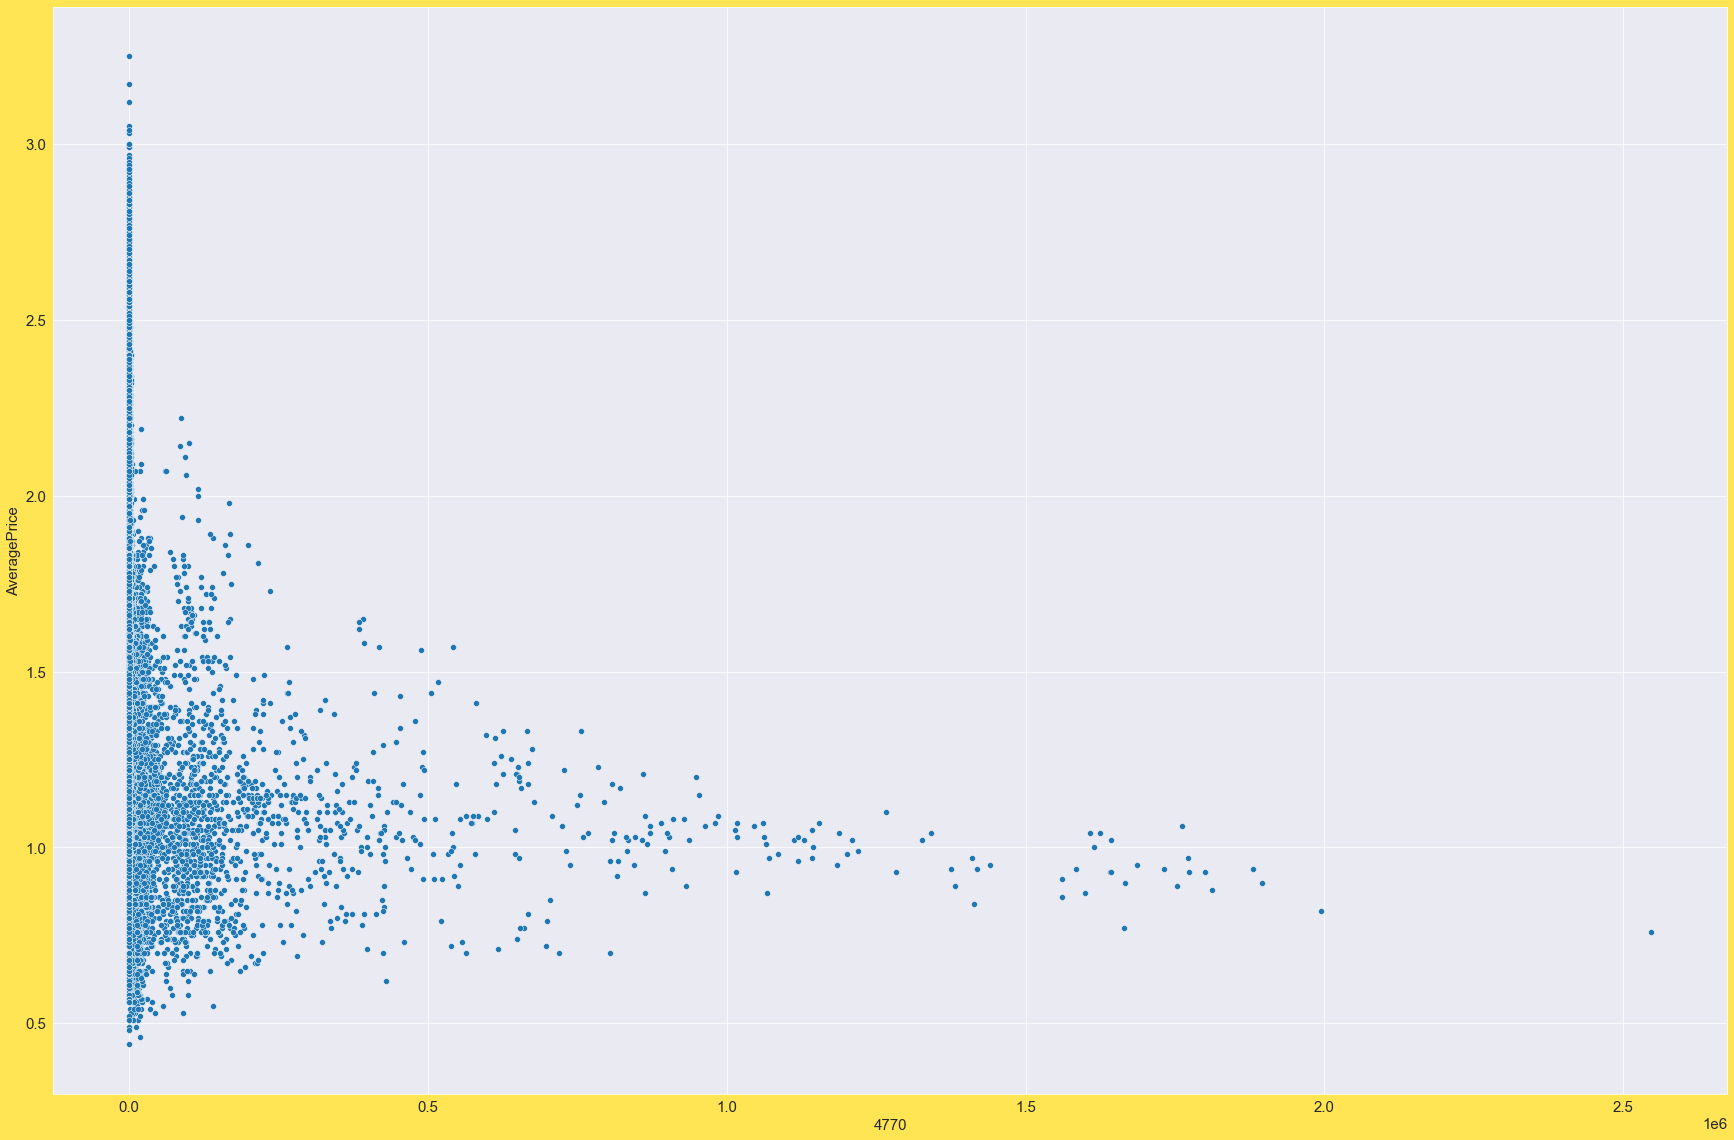

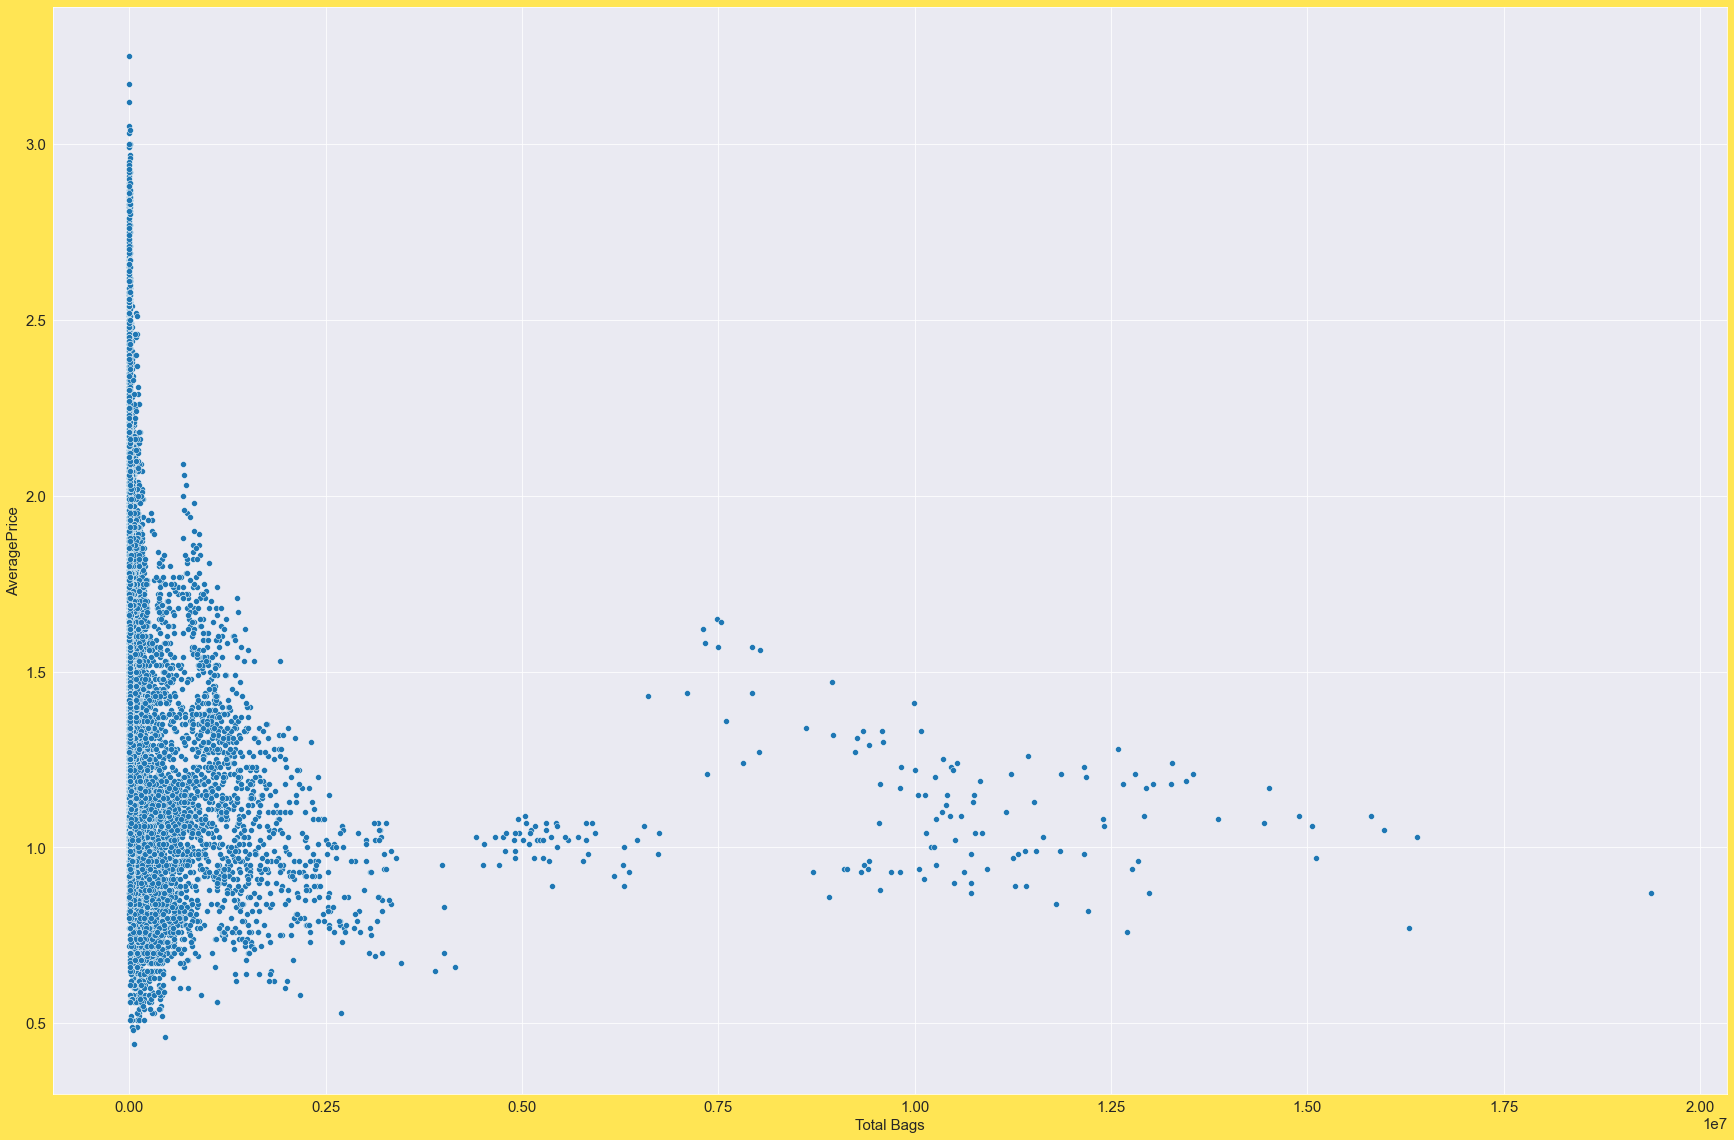

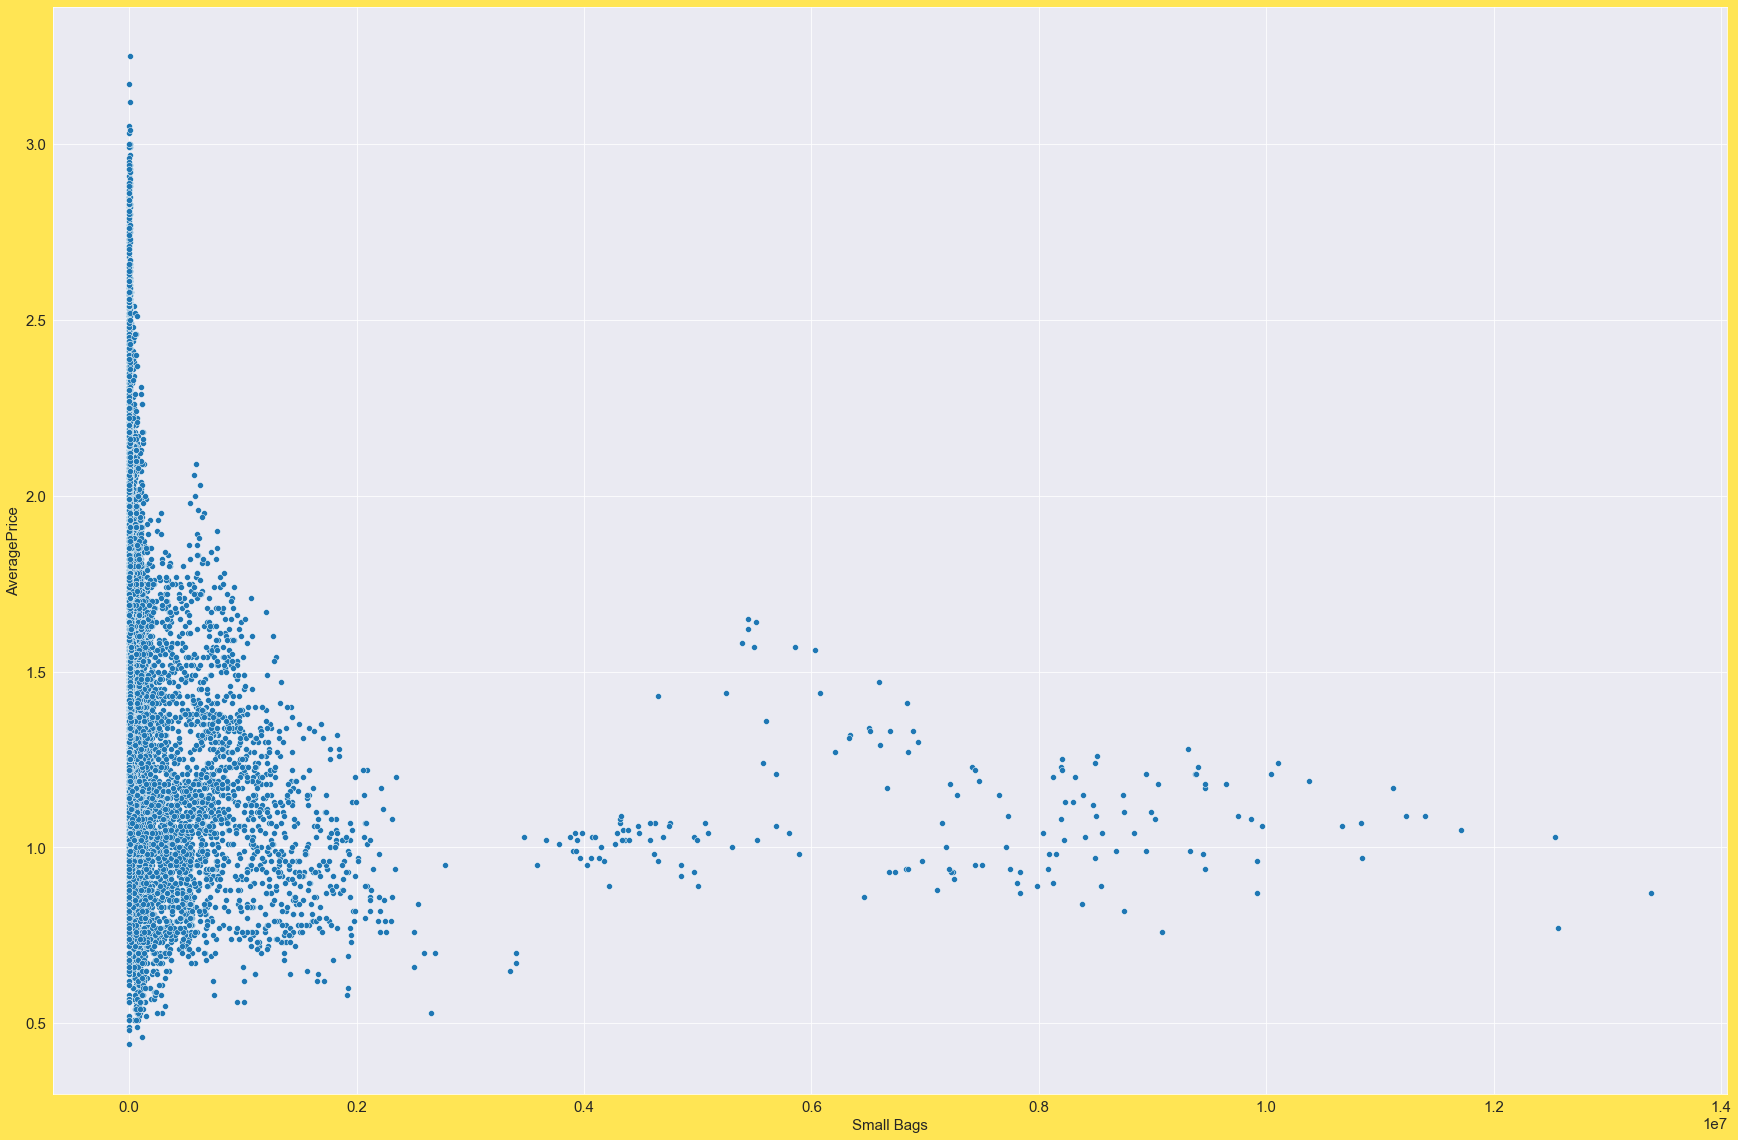

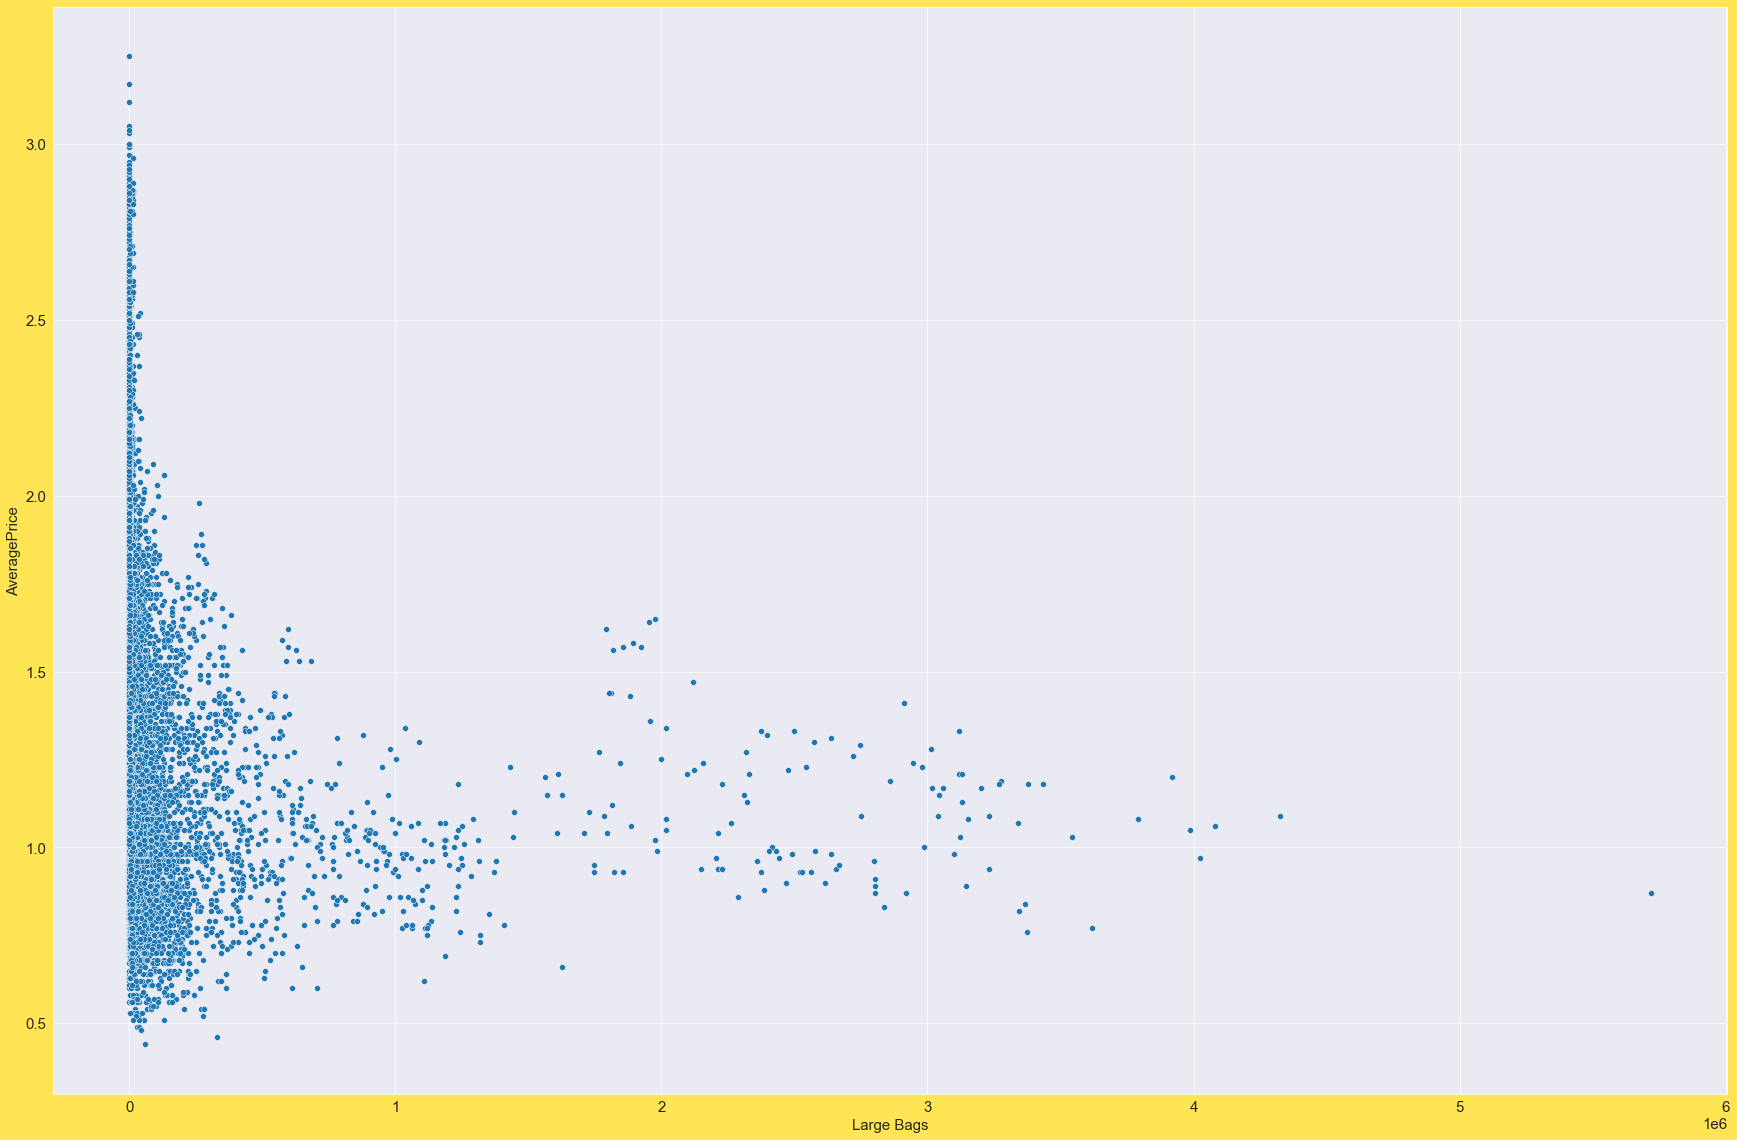

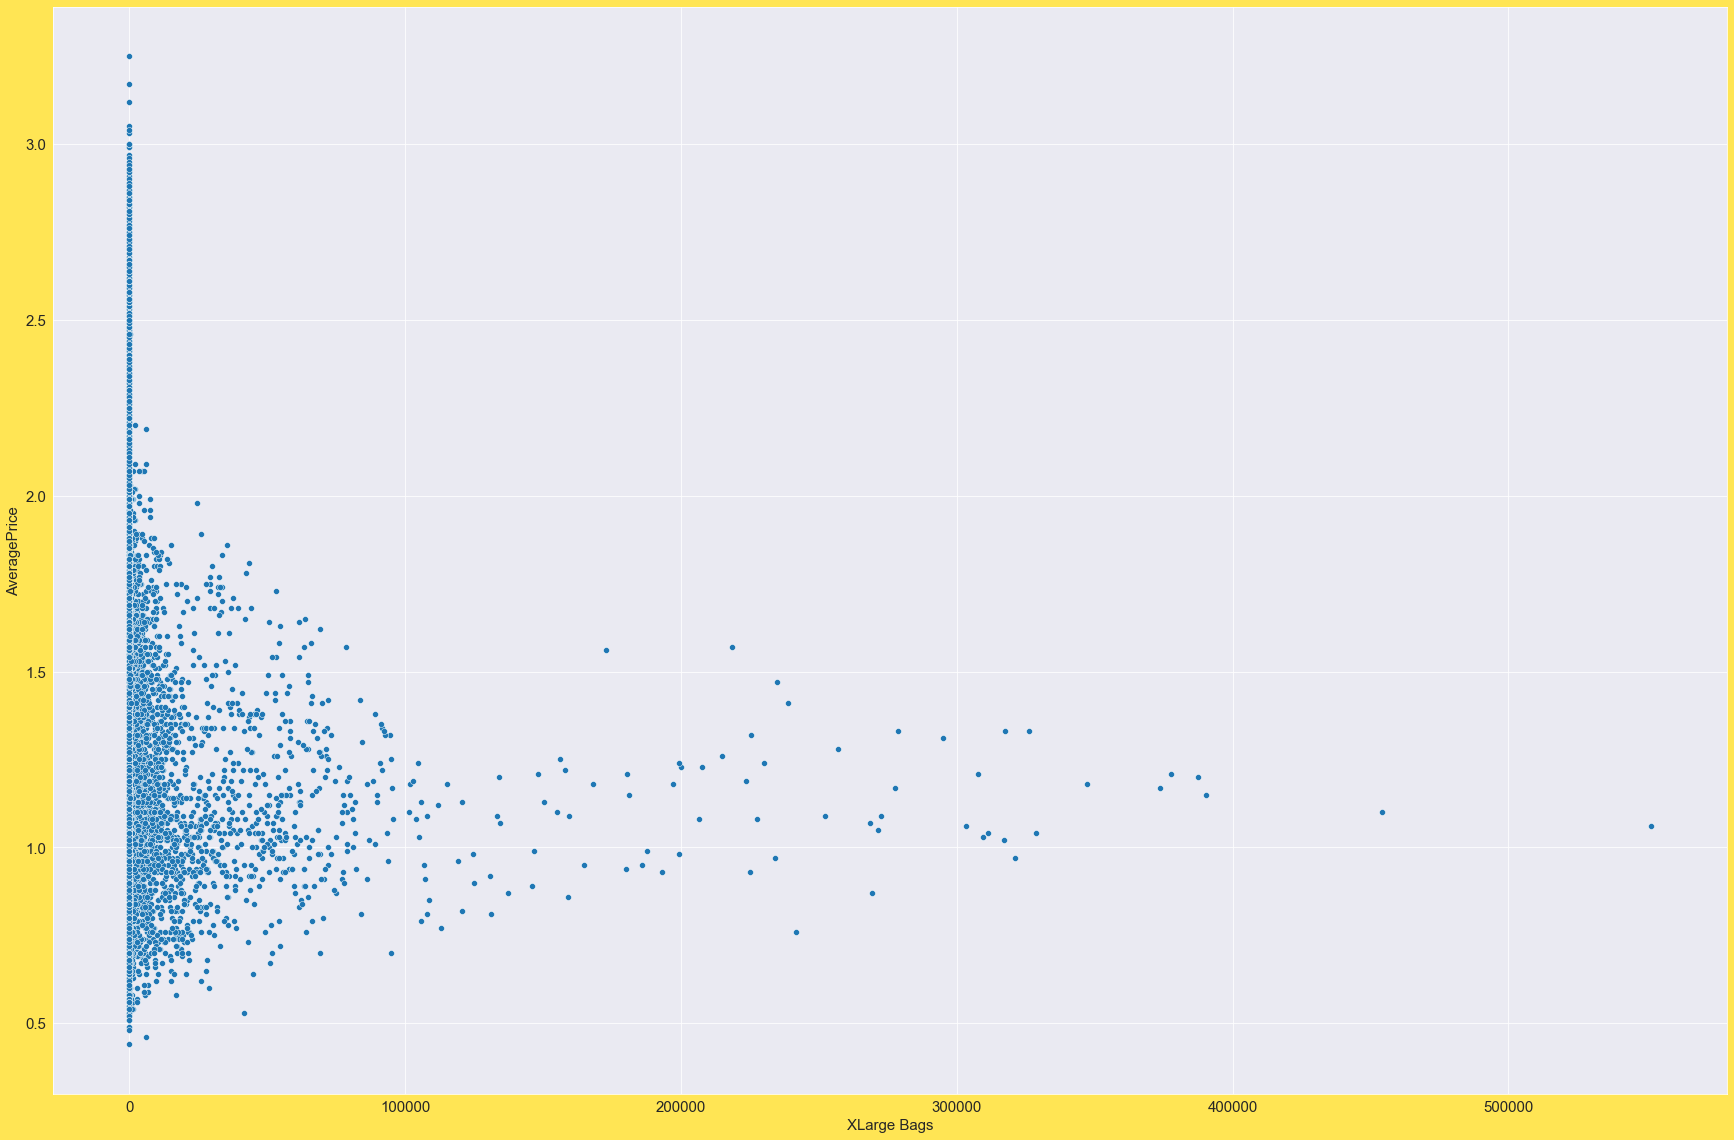

In [38]:
# Lets observe the data  distribution with respect to the target AveragePrice

for i in cont_cols:
    
    plt.figure(figsize=(30,20))
    sns.scatterplot(i,'AveragePrice',data=avacado)
    plt.xlabel(i)
    plt.ylabel('AveragePrice')
    plt.show()

In [39]:
# We can't really interpret anything from the data, because the data is onesided or highly right skewed

<AxesSubplot:title={'center':'Comparision between AveragePrice and Total Volume'}, xlabel='AveragePrice', ylabel='Total Volume'>

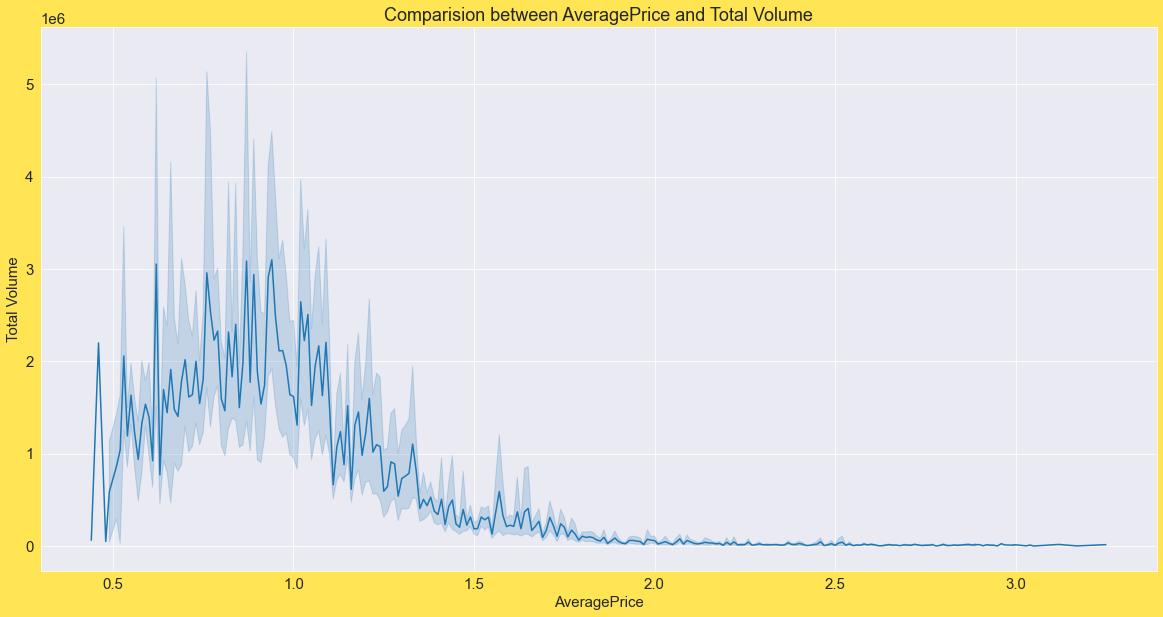

In [40]:
#Comparision between features using line plot
plt.figure(figsize=(20,10))
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(avacado['AveragePrice'],avacado['Total Volume'])

# We can see that As the average price is between 0.5to1.5 then the Total Volume is between 0-3.

<AxesSubplot:title={'center':'Comparision 4046 and 4225'}, xlabel='4046', ylabel='4225'>

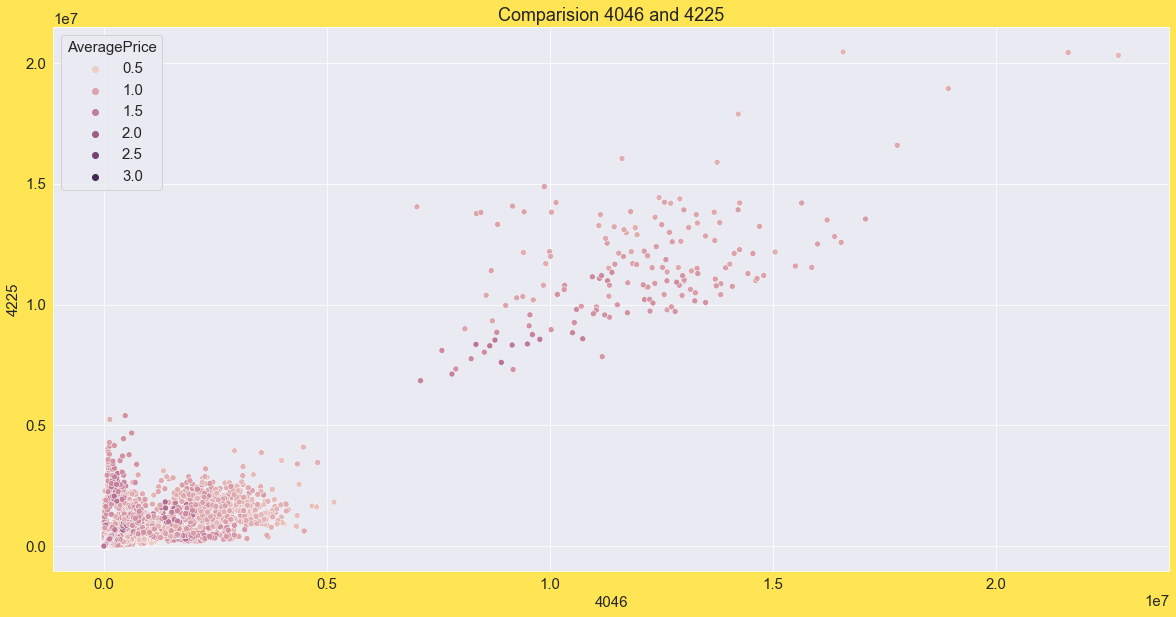

In [41]:
#Comparision between features using scatter plot
plt.figure(figsize=(20,10))
plt.title('Comparision 4046 and 4225')
sns.scatterplot(avacado['4046'],avacado['4225'],hue=avacado["AveragePrice"])

# We can see the points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

<AxesSubplot:title={'center':'Comparision Total Bags and Small Bags'}, xlabel='Total Bags', ylabel='Small Bags'>

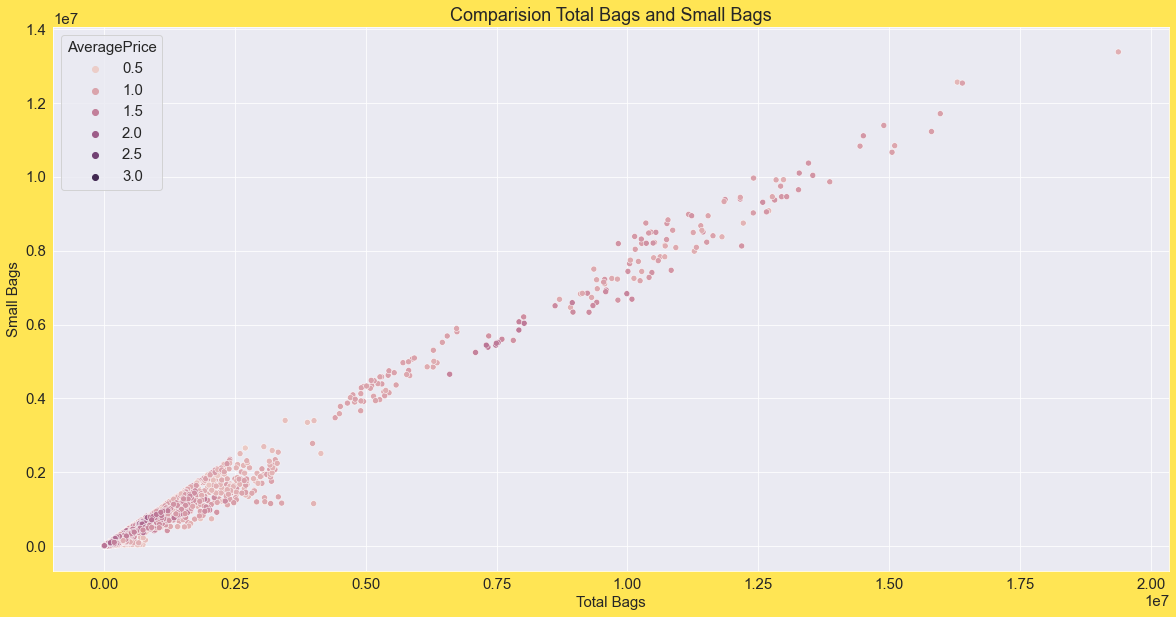

In [42]:
#Comparision between features using scatter plot
plt.figure(figsize=(20,10))
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(avacado['Total Bags'],avacado['Small Bags'],hue=avacado["AveragePrice"])

# We can see that there is a linear distribution of Total bags and Small bags

<AxesSubplot:title={'center':'Comparision between Large Bags and XLarge Bags'}, xlabel='Large Bags', ylabel='XLarge Bags'>

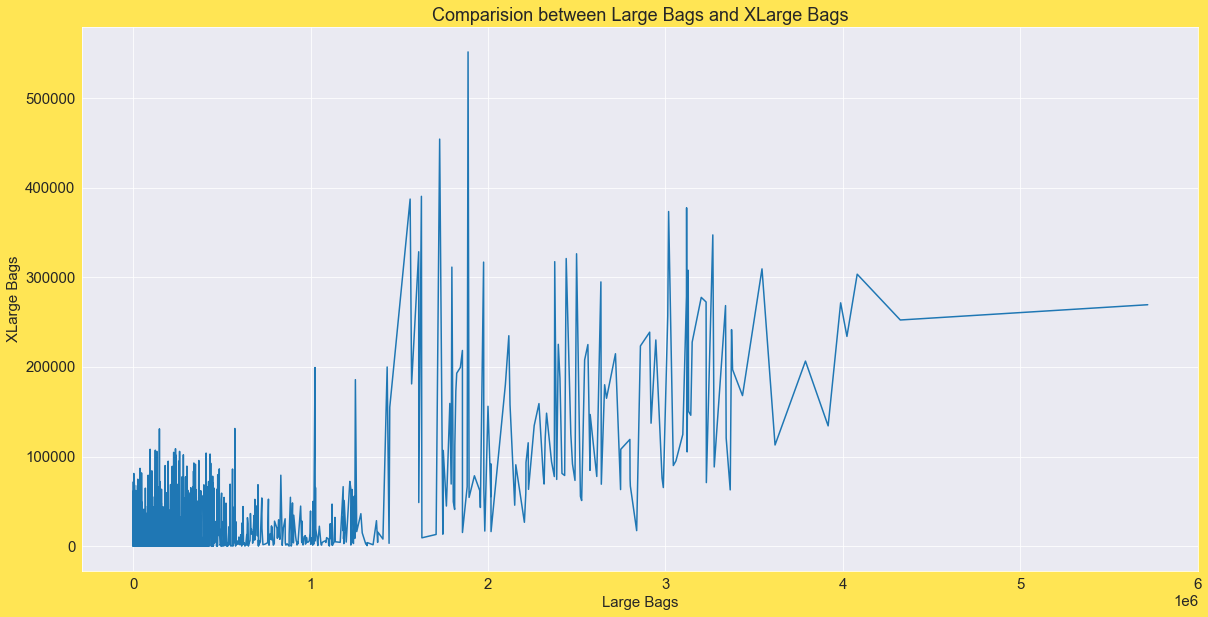

In [43]:
#Comparision between features using line plot
plt.figure(figsize=(20,10))
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(avacado['Large Bags'],avacado['XLarge Bags'])

Text(0, 0.5, 'Average Price')

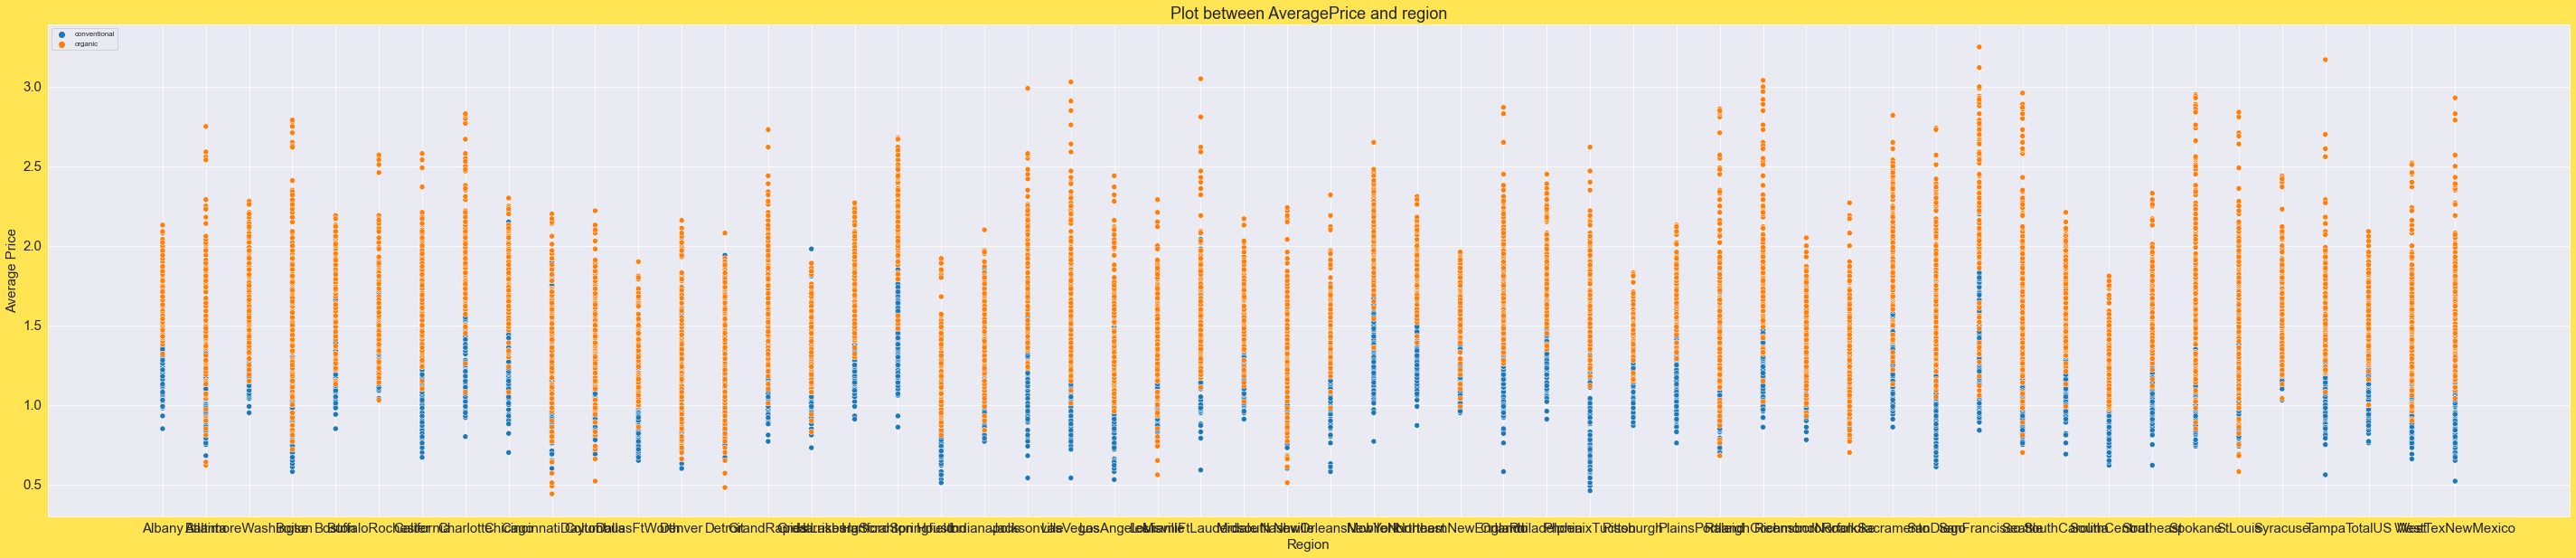

In [44]:
plt.rcParams['figure.figsize'] = (50,10)
plt.title('Plot between AveragePrice and region')
sns.scatterplot(x = avacado['region'],y = avacado['AveragePrice'],hue = avacado['type'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Region')
plt.ylabel('Average Price')

#plt.savefig()

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

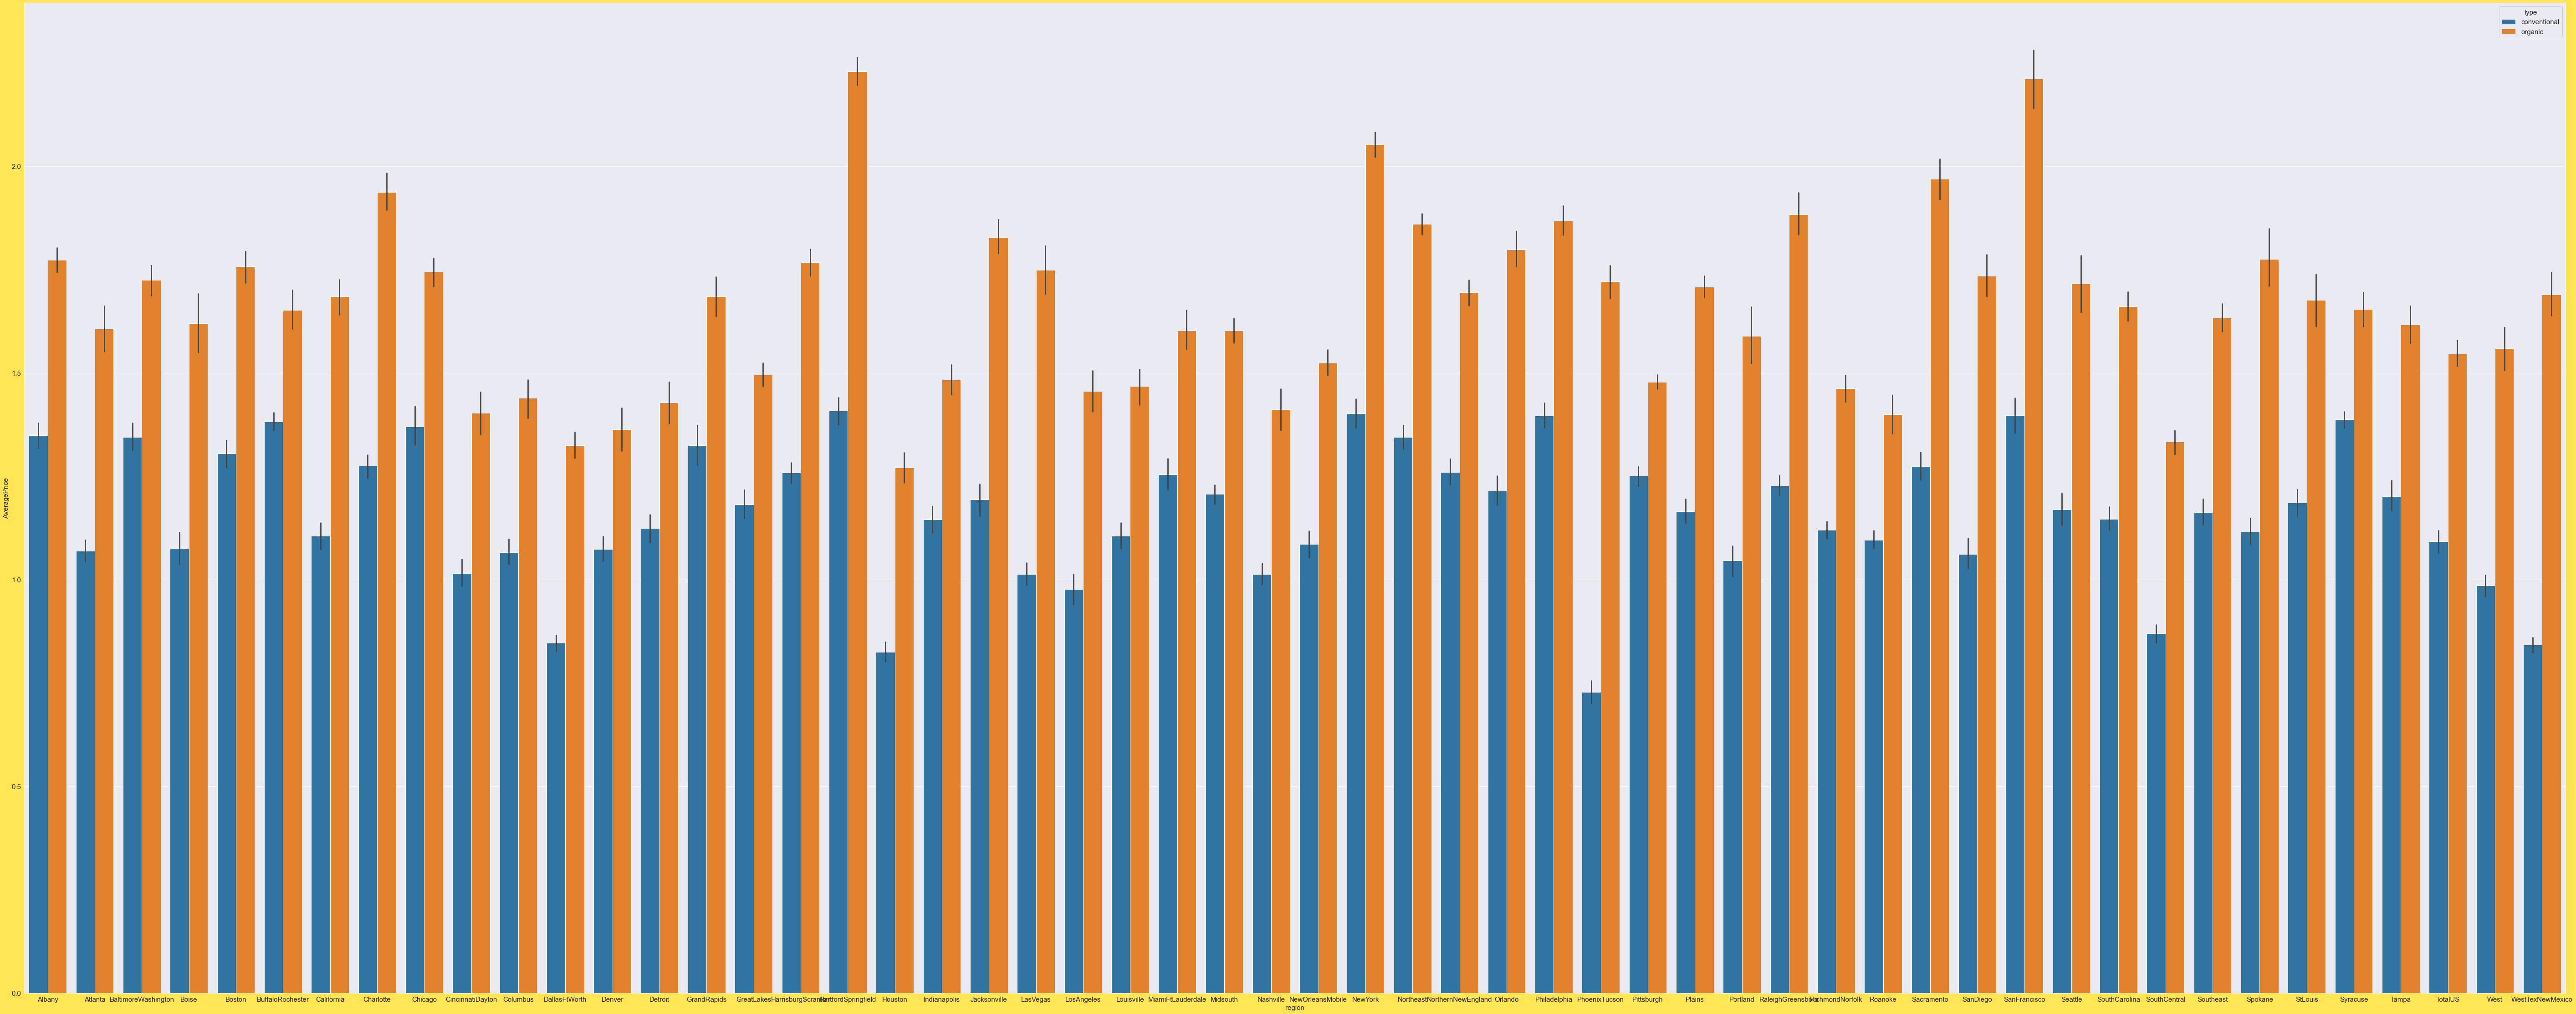

In [45]:
plt.figure(figsize=(100,40))
sns.barplot(x='region',y='AveragePrice',hue='type',data=avacado)

# plt.savefig('reg_price.png')

# I have saved the picture to view it properly

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

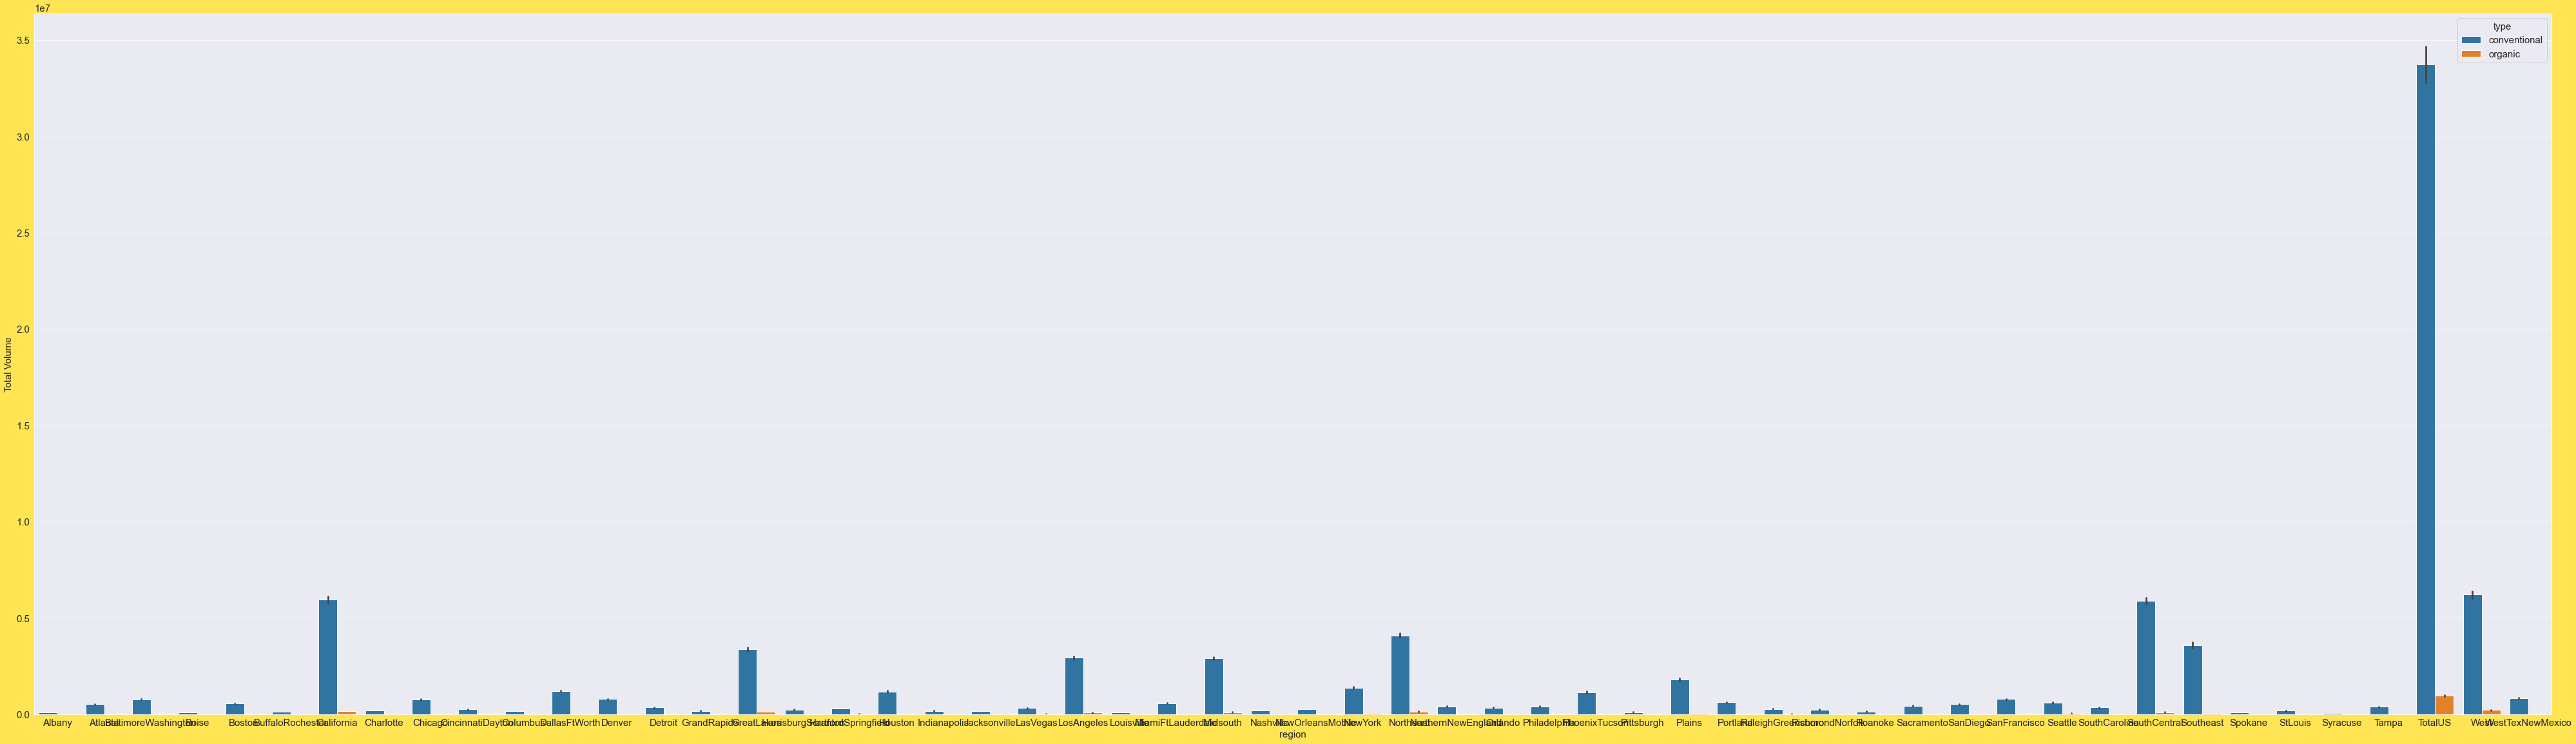

In [46]:
plt.figure(figsize=(70,20))
sns.barplot(x='region',y='Total Volume',hue='type',data=avacado)

# total us region had more high demand of conventional avacadoes

In [47]:
# We can observe that organic avacados has huge market and price compared to the conventional ones.

# The organic avacadoes are sold for highest price in HartfordSpringfield and SanFransico And they are sold for less price in Houston and SouthCentral regions.

# Coming to conventional avacadoes, their market is least in PhoenixTucson, Houston and WesttexNewMexico, so is there price.

# HartfordSpringfield, Newyork, Philadelphia , SanFrancisco and Syracuse regions have high prices for conventional avacadoes compared to the other states

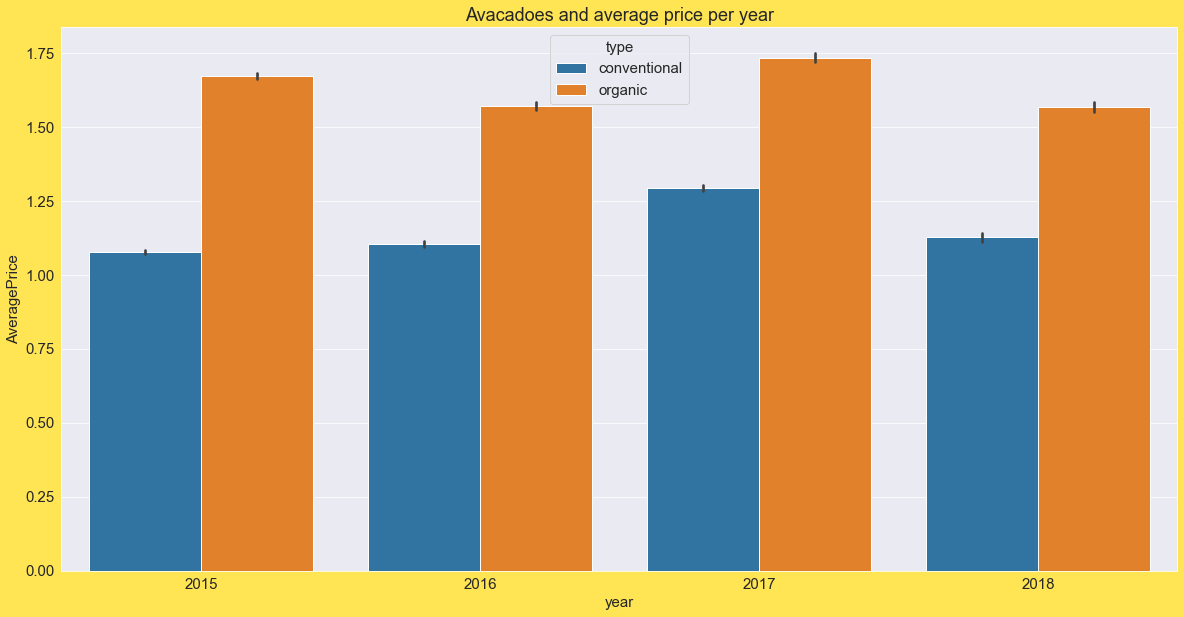

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='AveragePrice',hue='type',data=avacado)
plt.title('Avacadoes and average price per year')
plt.show()

# We can see that in 2017 organic and conventional avacadoes price has increased upto 1.75 dollars and over 1.25 dollars respectively

# However,In 2018,it reduced to the price which was occured in 2016

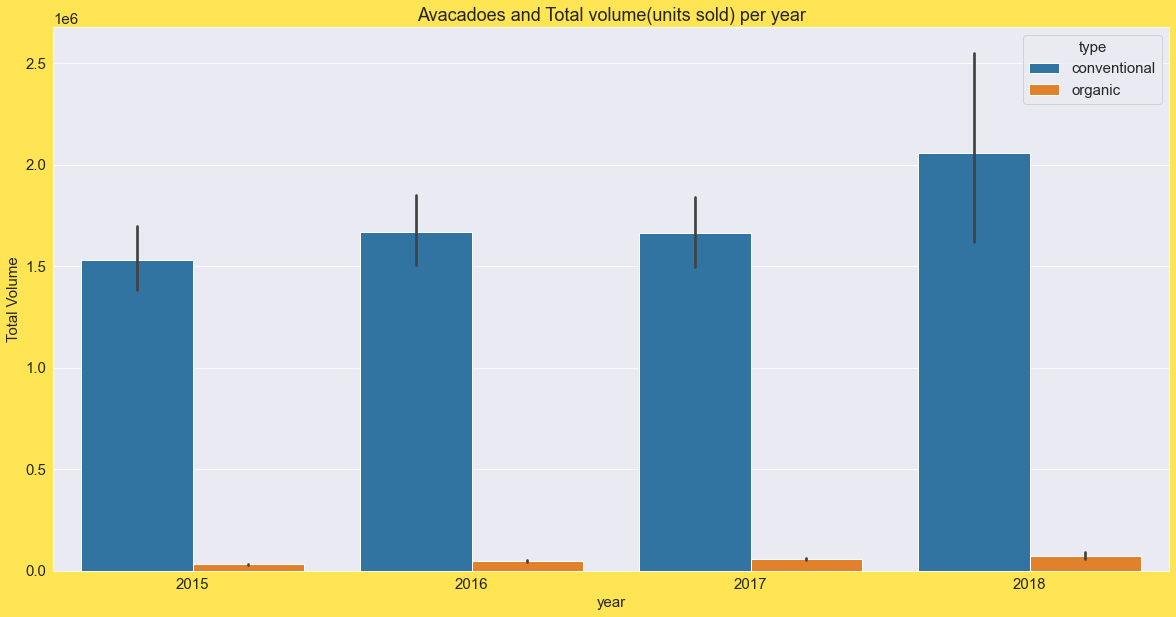

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='Total Volume',hue='type',data=avacado)
plt.title('Avacadoes and Total volume(units sold) per year')
plt.show()

# We can see that the  total volume has increased in 2018 to over 2 million when compared to the previous years.

# Interestingly the volume of conventional avacadoes are significantly higher than that of organic ones

# The volume has gradually increased for both the types of avacadoes.

# We can say that the demand for coventional avacadoes was very high

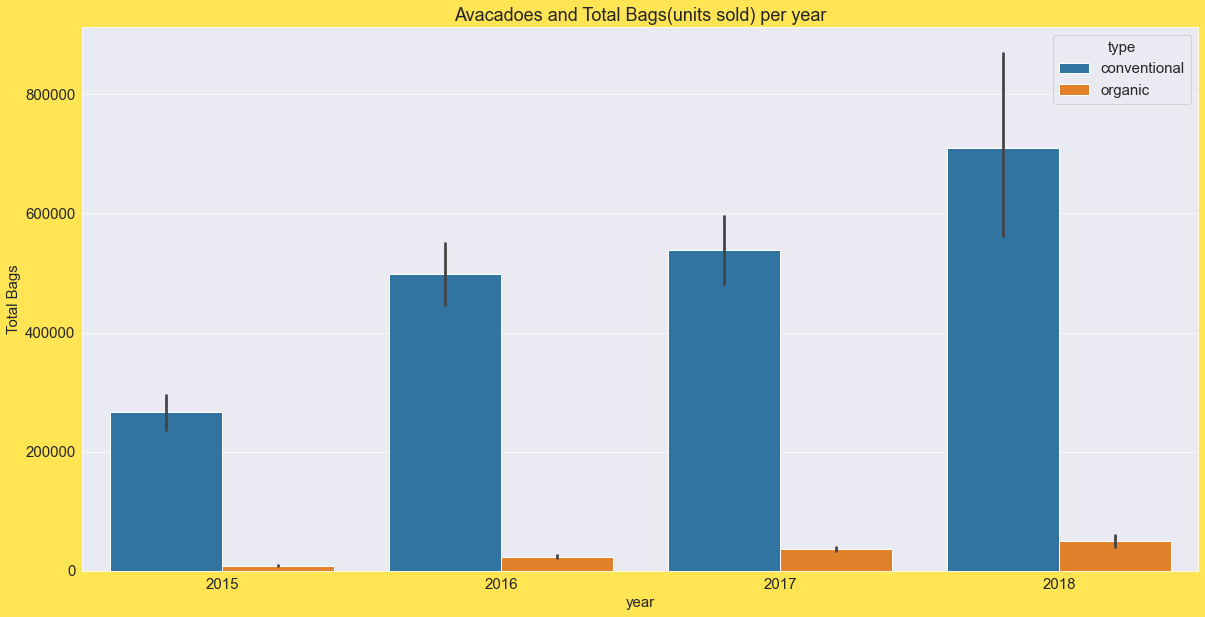

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='Total Bags',hue='type',data=avacado)
plt.title('Avacadoes and Total Bags(units sold) per year')
plt.show()

# Highest number of bags were sold in 2018 

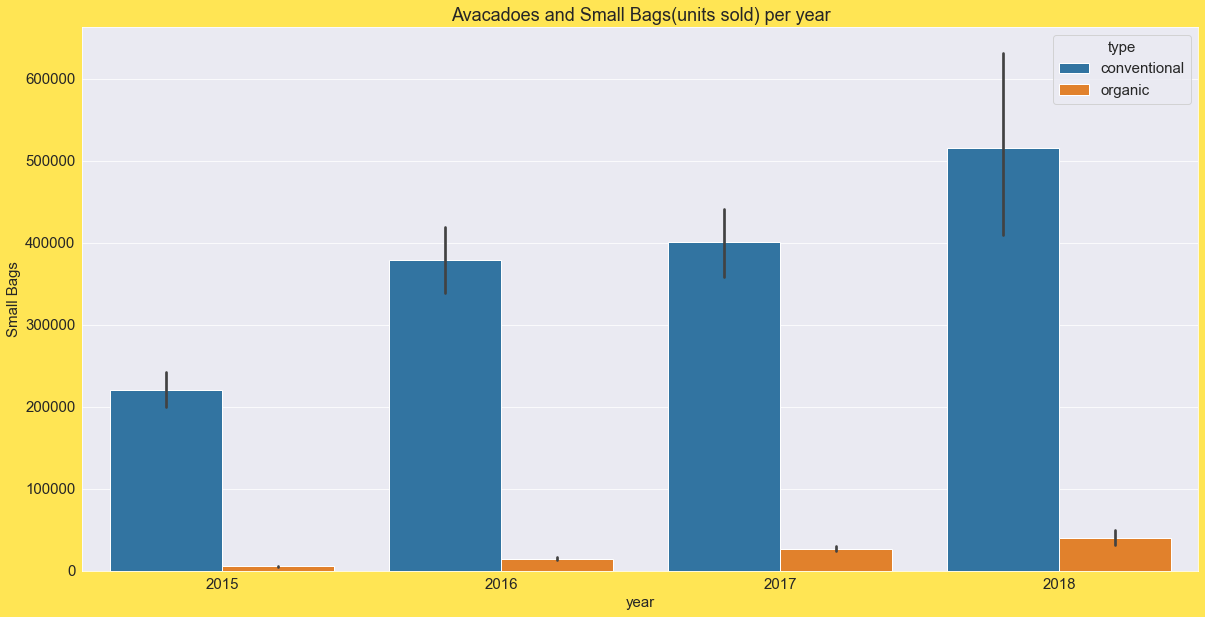

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='Small Bags',hue='type',data=avacado)
plt.title('Avacadoes and Small Bags(units sold) per year')
plt.show()

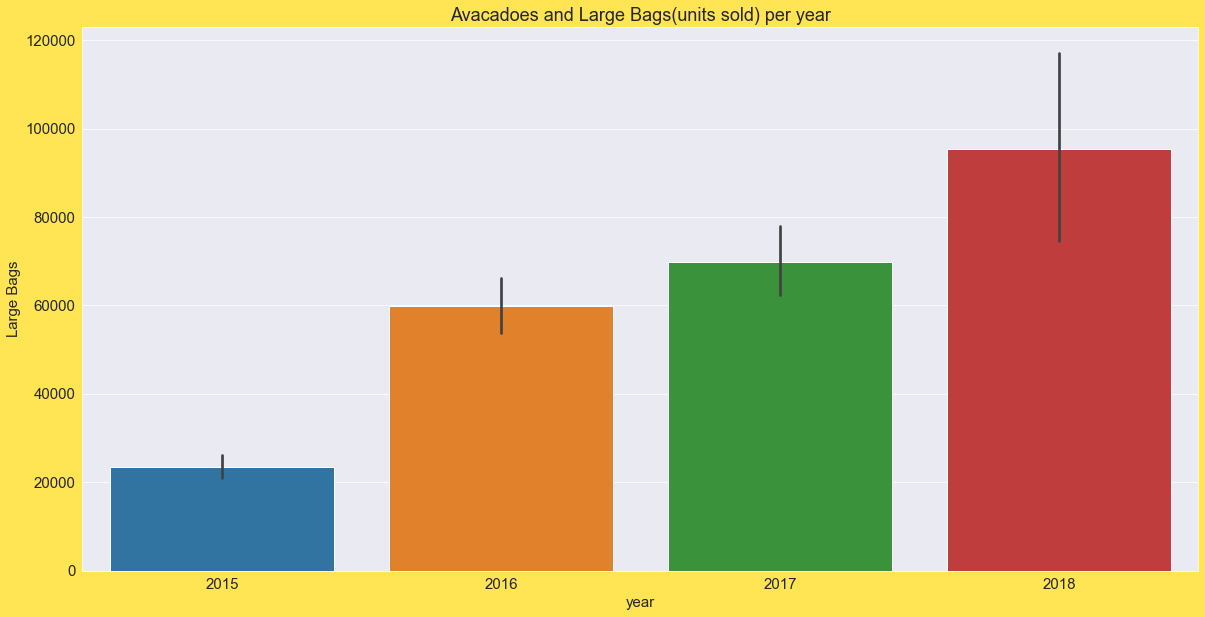

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='Large Bags',data=avacado)
plt.title('Avacadoes and Large Bags(units sold) per year')
plt.show()
# Large bags were sold in highest number in 2018

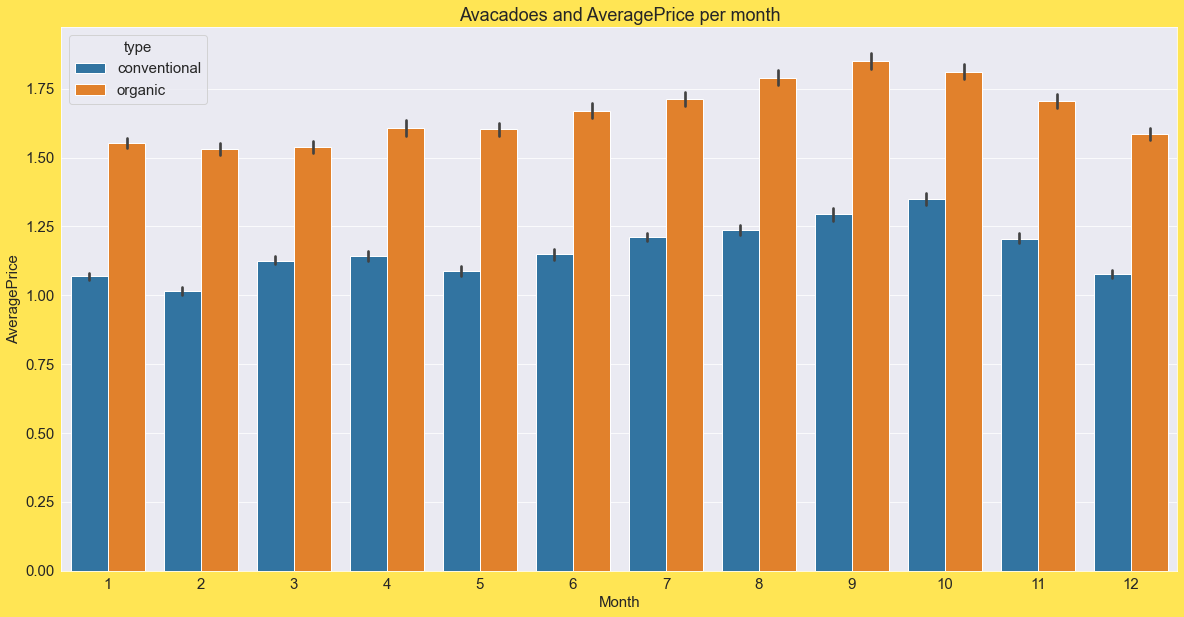

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x='Month',y='AveragePrice',hue='type',data=avacado)
plt.title('Avacadoes and AveragePrice per month')
plt.show()

# Average Price remained high(from 1.80 dollars to 1.90) from August,sept and oct and strated dropping from november

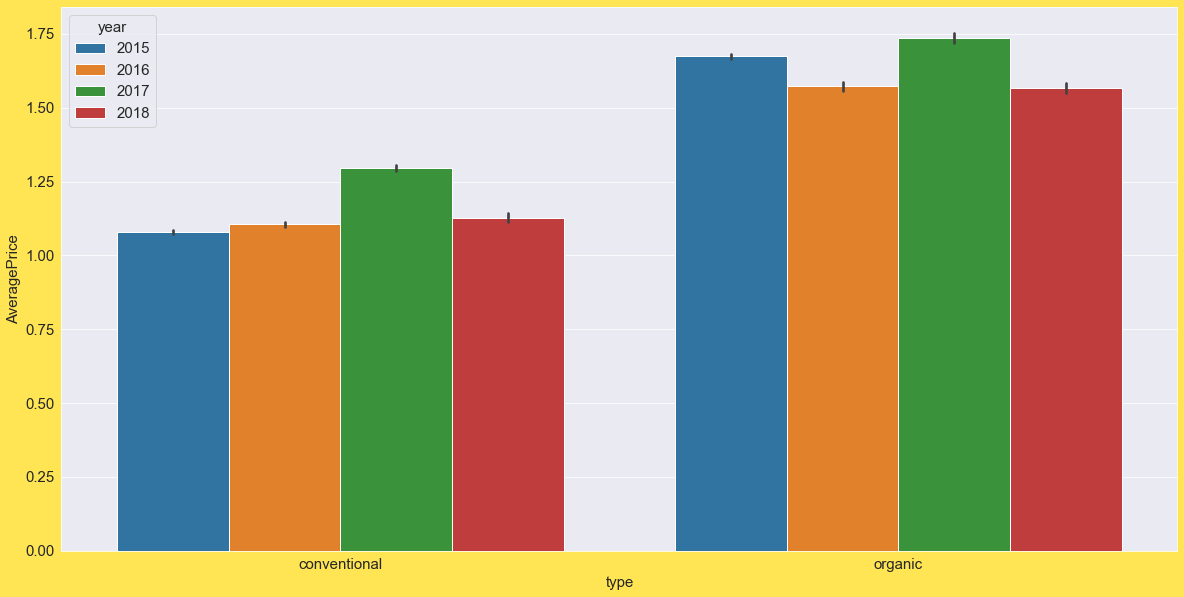

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='type',y='AveragePrice',hue='year',data=avacado)
plt.show()

# Organic Avadoes were having high prices during 2017 

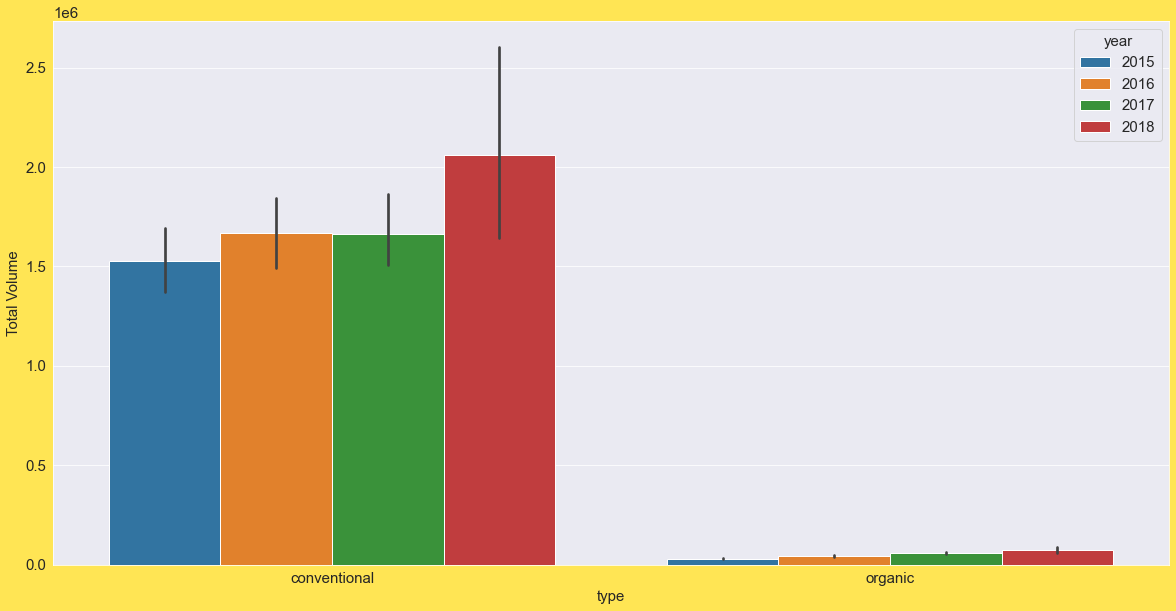

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x='type',y='Total Volume',hue='year',data=avacado)
plt.show()

# We can obsereve that the conventional avacadoes has a very huge demand 

In [56]:
avacado.groupby('region')['AveragePrice'].mean()*100

# philadelphia had highest averaged price for these Hass Avacadoes

region
Albany                 156.103550
Atlanta                133.795858
BaltimoreWashington    153.423077
Boise                  134.813609
Boston                 153.088757
BuffaloRochester       151.683432
California             139.532544
Charlotte              160.603550
Chicago                155.677515
CincinnatiDayton       120.920118
Columbus               125.278107
DallasFtWorth          108.559172
Denver                 121.857988
Detroit                127.609467
GrandRapids            150.500000
GreatLakes             133.855030
HarrisburgScranton     151.328402
HartfordSpringfield    181.863905
Houston                104.792899
Indianapolis           131.399408
Jacksonville           151.094675
LasVegas               138.091716
LosAngeles             121.600592
Louisville             128.668639
MiamiFtLauderdale      142.849112
Midsouth               140.476331
Nashville              121.210059
NewOrleansMobile       130.479290
NewYork                172.757396
Northea

In [57]:
avacado.groupby('type')['AveragePrice'].mean()*100
# organic avacadoes had highest average price compared to conventional


type
conventional    115.803967
organic         165.399868
Name: AveragePrice, dtype: float64

In [58]:
#plotting the above
avacado.pivot_table('AveragePrice',index='type',columns='region')

# We can see organic avacadoes has more average price than conventional ones in some regions

region          Albany   Atlanta  BaltimoreWashington     Boise    Boston  \
type                                                                        
conventional  1.348757  1.068817             1.344201  1.076036  1.304379   
organic       1.773314  1.607101             1.724260  1.620237  1.757396   

region        BuffaloRochester  California  Charlotte   Chicago  \
type                                                              
conventional          1.382308    1.105444   1.275089  1.369349   
organic               1.651361    1.685207   1.936982  1.744201   

region        CincinnatiDayton  ...  SouthCarolina  SouthCentral  Southeast  \
type                            ...                                           
conventional          1.015503  ...       1.146213      0.869408   1.163018   
organic               1.402899  ...       1.660355      1.333077   1.633018   

region         Spokane   StLouis  Syracuse     Tampa   TotalUS      West  \
type                                                                       
conventional  1.115976  1.185740  1.386923  1.201598  1.092012  0.985089   
organic       1.775207  1.675503  1.653728  1.616095  1.546036  1.559349   

region        WestTexNewMexico  
type                            
conventional          0.842130  
organic               1.688855  

[2 rows x 54 columns]

<Figure size 720x1440 with 0 Axes>

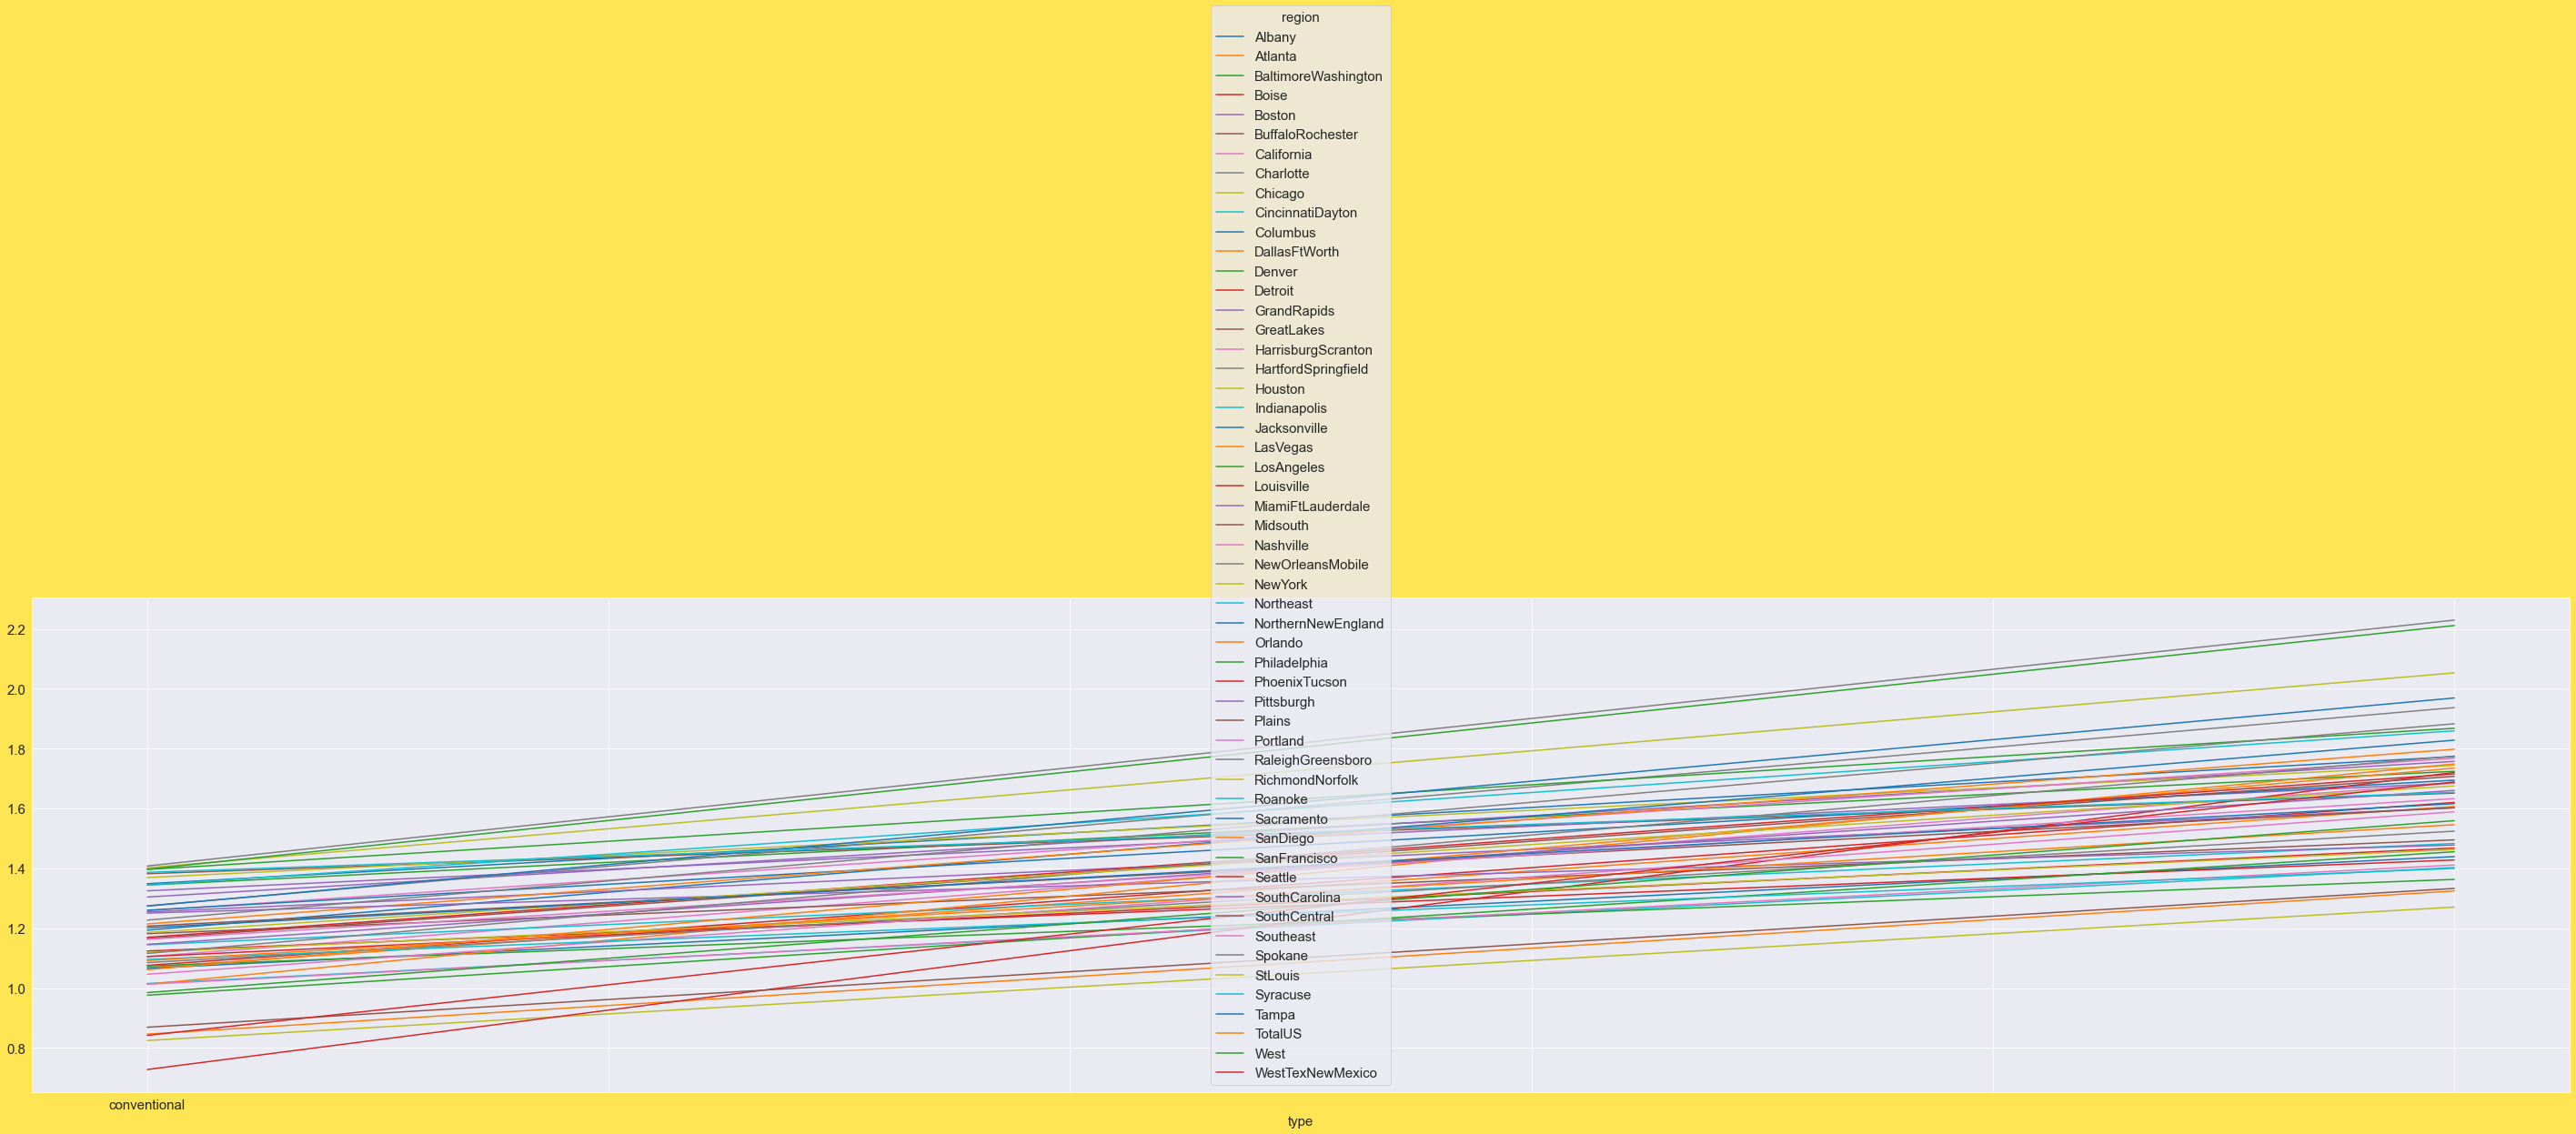

<Figure size 720x1440 with 0 Axes>

In [59]:
# plotting the pivot table 
avacado.pivot_table('AveragePrice',index='type',columns='region').plot()
plt.figure(figsize=(10,20))

### Multivariate Analysis

In [60]:
#sns.pairplot(avacado)
#plt.show()

Now We have to encode the data to move further

In [61]:
avacado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [62]:
# we have to use one hot encoding on type because it is a feature not a target or a label
# however we can use Label Encoding for region because it is one of the target

FROM NOW WE ARE CONSIDERING REGION AS OUR TARGET VARIBALE FOR BUILDING A CLASSIFICATION MODEL

 we will do the same thing for AveragePrice after completing the classification model

In [63]:
reg_df = avacado.copy()

# dupicating the df

In [64]:
reg_df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [65]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
reg_df['region']= LE.fit_transform(reg_df['region'])

In [66]:
reg_df.sample(2)
# we can see that region has been encoded

AveragePrice  Total Volume     4046      4225    4770  Total Bags  \
17944          1.83      93204.08  9300.64  21428.22  814.47    61660.75   
10992          1.54      46329.16  3906.27  26987.91   32.13    15402.85   

       Small Bags  Large Bags  XLarge Bags     type  year  region  Month  Day  
17944    61516.19      144.56          0.0  organic  2018      28      2    4  
10992    14104.27     1298.58          0.0  organic  2015      35      2    8

In [67]:
# USING ONEHOT ENCODING BEACAUSE THE CATEGORICAL FEATURE TYPE CONTAIN NOMINAL DATA WHICH DOESN'T FOLLOW ANY ORDER
# DROPPED THE FIRST DUMMY COLUMN AFTER ENCODING TO AVOID MULTICOLLINEARITY
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

df_object = reg_df.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(['type'])

reg_df = pd.concat([reg_df.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [68]:
reg_df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  region  Month  Day  type_organic  
0     8603.62       93.25          0.0  2015       0     12   27             0  
1     9408.07       97.49          0.0  2015       0     12   20             0  
2     8042.21      103.14          0.0  2015       0     12   13             0  
3     5677.40      133.76          0.0  2015       0     12    6             0  
4     5986.26      197.69          0.0  2015       0     11   29             0

In [69]:
reg_df['type_organic'].unique()
# We can see the type column is encoded and we have dropped a dummy column to avoid the multicollinearity

array([0, 1])

In [70]:
# Now our dataset is ready

### CHECKING THE OUTLIERS AND REMOVING THEM

In [71]:
reg_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month',
       'Day', 'type_organic'],
      dtype='object')

In [72]:
# seperating the continuous variables to check the outliers
cont_cols = reg_df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags']]

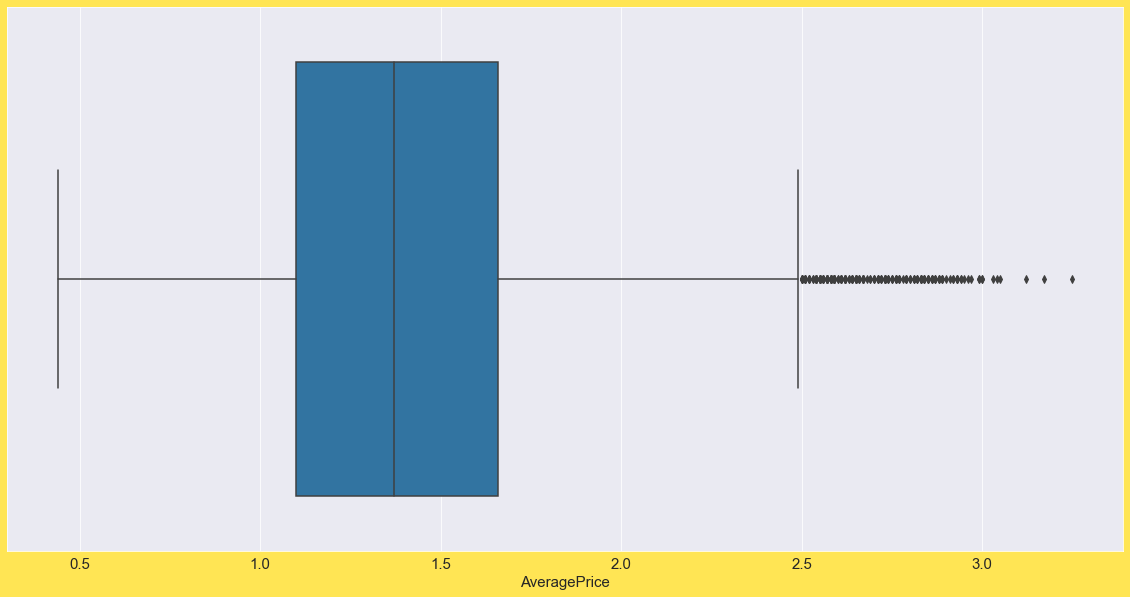

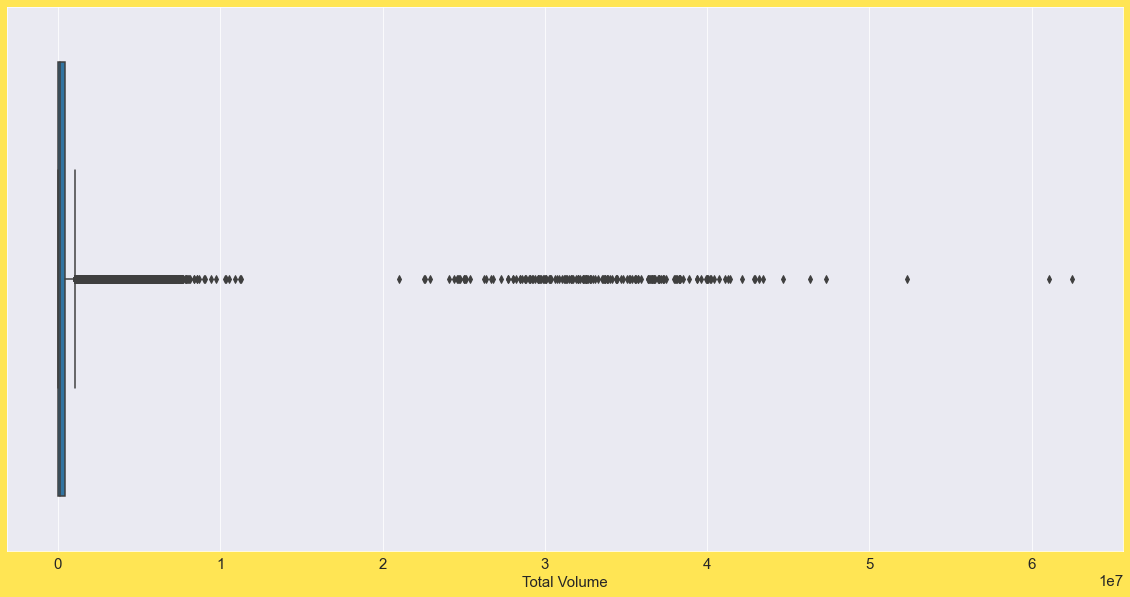

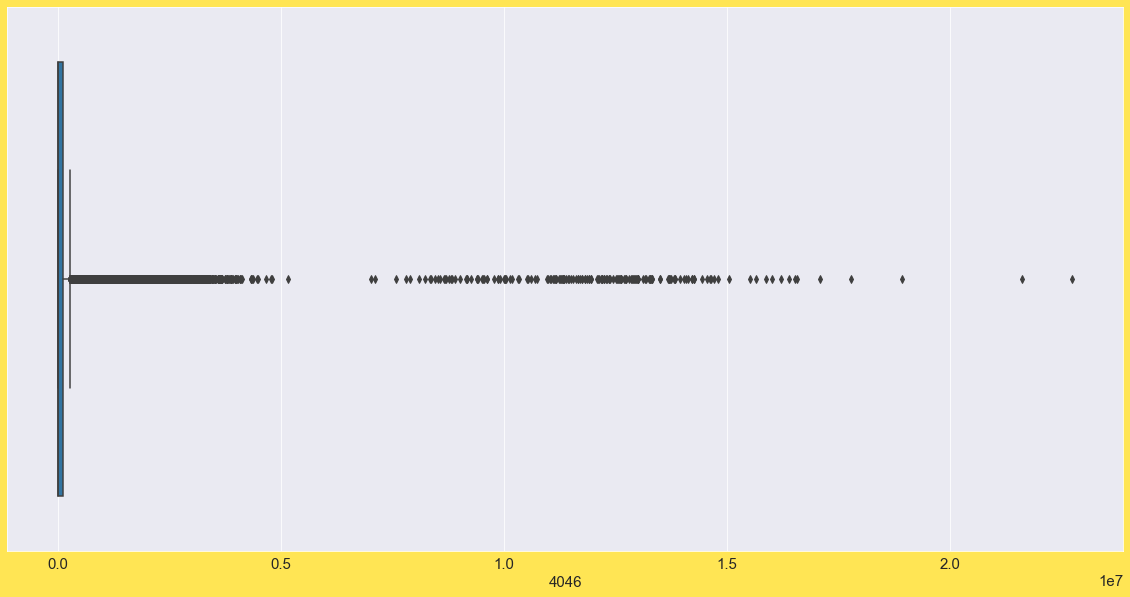

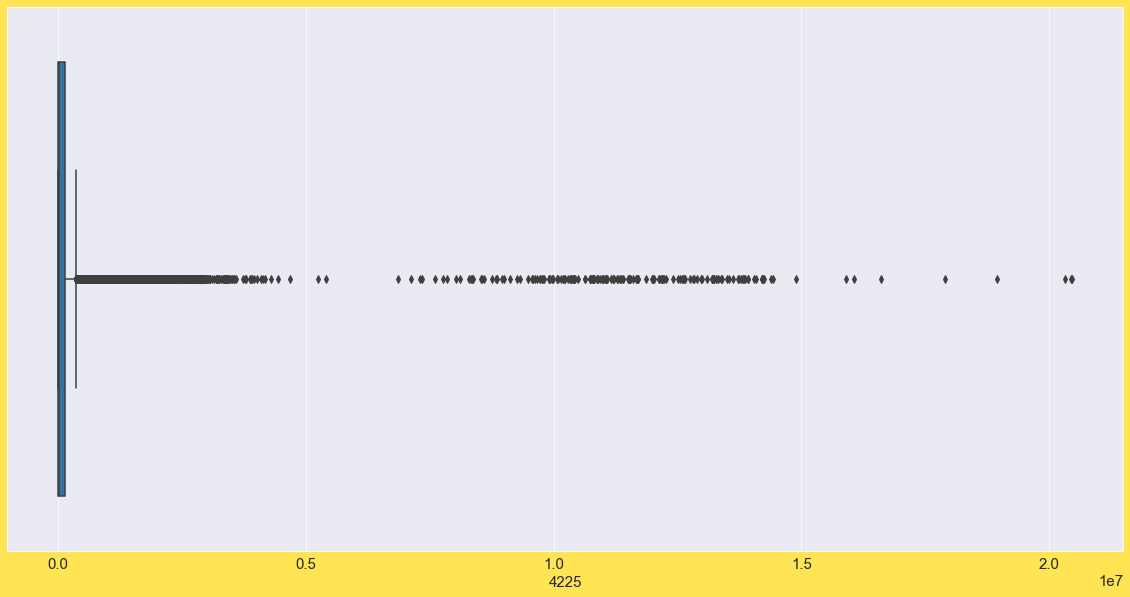

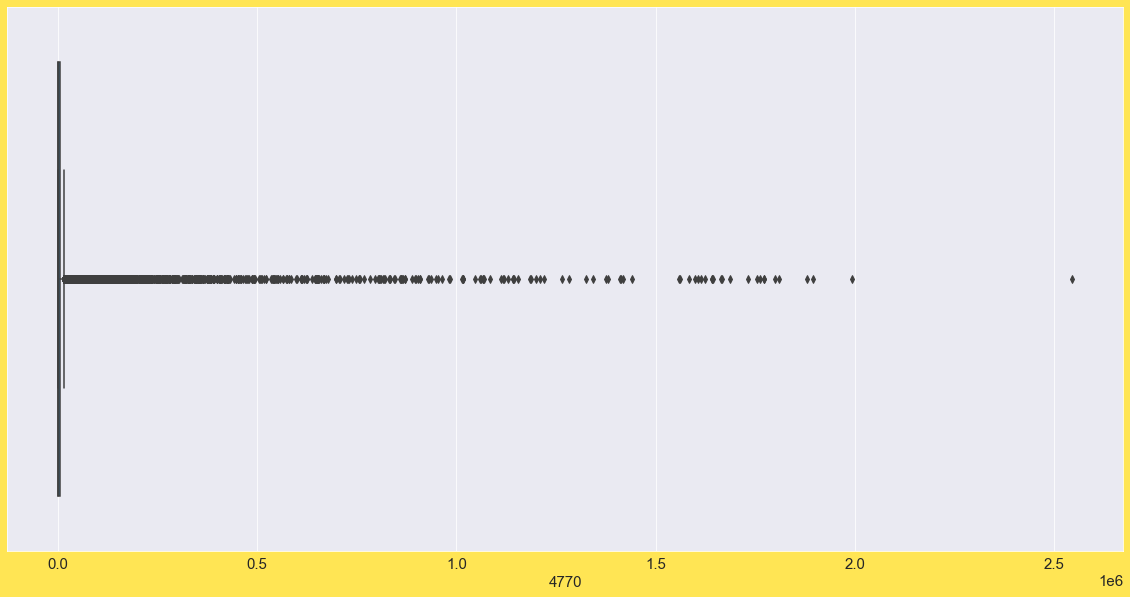

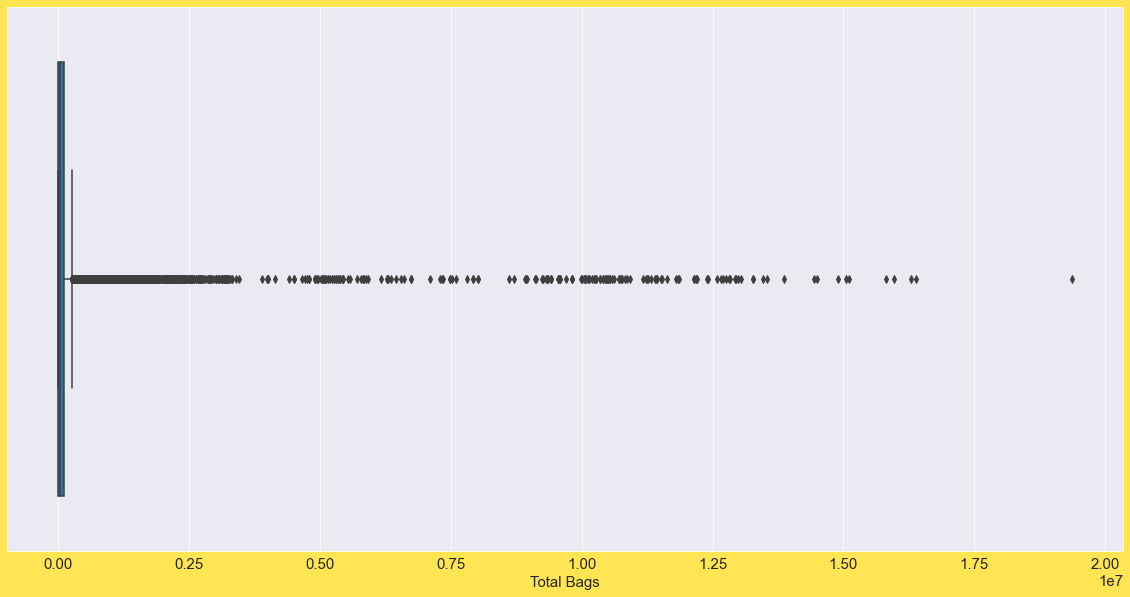

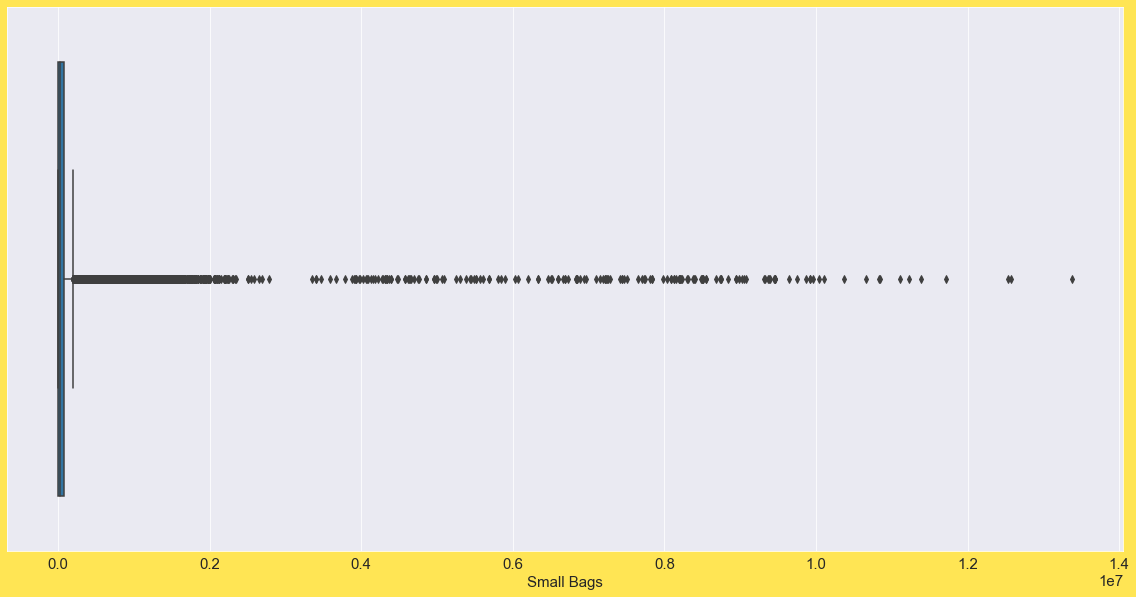

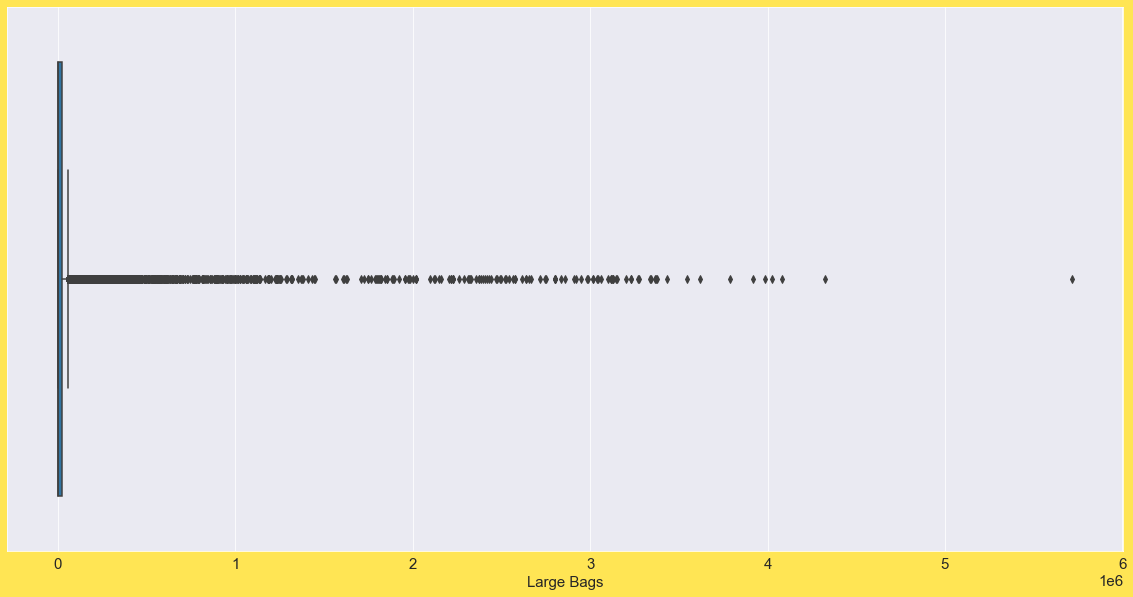

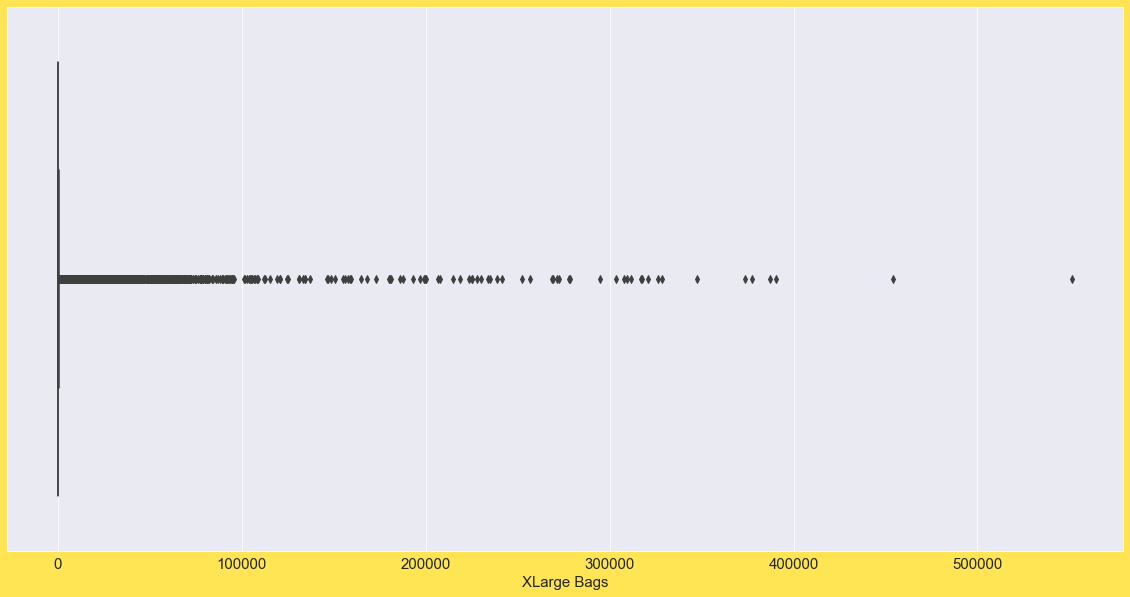

In [73]:
# visually checking the outliers
for i in cont_cols:
    plt.figure(figsize=(20,10))
    sns.boxplot(reg_df[i])
    plt.show()
    
# We can see there are alot of outliers

In [74]:
# using zscore method to remove outliers

from scipy.stats import zscore

z = np.abs(zscore(reg_df[cont_cols.columns]))

print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [75]:
reg_new = reg_df[(z<3).all(axis=1)]

In [76]:
print("shape before and after")
print("shape before: ",reg_df.shape)
print("shape after: ",reg_new.shape)
print("Percentage Loss: ", (reg_df.shape[0]-reg_new.shape[0])/reg_df.shape[0]*100)

# Only 3% data is missing , so we will continue after removing outliers

shape before and after
shape before:  (18249, 14)
shape after:  (17651, 14)
Percentage Loss:  3.276891884486821


In [77]:
# On a safer note let's check the dataloss when IQR method is used for outlier removal
# finding out the quantile of data with continuous columns
Q1 = cont_cols.quantile(0.25)
Q3 = cont_cols.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD (be carefull with the variables used here)
reg_new_quant = reg_df[~((cont_cols < (Q1 - 1.5 * IQR)) |(cont_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
print("shape before and after")
print("shape before: ",reg_df.shape)
print("shape after: ",reg_new_quant.shape)
print("Percentage Loss: ",(reg_df.shape[0]-reg_new_quant.shape[0])/reg_df.shape[0]*100)

# We can see that there is a 36% data loss if we use quantile IQR method


shape before and after
shape before:  (18249, 14)
shape after:  (11538, 14)
Percentage Loss:  36.774617787276014


In [79]:
# So we will choose the zscore method
reg_new.head()

# Outliers has been removed from the data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  region  Month  Day  type_organic  
0     8603.62       93.25          0.0  2015       0     12   27             0  
1     9408.07       97.49          0.0  2015       0     12   20             0  
2     8042.21      103.14          0.0  2015       0     12   13             0  
3     5677.40      133.76          0.0  2015       0     12    6             0  
4     5986.26      197.69          0.0  2015       0     11   29             0

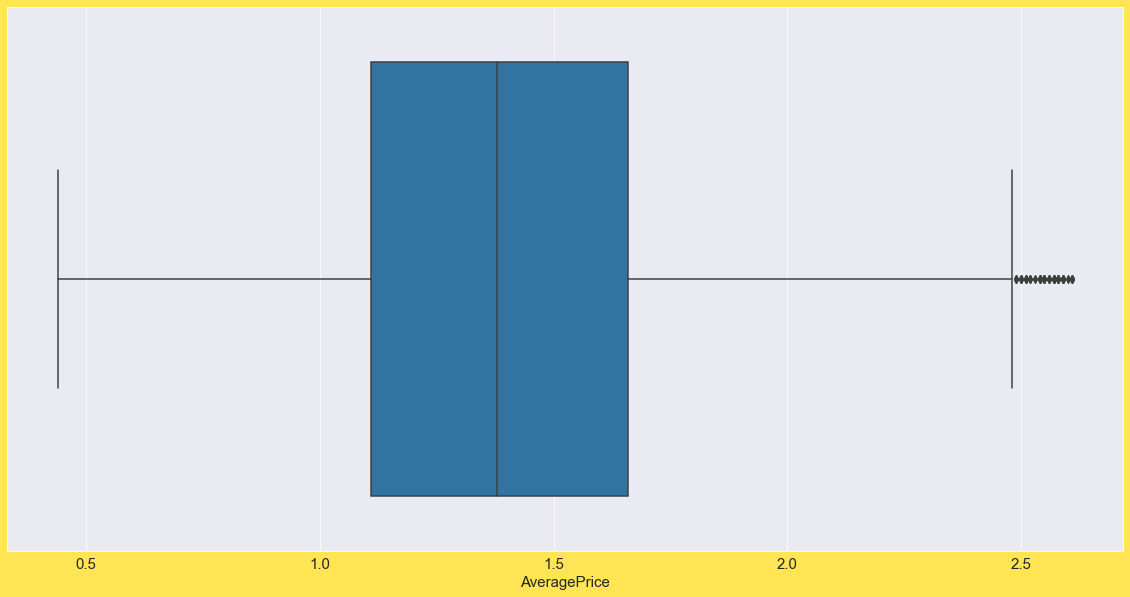

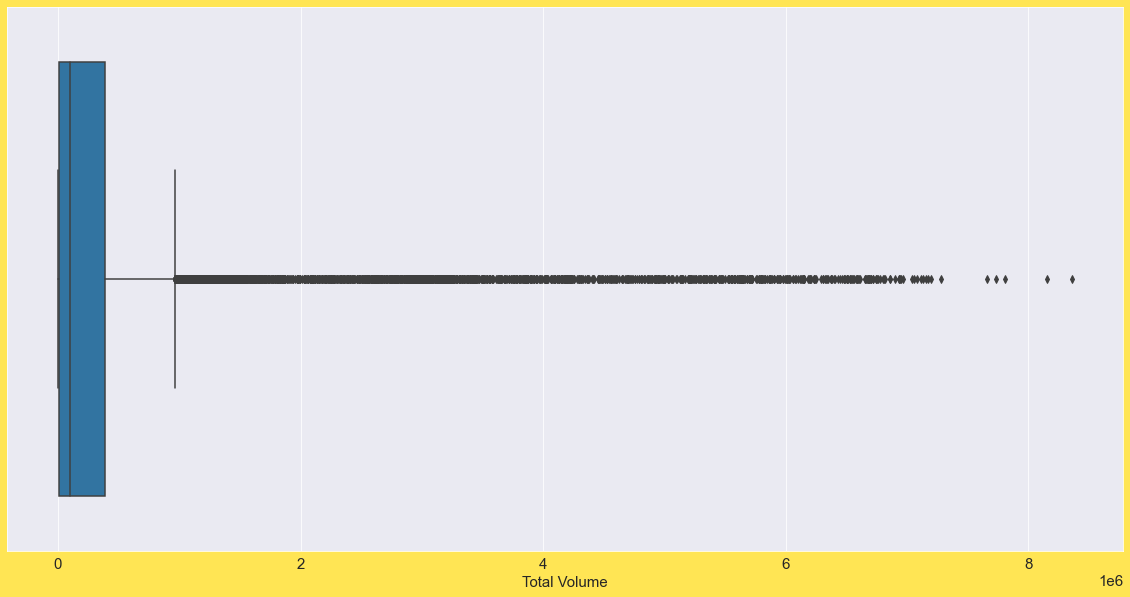

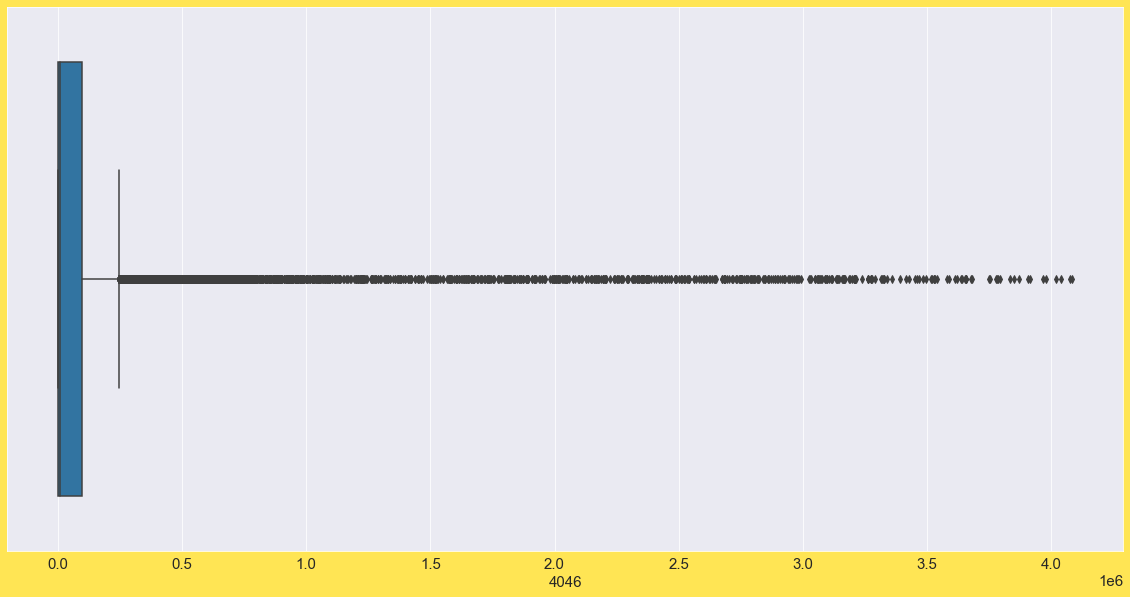

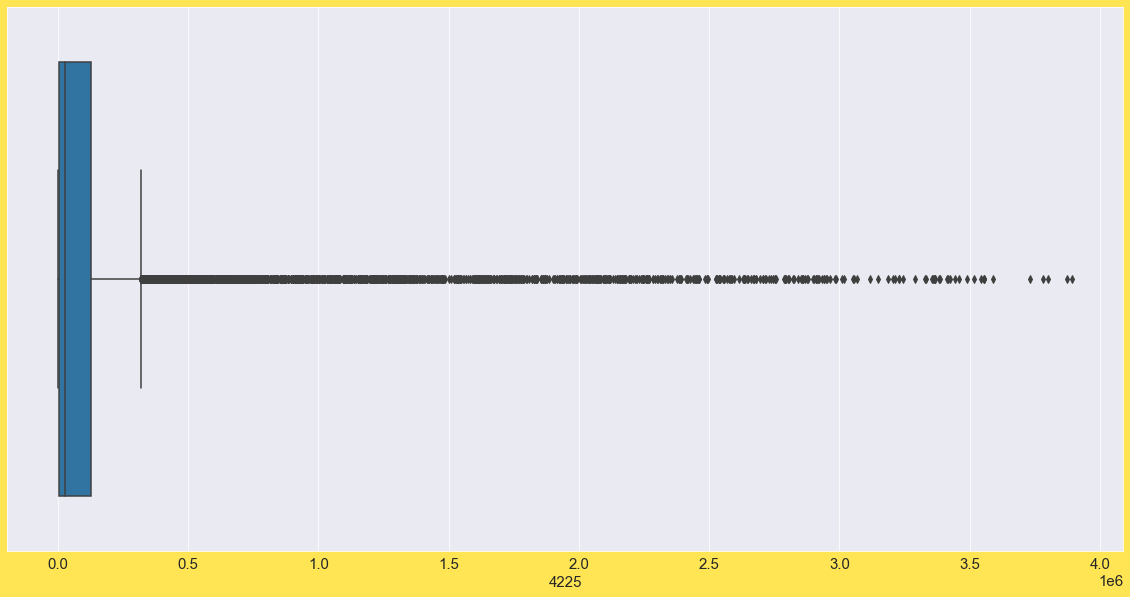

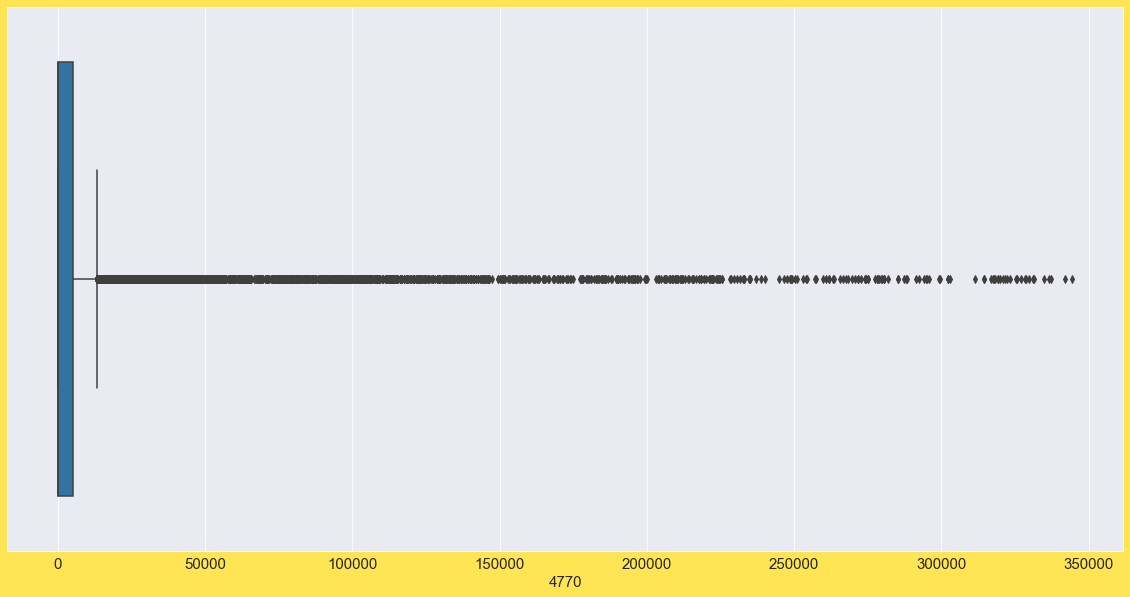

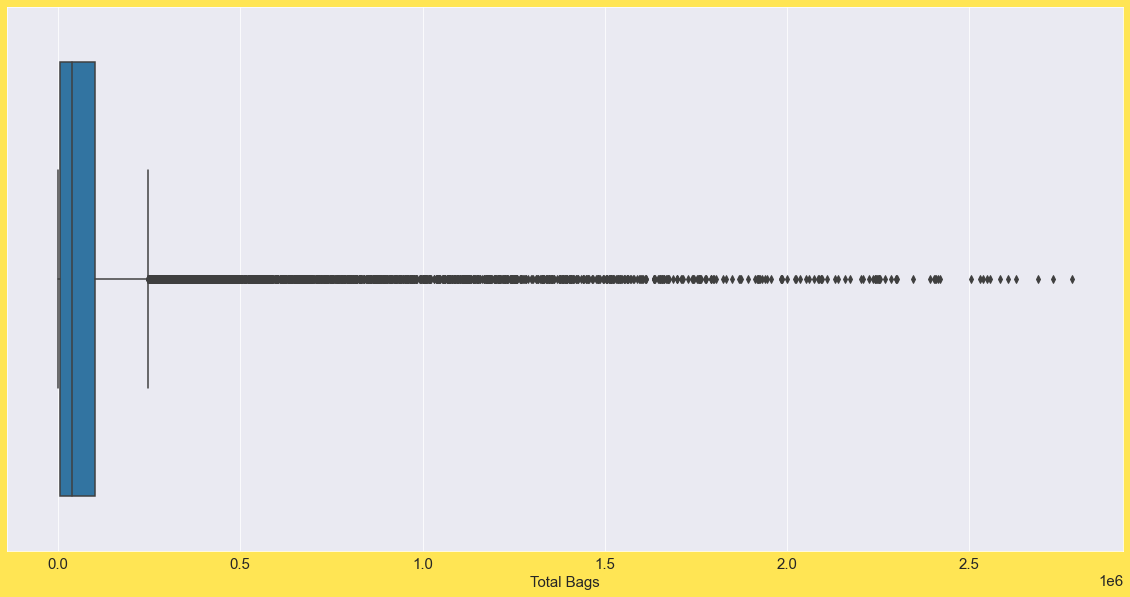

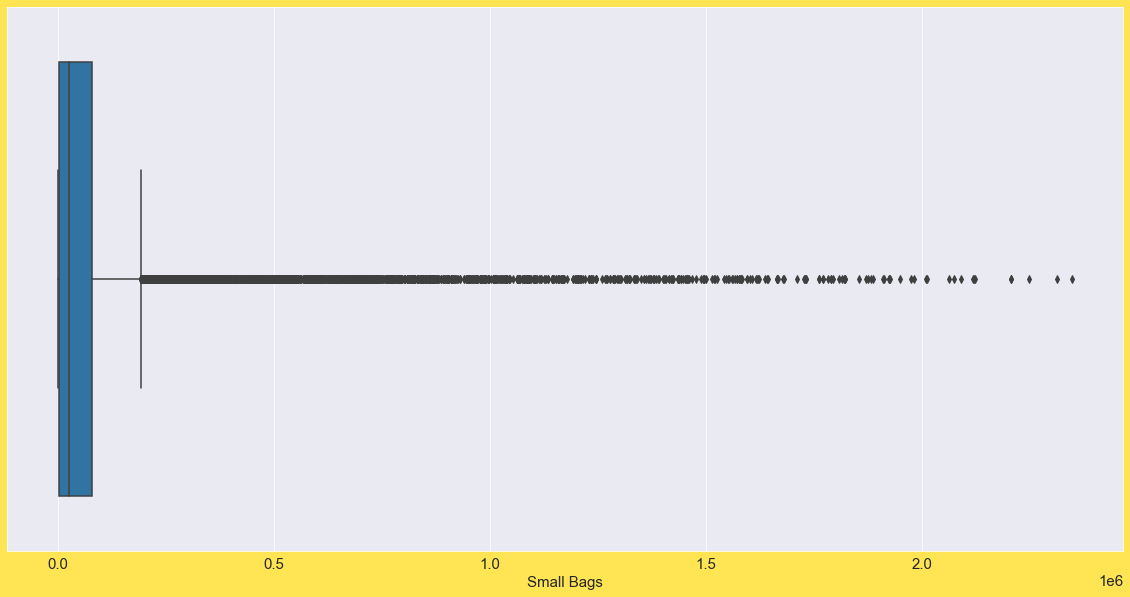

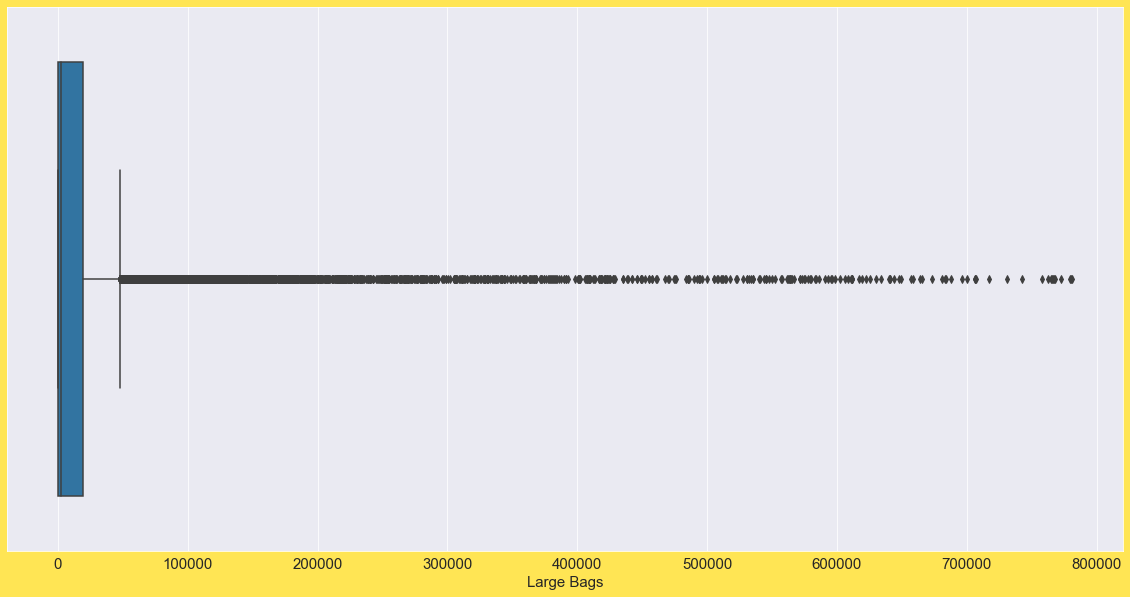

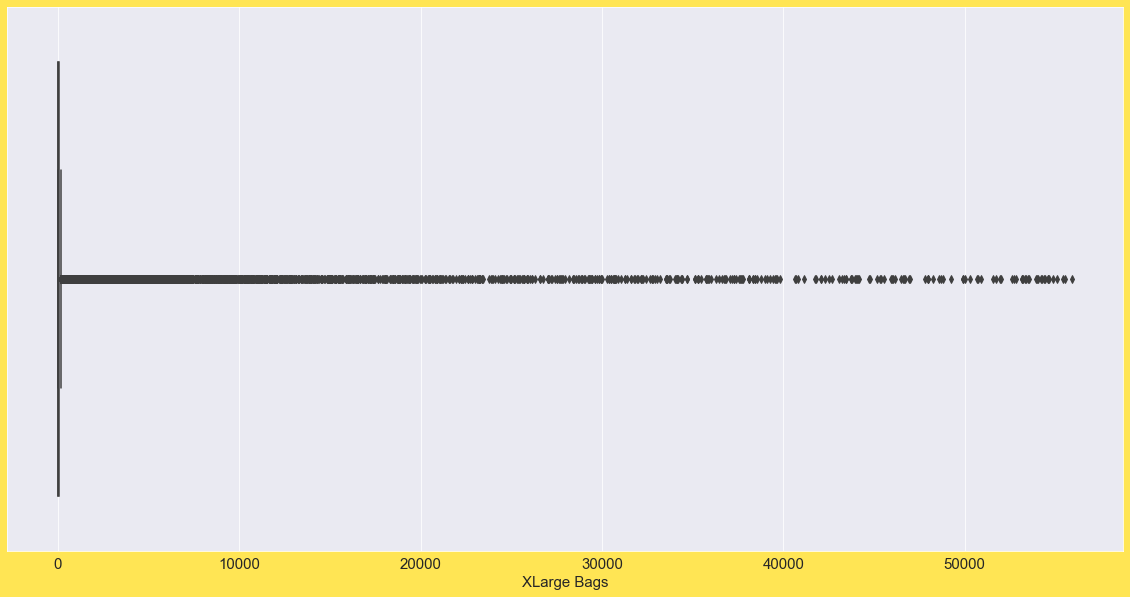

In [80]:
# checking the outliers again
for i in cont_cols:
    plt.figure(figsize=(20,10))
    sns.boxplot(reg_new[i])
    plt.show()
    
# We can see the outliers are removed, only the continuous ones are present


### Checking and removing skewness

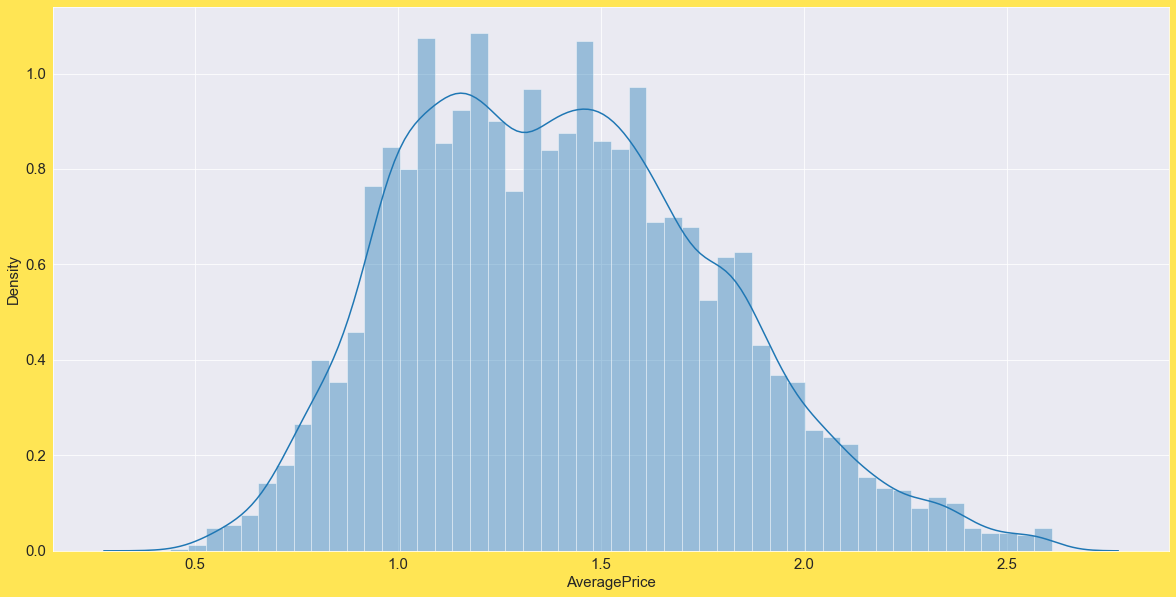

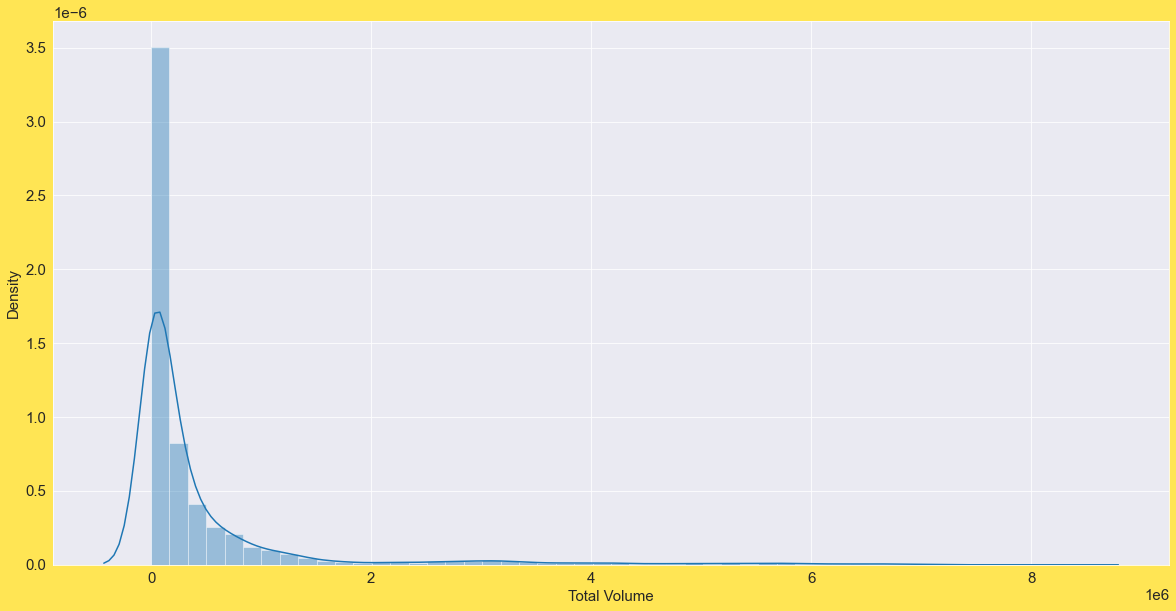

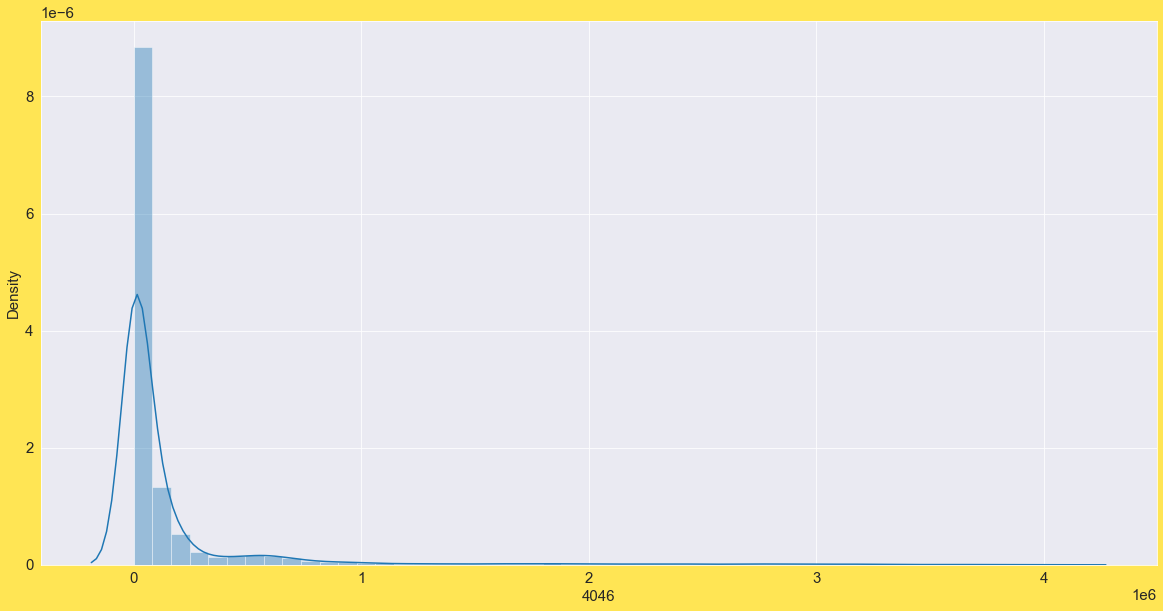

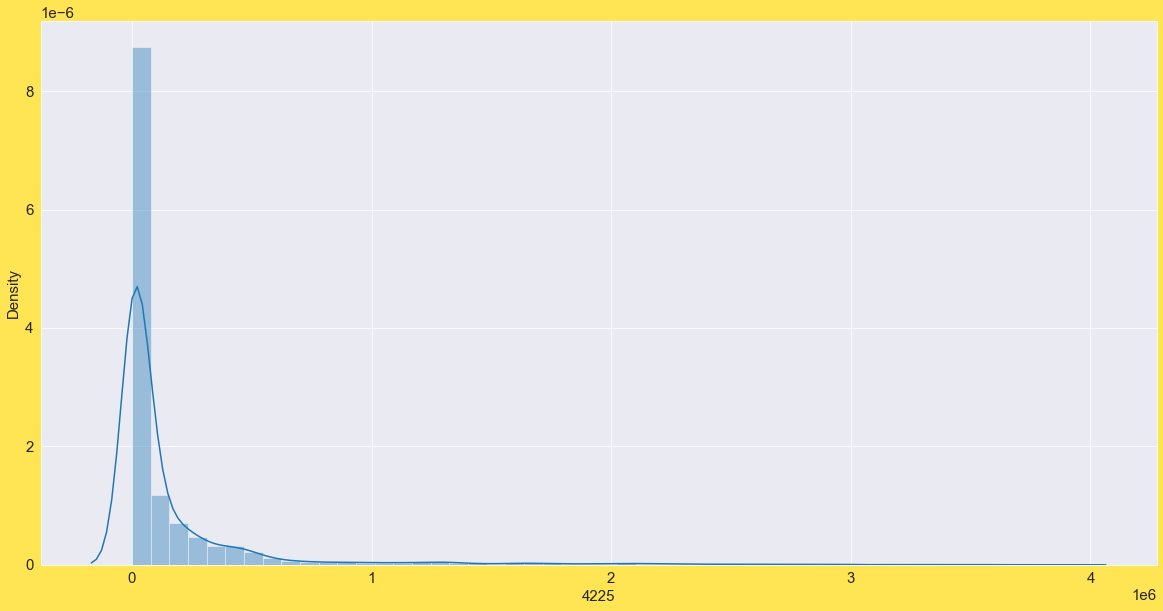

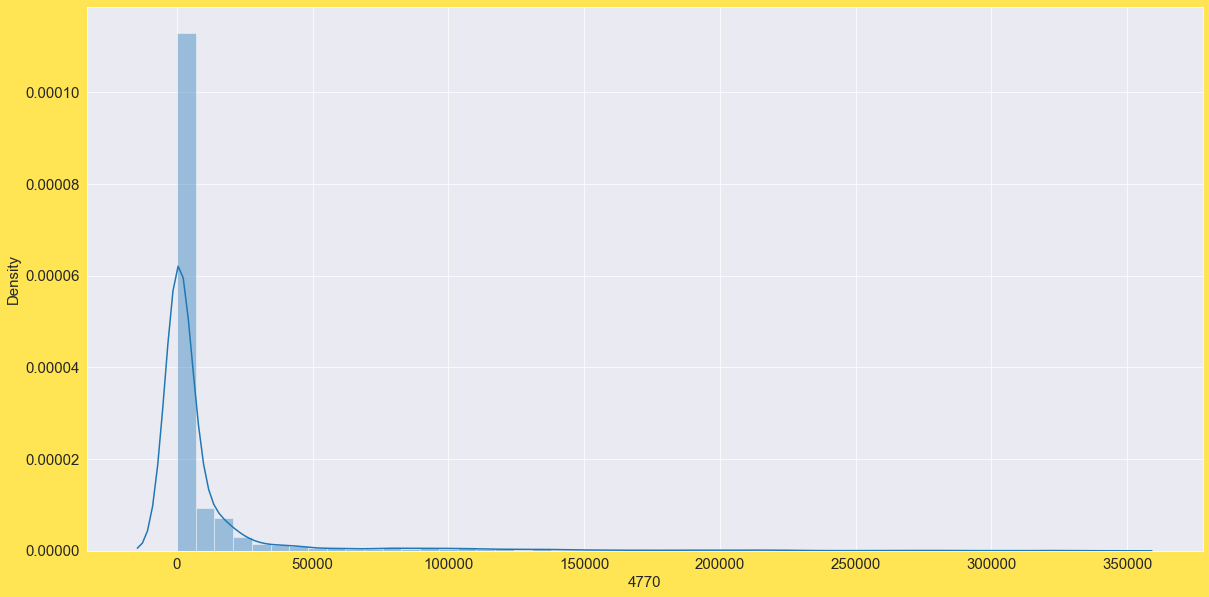

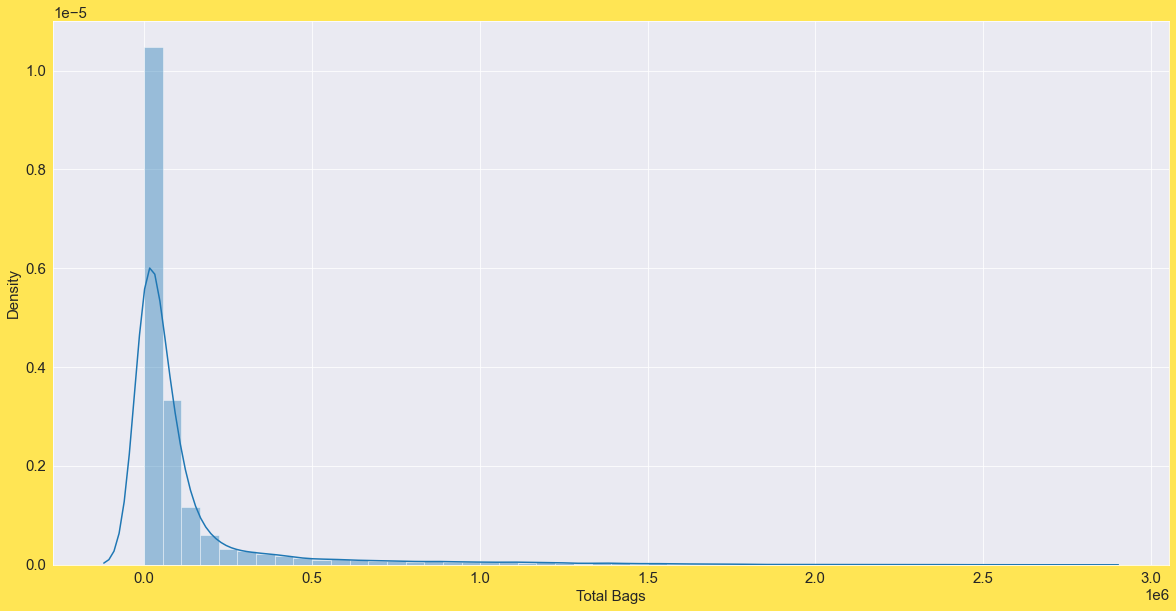

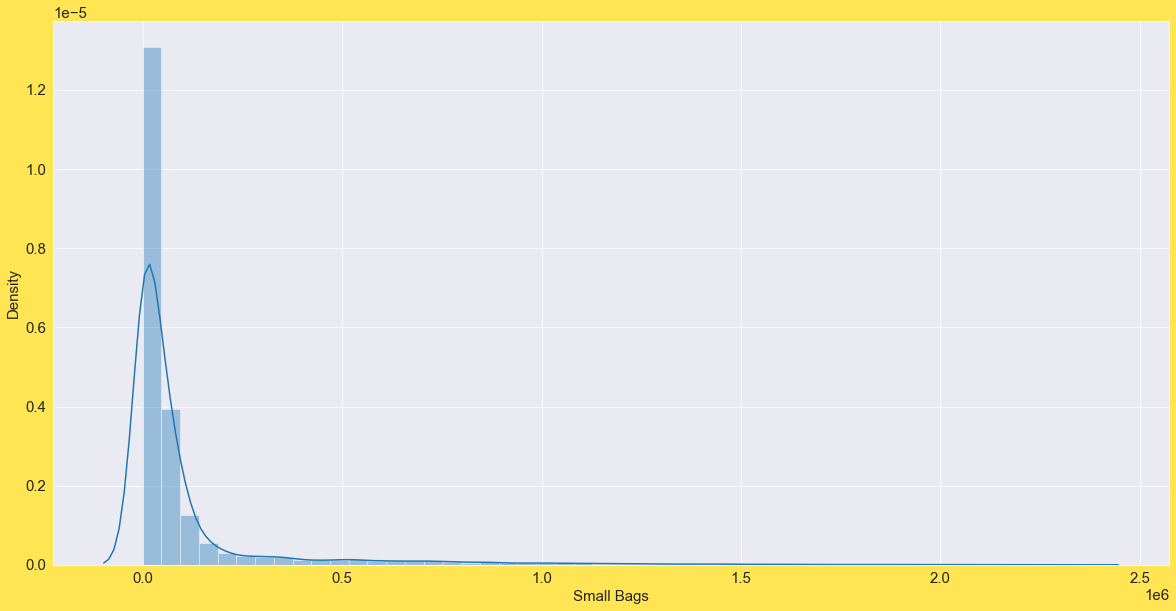

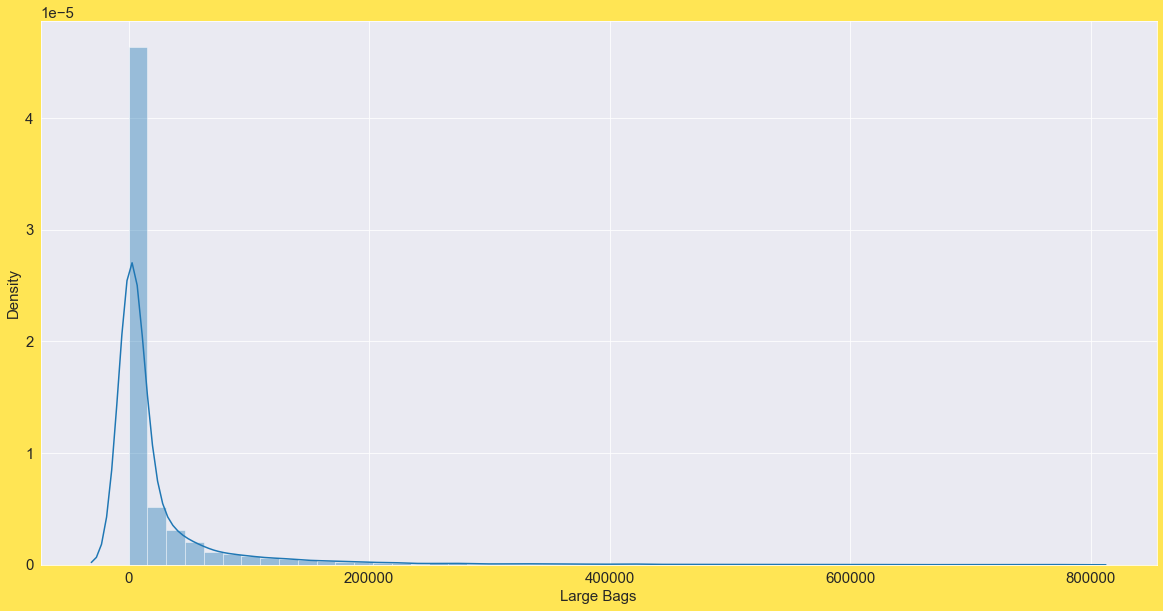

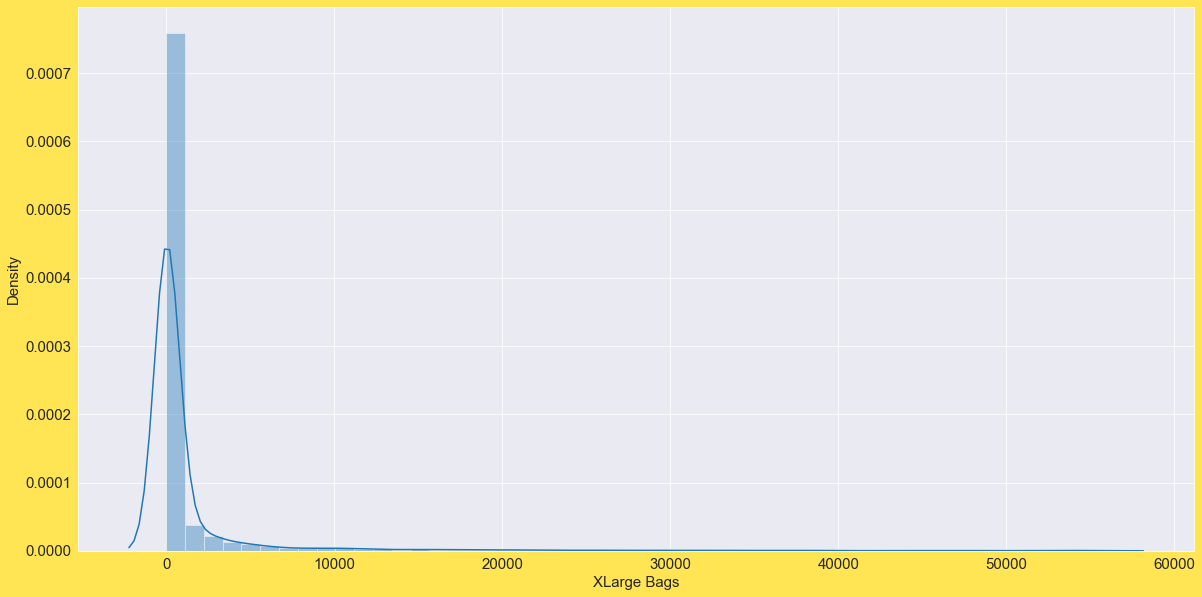

In [81]:
# Now checking skewness
for i in cont_cols.columns:
    plt.figure(figsize=(20,10))
    sns.distplot(reg_new[i])
    plt.show()
    
# We can observe there is high amount of skewness present in the continuous columns

In [82]:
reg_new.skew().sort_values()

# We can see numerically that there is high amount of skewness present in some of the columns

# Keeping the threshold of + 0.3 to -0.3

# We will remove skewness only in which are more than +-0.3 skewed

type_organic   -0.037741
Day             0.011778
region          0.012798
Month           0.107408
year            0.229976
AveragePrice    0.377432
Total Volume    3.767138
Total Bags      4.066771
Small Bags      4.222706
4225            4.455745
4046            4.909848
Large Bags      5.053434
4770            5.117170
XLarge Bags     6.135607
dtype: float64

In [83]:
# seperating the skewed columns
skewed_cols = ['Total Volume','Total Bags','Small Bags','4225','4046','Large Bags','4770','XLarge Bags']

In [84]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [85]:
#Removing skewness using yeo-johnson
reg_new[skewed_cols] = pt.fit_transform(reg_new[skewed_cols].values)

In [86]:
# checking skewness again
reg_new.skew().sort_values()

# We can still see that there is skewness in XLarge Bags column which is exceeding the threshold

Large Bags     -0.110913
4225           -0.044675
4046           -0.039282
type_organic   -0.037741
Small Bags     -0.024405
Total Bags     -0.022204
Total Volume   -0.008642
Day             0.011778
region          0.012798
4770            0.024168
Month           0.107408
year            0.229976
AveragePrice    0.377432
XLarge Bags     0.853758
dtype: float64

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

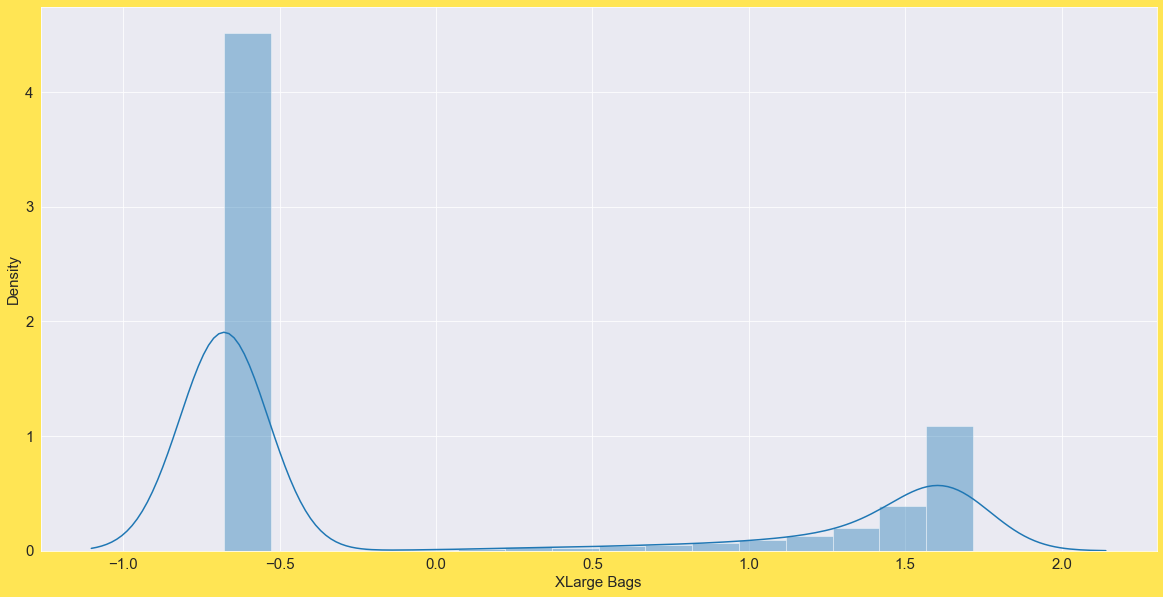

In [87]:
# checking XLarge skewness
plt.figure(figsize=(20,10))
sns.distplot(reg_new['XLarge Bags'])

In [88]:
# I have used sqrt, square, log, log1,log2 and boxcox method to remove the skewness from XLarge,they failed to reduce the skewness
# cbrt cuberoot method reduced it to the maximun
# we cannot reduce it further, this is the maximum
reg_new['XLarge Bags'] = np.cbrt(reg_new['XLarge Bags'])

In [89]:
# checking skewness again
reg_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.772538
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
type_organic   -0.037741
dtype: float64

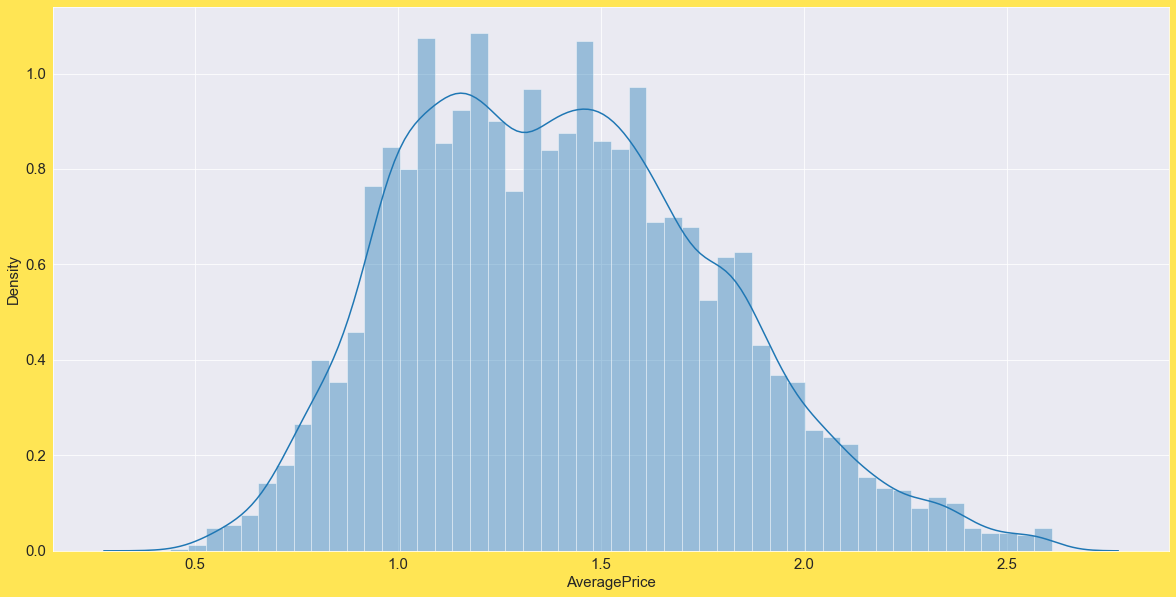

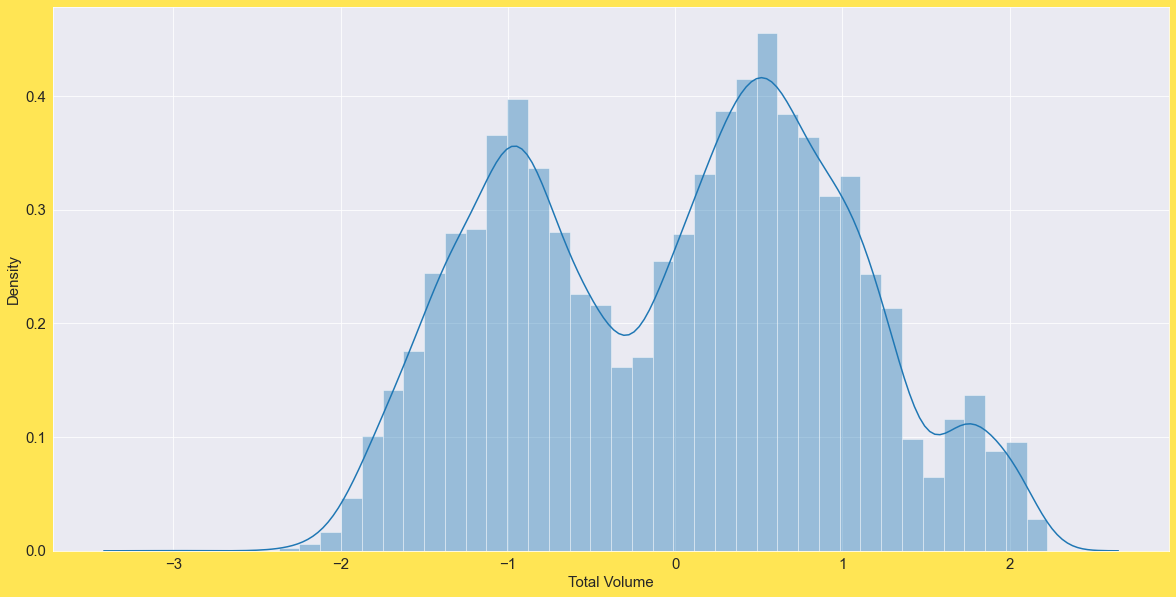

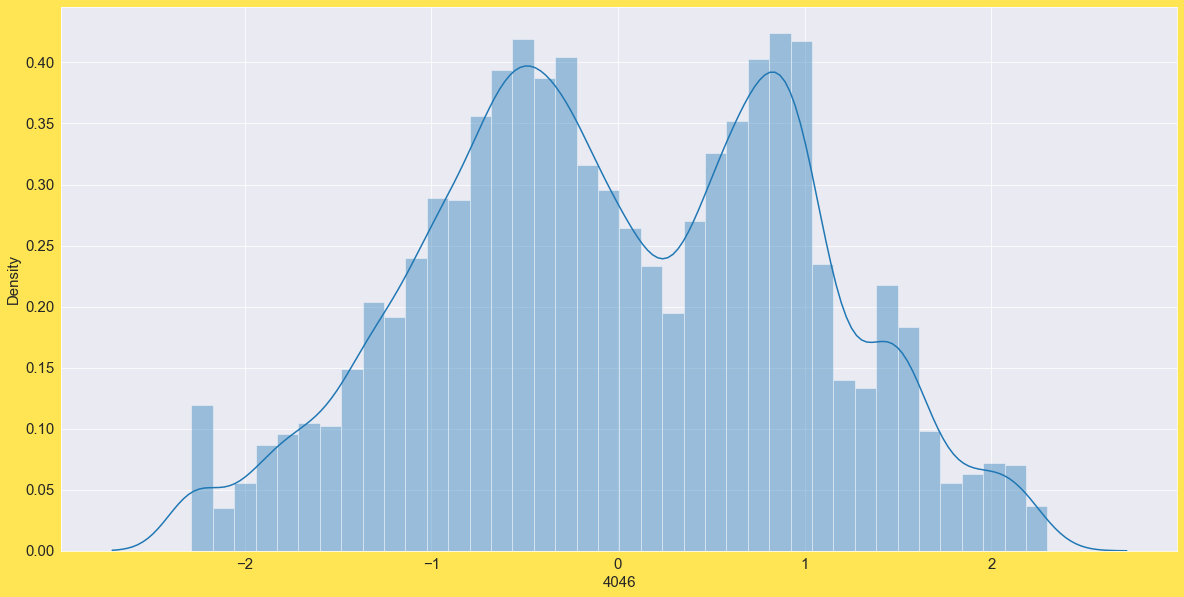

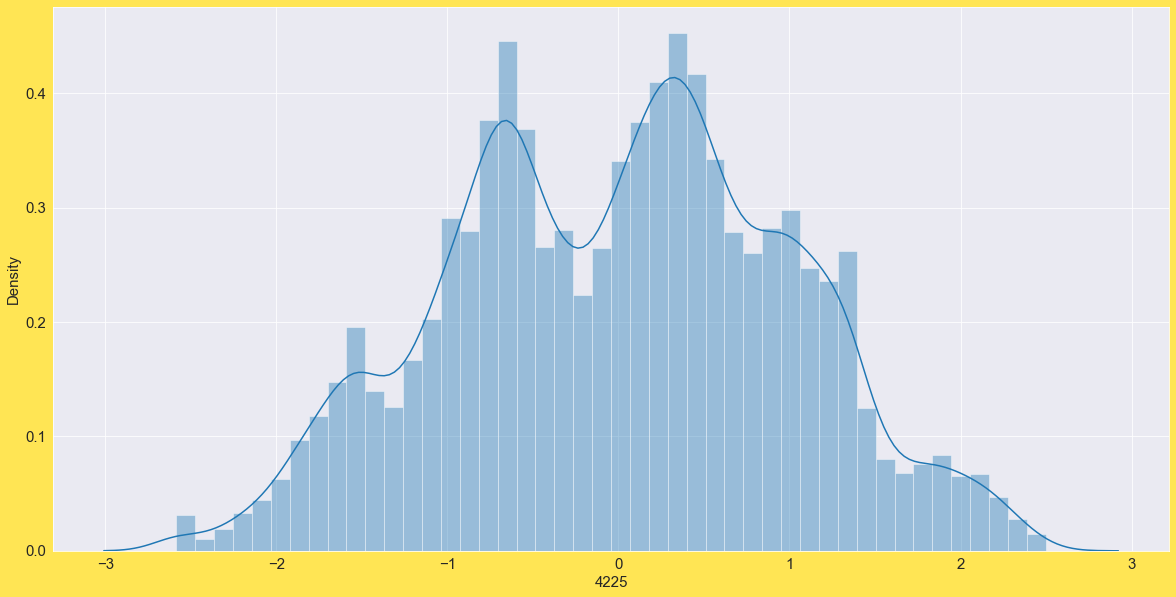

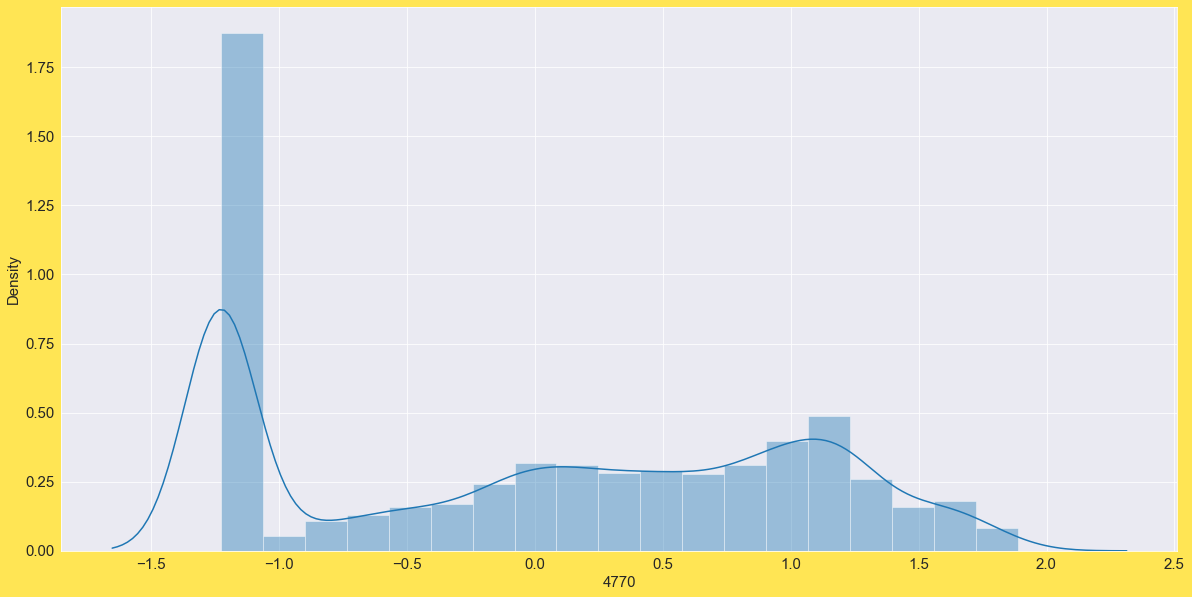

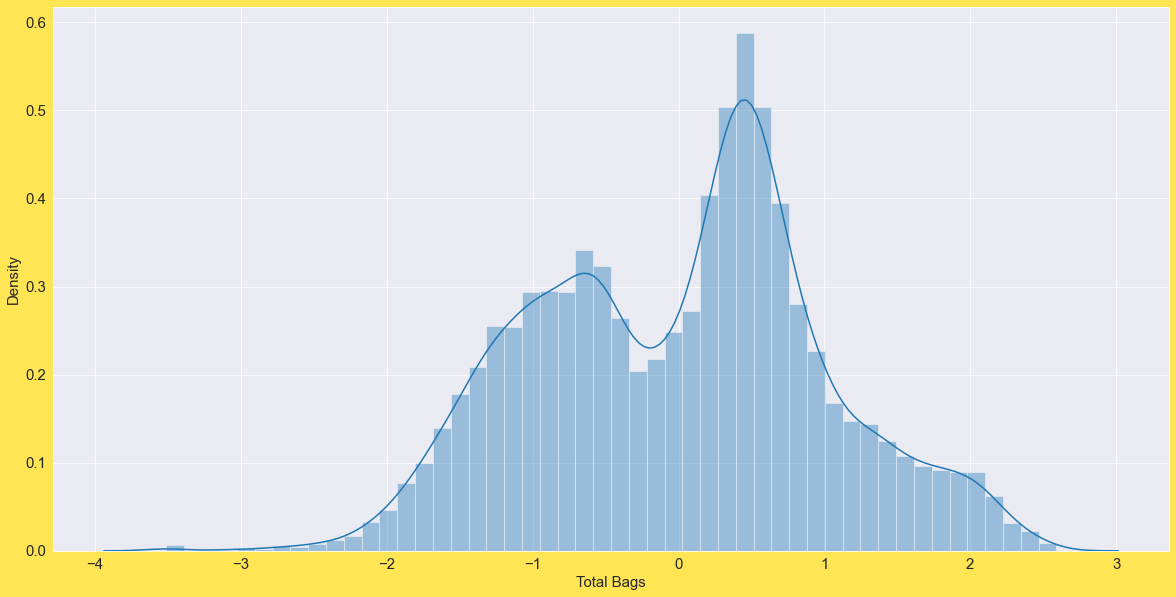

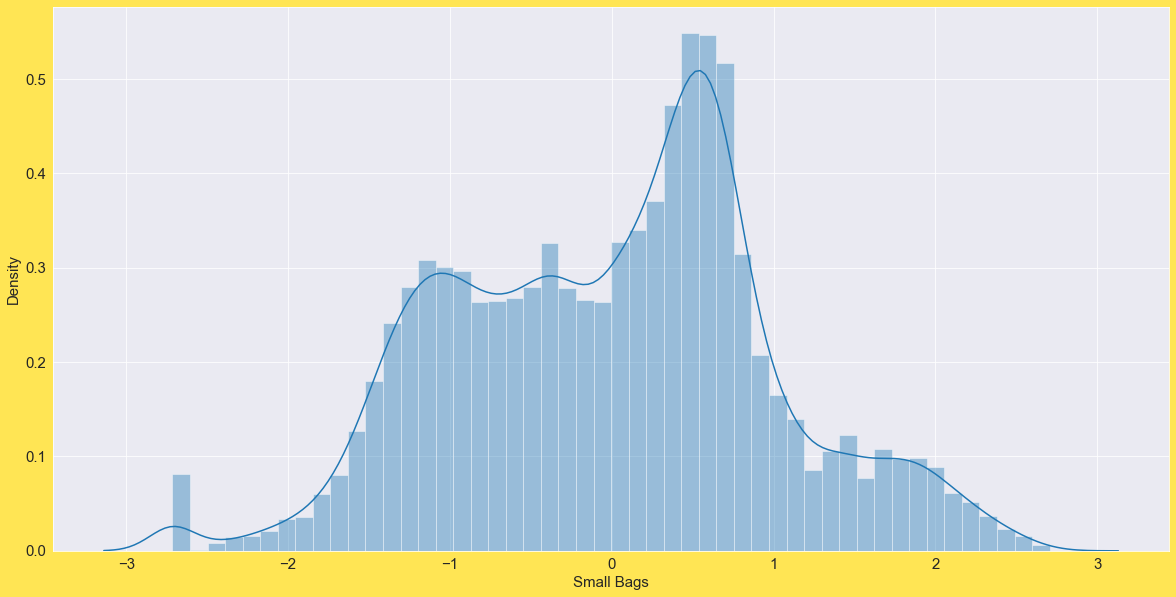

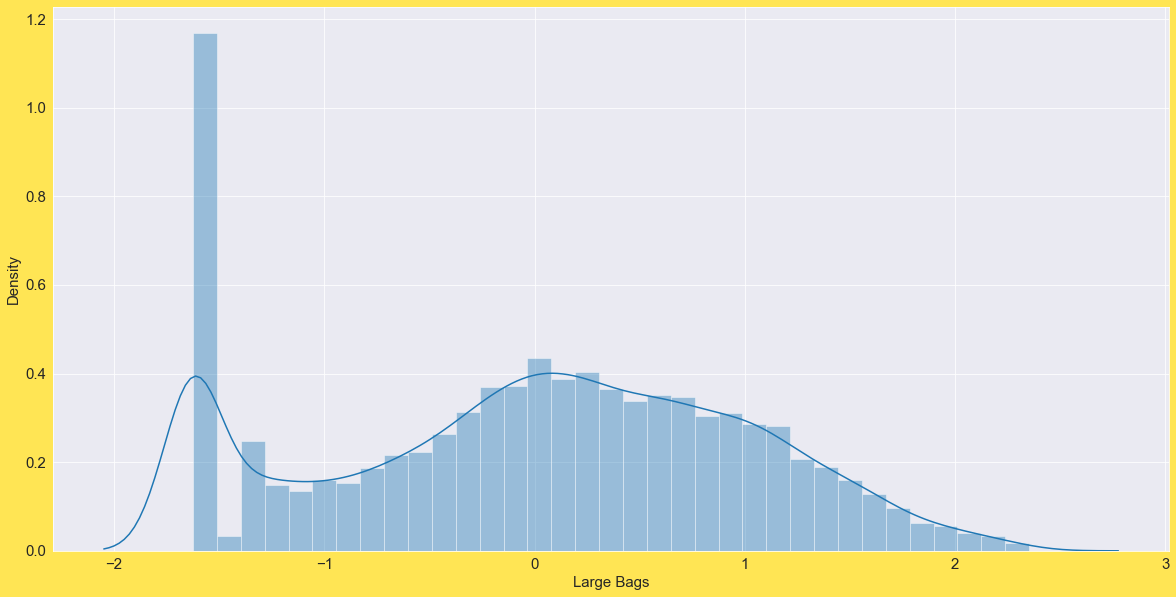

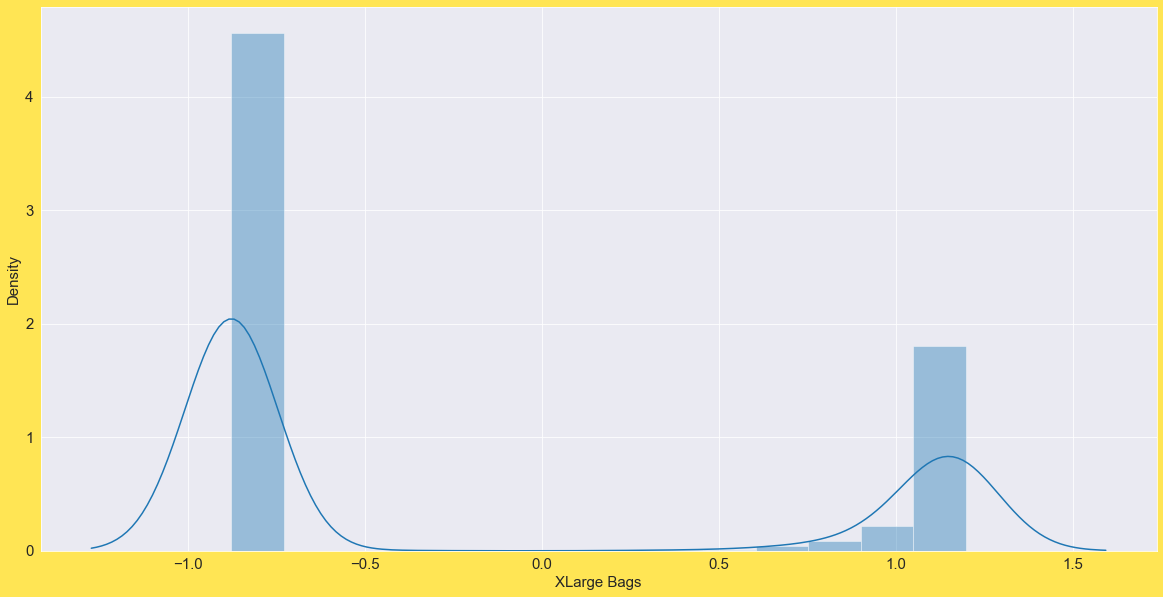

In [90]:
# Now checking skewness again
for i in cont_cols.columns:
    plt.figure(figsize=(20,10))
    sns.distplot(reg_new[i])
    plt.show()
    
# We can see that the skewness is reduced

### Correlation

In [91]:
reg_new.corr().T

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.580126 -0.554612 -0.453664 -0.493607   
Total Volume     -0.580126      1.000000  0.889248  0.924664  0.818545   
4046             -0.554612      0.889248  1.000000  0.764456  0.737191   
4225             -0.453664      0.924664  0.764456  1.000000  0.797186   
4770             -0.493607      0.818545  0.737191  0.797186  1.000000   
Total Bags       -0.564105      0.941082  0.800798  0.820596  0.761056   
Small Bags       -0.489430      0.905795  0.779462  0.786441  0.753593   
Large Bags       -0.484384      0.682569  0.603598  0.616089  0.547691   
XLarge Bags      -0.400140      0.628940  0.575080  0.582023  0.616665   
year              0.091704      0.080706  0.001350 -0.001524 -0.049934   
region           -0.003242      0.068983  0.162069  0.033926  0.041295   
Month             0.149502     -0.021861 -0.021731 -0.021967 -0.013533   
Day               0.026819     -0.006430 -0.005191 -0.006289  0.001251   
type_organic      0.613150     -0.799821 -0.725000 -0.747349 -0.780137   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.564105   -0.489430   -0.484384    -0.400140  0.091704   
Total Volume    0.941082    0.905795    0.682569     0.628940  0.080706   
4046            0.800798    0.779462    0.603598     0.575080  0.001350   
4225            0.820596    0.786441    0.616089     0.582023 -0.001524   
4770            0.761056    0.753593    0.547691     0.616665 -0.049934   
Total Bags      1.000000    0.949975    0.729681     0.610880  0.214666   
Small Bags      0.949975    1.000000    0.566610     0.600631  0.190267   
Large Bags      0.729681    0.566610    1.000000     0.448599  0.191742   
XLarge Bags     0.610880    0.600631    0.448599     1.000000  0.155501   
year            0.214666    0.190267    0.191742     0.155501  1.000000   
region          0.071460    0.057312    0.089954    -0.015179 -0.004417   
Month          -0.009209   -0.004761   -0.014694     0.023181 -0.175287   
Day            -0.003164   -0.000222   -0.000130     0.011708  0.004700   
type_organic   -0.724752   -0.719063   -0.498894    -0.673184  0.003867   

                region     Month       Day  type_organic  
AveragePrice -0.003242  0.149502  0.026819      0.613150  
Total Volume  0.068983 -0.021861 -0.006430     -0.799821  
4046          0.162069 -0.021731 -0.005191     -0.725000  
4225          0.033926 -0.021967 -0.006289     -0.747349  
4770          0.041295 -0.013533  0.001251     -0.780137  
Total Bags    0.071460 -0.009209 -0.003164     -0.724752  
Small Bags    0.057312 -0.004761 -0.000222     -0.719063  
Large Bags    0.089954 -0.014694 -0.000130     -0.498894  
XLarge Bags  -0.015179  0.023181  0.011708     -0.673184  
year         -0.004417 -0.175287  0.004700      0.003867  
region        1.000000  0.000119 -0.000046      0.018409  
Month         0.000119  1.000000  0.011917     -0.009499  
Day          -0.000046  0.011917  1.000000     -0.002287  
type_organic  0.018409 -0.009499 -0.002287      1.000000

<AxesSubplot:>

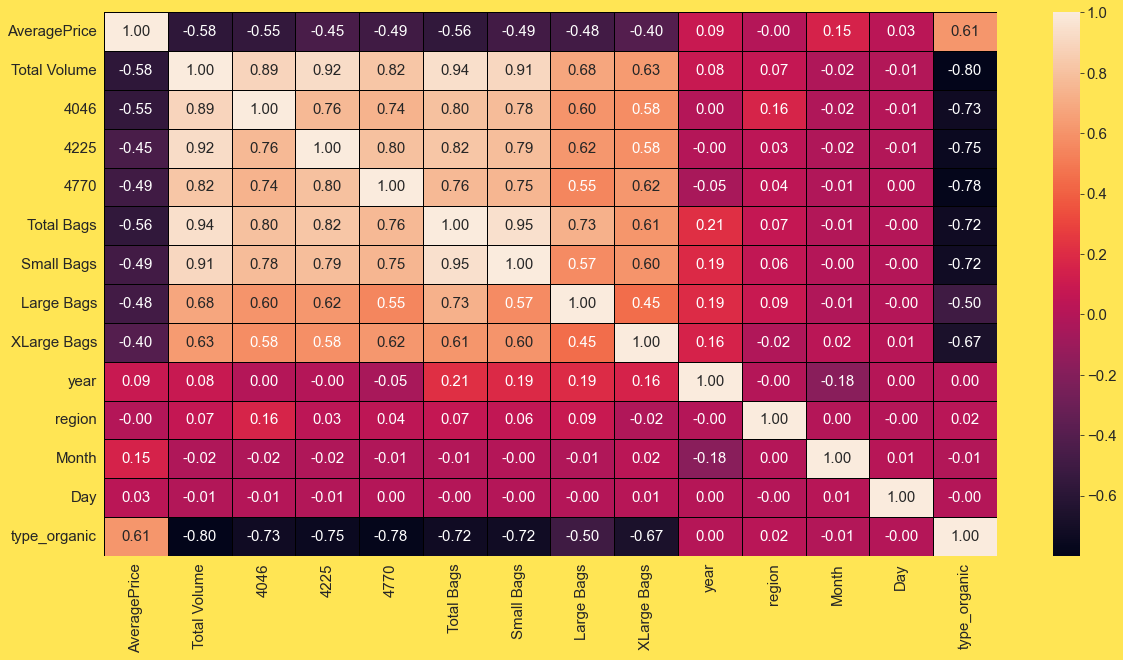

In [92]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(reg_new.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [93]:
# We can Observe that:-

# Total Bags and Small Bags are highly correlated with each other.
# Total Volume and Small Bags are highly correlated with each other.
# Total Volume and Total Bags are highly correlated with each other.
# Total Volume and 4225 are highly correlated with each other.
# We can see negative correlation but not more than -0.8 so let it be.

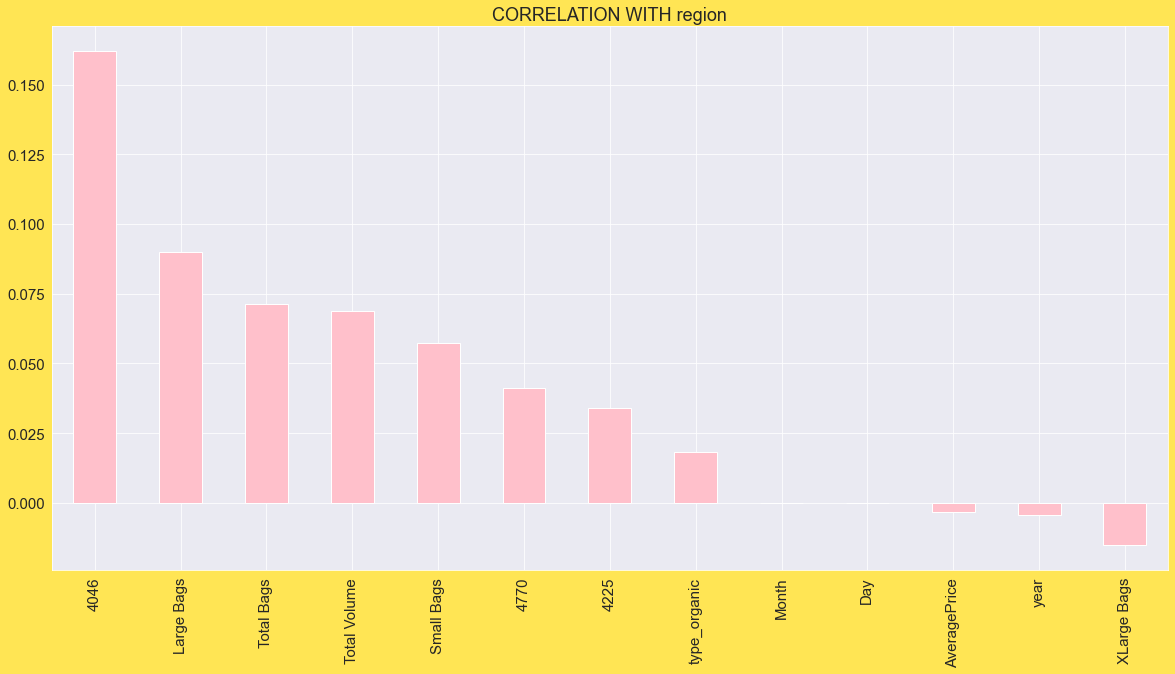

In [94]:
# plotting a barplot to see the correlation with respect to region as target
plt.figure(figsize=(20,10))
reg_new.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='pink')
plt.title('CORRELATION WITH region',fontsize=18)
plt.show()

In [95]:
# We can see that the Month and day columns are least correlated with the target in the graph and down here
reg_new.corr()['region'].sort_values()

XLarge Bags    -0.015179
year           -0.004417
AveragePrice   -0.003242
Day            -0.000046
Month           0.000119
type_organic    0.018409
4225            0.033926
4770            0.041295
Small Bags      0.057312
Total Volume    0.068983
Total Bags      0.071460
Large Bags      0.089954
4046            0.162069
region          1.000000
Name: region, dtype: float64

In [96]:
# dropping Day
reg_new.drop(['Day','Month'],axis=1,inplace=True)

In [97]:
reg_new.shape

(17651, 12)

In [98]:
# checking if there is any imbalance in the target
reg_new['region'].value_counts()

# We can see that the data there is no imbalance in the data

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [99]:
# Seperating the x independent an y dependent columns
x = reg_new.drop(['region'],axis=1)
y = reg_new['region']

In [100]:
x.shape

(17651, 11)

In [101]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [102]:
# We should check the multicolllinearity

# inorder to do that we have to scale the data
from sklearn.preprocessing import StandardScaler

In [103]:
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns) # transforming the data and converting it as a df, because sc gives us result in arrays

In [104]:
round(x.sum().mean(),1)# We can see after scaling our mean is almost 0

0.0

In [105]:
# performing vif to check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
def vif_calc():
    vif = pd.DataFrame()
    vif["vif_Features"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"] = x.columns
    print(vif)

In [107]:
vif_calc()

# We can see that Total Volume is having highest vif
# So lets drop it and check the vif score again

    vif_Features      Features
0       2.111848  AveragePrice
1      54.842698  Total Volume
2       6.909116          4046
3      12.365013          4225
4       3.941357          4770
5      35.757683    Total Bags
6      17.277779    Small Bags
7       3.473342    Large Bags
8       2.052785   XLarge Bags
9       1.409652          year
10      4.185663  type_organic


In [108]:
x.drop(['Total Volume'],axis=1,inplace=True)

In [109]:
# Running the code again
vif_calc()

# We still got Total Bags with high vif
# So dropping it and checking again

   vif_Features      Features
0      2.053478  AveragePrice
1      3.589474          4046
2      4.593924          4225
3      3.931365          4770
4     26.561693    Total Bags
5     17.267078    Small Bags
6      3.419679    Large Bags
7      2.042229   XLarge Bags
8      1.409592          year
9      4.055147  type_organic


In [110]:
x.drop(['Total Bags'],axis=1,inplace=True)

In [111]:
vif_calc()

# Now we can seethat multicollinearity issue is resolved

   vif_Features      Features
0      1.898400  AveragePrice
1      3.583365          4046
2      4.317553          4225
3      3.931303          4770
4      4.127845    Small Bags
5      2.042970    Large Bags
6      2.042225   XLarge Bags
7      1.357319          year
8      4.032218  type_organic


## Model Building

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [113]:
lor = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()
sgdc = SGDClassifier()
xgbc = XGBClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
mnb = MultinomialNB()

# imported naive bayes as well because for multiple classification works better with naive bayes

In [114]:
lor = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lor.fit(x_train,y_train)
    pred_train = lor.predict(x_train)
    pred_test = lor.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 64 The model performs very well
At random state:- 64
Training accuracy score is  50.0
Testing accuracy score is  50.0 


At random state 93 The model performs very well
At random state:- 93
Training accuracy score is  50.0
Testing accuracy score is  50.0 


At random state 202 The model performs very well
At random state:- 202
Training accuracy score is  50.3
Testing accuracy score is  50.3 


At random state 220 The model performs very well
At random state:- 220
Training accuracy score is  50.1
Testing accuracy score is  50.1 


At random state 273 The model performs very well
At random state:- 273
Training accuracy score is  50.2
Testing accuracy score is  50.2 


At random state 338 The model performs very well
At random state:- 338
Training accuracy score is  50.3
Testing accuracy score is  50.3 


At random state 471 The model performs very well
At random state:- 471
Training accuracy score is  50.4
Testing accuracy score is  50.4 


At random state 696 The model p

In [115]:
# At random state 922 the model performs well
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=922)

In [116]:
lor.fit(x_train,y_train)

LogisticRegression()

In [119]:
pred_train_lor = lor.predict(x_train)

In [121]:
pred_test_lor = lor.predict(x_test)

In [126]:
accuracy_score(y_test,pred_test_lor)

0.5052393089776267

In [127]:
confusion_matrix(y_test,pred_test_lor)

array([[39,  0,  0, ...,  0,  0,  0],
       [ 0, 29,  0, ...,  0,  0,  0],
       [ 0,  0, 44, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 37,  0,  0],
       [ 0,  0,  0, ...,  0, 46,  0],
       [ 0,  3,  3, ...,  0,  0, 10]], dtype=int64)

In [128]:
# checking the cv score
lss = accuracy_score(y_test,pred_test_lor) # creating an instance for acccuracy score
from sklearn.model_selection import cross_val_score

In [134]:
# FINDING THE BEST CV FOR LOGISTIC REG
# I have tried from 5 to 35 it is giving me less cv score so I have increased the cv from 35 to 40 
for j in range(35,40):
    lsscore = cross_val_score(lor,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')

[0.54455446 0.60990099 0.54257426 0.51287129 0.53267327 0.48910891
 0.44356436 0.41188119 0.43168317 0.50891089 0.43168317 0.41865079
 0.36111111 0.42063492 0.5218254  0.48611111 0.43650794 0.38293651
 0.50992063 0.48809524 0.56746032 0.53174603 0.48809524 0.47619048
 0.47420635 0.5297619  0.56746032 0.48015873 0.38690476 0.3015873
 0.38492063 0.54365079 0.50793651 0.45634921 0.37103175]
At cv:-  35
Cross validation score is:-  47.29331402528009
accuracy_score is:-  50.52393089776267


[0.54582485 0.61099796 0.54582485 0.49694501 0.55193483 0.50509165
 0.39918534 0.46232179 0.40529532 0.48065173 0.51120163 0.43469388
 0.33265306 0.36938776 0.47142857 0.52040816 0.48979592 0.39591837
 0.45714286 0.45714286 0.54081633 0.55102041 0.51632653 0.47142857
 0.48571429 0.49795918 0.54897959 0.55306122 0.48367347 0.35714286
 0.31020408 0.40408163 0.54897959 0.50204082 0.46734694 0.37755102]
At cv:-  36
Cross validation score is:-  47.38936918963104
accuracy_score is:-  50.52393089776267


[0.554

In [135]:
# We are getting almost the same cv score as our accuracy score, so our model  is performing well
# selecting the cv=38 
lsscore_selected = cross_val_score(lor,x,y,cv=38).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

The cv score of logistcic Regression is  0.47583718751829523 
The accuracy score of logistic regression is:  0.5052393089776267


### DecisionTreeClassifier

### Hyperparameter Tuning for DTC

In [153]:
# huperparameter tuning DTC
dtc_search = GridSearchCV(dtc,{'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"]})

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=584)

In [194]:
dtc_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [195]:
print(dtc_search.best_score_)
print(dtc_search.best_estimator_)
print(dtc_search.best_params_)

0.7922804532577904
DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'splitter': 'best'}


In [197]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='entropy',splitter='best') # using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_dtc_test,y_test))
print('Classification report of Dtc',classification_report(pred_dtc_test,y_test))
print('\n')

# We got 80% accuracy using dtc with best params

Training score of dtc 1.0
Accuracy Score of dtc 0.8085528178986123
Confusion Matrix of dtc [[47  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 30  1  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  2  0 ...  0  0 44]]
Classification report of Dtc               precision    recall  f1-score   support

           0       0.78      0.84      0.81        56
           1       0.77      0.72      0.74        78
           2       0.91      0.91      0.91        78
           3       0.78      0.81      0.79        72
           4       0.89      0.89      0.89        84
           5       0.75      0.75      0.75        63
           6       0.89      0.96      0.92        50
           7       0.75      0.80      0.77        59
           8       0.93      0.94      0.93        66
           9       0.82      0.80      0.81        76
          10       0.71      0.70      0.70        69
          11       0.86      0.85      0.86        74
          12       0.

In [203]:
# Checking the cross validation of dtc
dtca = accuracy_score(pred_dtc_test,y_test)
for j in range(55,61):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score of DTC is:- ',dsc*100)
    print('accuracy_score of DTC is:- ',dtca*100)
    print('\n')
    

[0.78504673 0.83800623 0.81308411 0.81931464 0.80062305 0.86604361
 0.86292835 0.82866044 0.75700935 0.70716511 0.75389408 0.75389408
 0.87227414 0.8411215  0.7788162  0.83489097 0.77258567 0.80373832
 0.71028037 0.72274143 0.87227414 0.85669782 0.85981308 0.86915888
 0.83489097 0.78193146 0.75389408 0.76323988 0.75389408 0.75389408
 0.75700935 0.77570093 0.7788162  0.76323988 0.66978193 0.67912773
 0.62305296 0.71339564 0.71028037 0.72274143 0.67601246 0.69470405
 0.74454829 0.73520249 0.80062305 0.7258567  0.73831776 0.76323988
 0.68535826 0.69470405 0.72274143 0.715625   0.71875    0.653125
 0.7625    ]
At cv:-  55
Cross validation score of DTC is:-  76.44774851316907
accuracy_score of DTC is:-  80.85528178986124


[0.80379747 0.84493671 0.83227848 0.85126582 0.81962025 0.84493671
 0.82911392 0.83227848 0.80379747 0.62974684 0.77848101 0.8031746
 0.83174603 0.82222222 0.82222222 0.83809524 0.8031746  0.80634921
 0.77142857 0.70793651 0.85396825 0.82539683 0.87301587 0.87936508
 0.82

In [204]:
# the cv score at 58 and accuracy score is almost same, so we can say that the model is working well
# cv= 58 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=58).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

The cv score of DecisionTree is  0.7688028100919341 
The accuracy score of DecisionTree is:  0.8085528178986123


### Support Vector Classifier

Hyperparameter Tuning

In [176]:
# creating paramgrid
paramgrid_svc = {'C':[0.1,100,1000],
                 'kernel':['rbf','poly','sigmoid'],
                 'degree':[3,4,5,6],'gamma':['scale','auto']}
print(paramgrid_svc)

{'C': [0.1, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto']}


In [177]:
svcs = GridSearchCV(svc,param_grid=paramgrid_svc,error_score='raise') # error function will raise an exception if any

In [178]:
svcs.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 100, 1000], 'degree': [3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [179]:
print(svcs.best_score_)
print(svcs.best_estimator_)
print(svcs.best_params_)

0.9063537029542695
SVC(C=100)
{'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [180]:
# running the model using the best params
svc = SVC(C=1000,degree=3,gamma='scale',kernel='rbf') # using the best parameters
svc.fit(x_train,y_train)
pred_svc_test= svc.predict(x_test)
pred_svc_train = svc.predict(x_train)
print('Training score of svc',accuracy_score(pred_svc_train,y_train))
print('Accuracy Score of svc',accuracy_score(pred_svc_test,y_test))
print('Confusion Matrix of svc',confusion_matrix(pred_svc_test,y_test))
print('Classification report of svc',classification_report(pred_svc_test,y_test))
print('\n')

# We are getting 91% accuracy, lets check with the cv

Training score of svc 0.9829218939700526
Accuracy Score of svc 0.9152190332326284
Confusion Matrix of svc [[ 95   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 102 ...   0   0   1]
 ...
 [  0   0   0 ...  39   0   0]
 [  0   0   0 ...   0  71   0]
 [  0   1   0 ...   0   0  86]]
Classification report of svc               precision    recall  f1-score   support

           0       0.93      0.83      0.88       115
           1       0.81      0.83      0.82       106
           2       1.00      0.95      0.98       107
           3       0.88      0.98      0.93        90
           4       0.95      0.90      0.93       105
           5       0.84      0.83      0.83        87
           6       1.00      0.98      0.99        88
           7       0.97      0.91      0.94       112
           8       0.98      0.98      0.98       101
           9       0.87      0.85      0.86        96
          10       0.87      0.83      0.85       112
          11       0.94 

In [221]:
# checking the cv score
svca = accuracy_score(y_test,pred_svc_test) 
for j in range(66,71):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.92164179 0.96641791 0.92537313 0.97014925 0.89925373 0.93283582
 0.92910448 0.93656716 0.9738806  0.93656716 0.87686567 0.90298507
 0.92537313 0.91044776 0.96268657 0.9738806  0.91791045 0.95522388
 0.9738806  0.9141791  0.89552239 0.91044776 0.92164179 0.84328358
 0.96268657 0.94402985 0.95522388 0.92537313 0.95895522 0.91011236
 0.90262172 0.8988764  0.88014981 0.8988764  0.79400749 0.88389513
 0.84269663 0.8988764  0.82771536 0.89138577 0.80898876 0.81273408
 0.82022472 0.78651685 0.7752809  0.84269663 0.86142322 0.83895131
 0.82022472 0.82397004 0.87265918 0.86142322 0.84269663 0.83520599
 0.87265918 0.79026217 0.76404494 0.84269663 0.7340824  0.84644195
 0.91385768 0.88014981 0.79400749 0.80524345 0.87265918 0.88764045]
At cv:-  66
Cross validation score is:-  88.27021684224434
accuracy_score is:-  91.67374681393373


[0.92045455 0.97727273 0.93560606 0.98106061 0.91287879 0.93560606
 0.93560606 0.93181818 0.97727273 0.93181818 0.87878788 0.93939394
 0.93560606 0.87121212 0.965

In [222]:
# selecting cv = 68
svcscore_selected = cross_val_score(svc,x,y,cv=68).mean()
print('The cv score of SVC is ',svcscore_selected,'\nThe accuracy score of SVC is: ',svca)

# We are getting 91% accuracy from support vector classifier and the difference between cv score and accuracy is almost same
# So our model is performing well

The cv score of SVC is  0.8861621883680707 
The accuracy score of SVC is:  0.9167374681393373


### KNeighborsClassifier

Hyperparameter Tuning

In [236]:
paramgrid_knc = {'n_neighbors':[x for x in range(5,16)],'algorithm':['auto','ball_tree','kd_tree'],
                 'leaf_size':[l for l in range(30,41)],'p':[2,3,4,6]}

In [239]:
knc_search = GridSearchCV(knc,param_grid=paramgrid_knc,cv=3)

In [240]:
knc_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40, 41, 42, 43, 44, 45],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'p': [2, 3, 4, 6]})

In [241]:
print(knc_search.best_score_)
print(knc_search.best_estimator_)
print(knc_search.best_params_)

0.8027622985156552
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 2}


In [242]:
# running the model using the best params
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,p=2) # using the best parameters
knc.fit(x_train,y_train)
pred_knc_test= knc.predict(x_test)
pred_knc_train = knc.predict(x_train)
print('Training score of knc: ',accuracy_score(pred_knc_train,y_train))
print('Accuracy Score of knc: ',accuracy_score(pred_knc_test,y_test))
print('Confusion Matrix of knc: ',confusion_matrix(pred_knc_test,y_test))
print('Classification report of knc: ',classification_report(pred_knc_test,y_test))
print('\n')

# We are getting accuracy of 84% 

Training score of knc:  0.9078611898016997
Accuracy Score of knc:  0.8496176720475785
Confusion Matrix of knc:  [[54  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  1]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  0  0]
 [ 0  0  0 ...  0 48  0]
 [ 0  2  0 ...  0  0 48]]
Classification report of knc:                precision    recall  f1-score   support

           0       0.90      0.77      0.83        70
           1       0.78      0.75      0.77        76
           2       0.95      0.89      0.92        83
           3       0.80      0.89      0.84        66
           4       0.96      0.94      0.95        86
           5       0.75      0.76      0.75        62
           6       1.00      0.98      0.99        55
           7       0.87      0.81      0.84        68
           8       0.88      0.92      0.90        64
           9       0.82      0.80      0.81        76
          10       0.71      0.64      0.67        75
          11       0.93      0.88      0.91        7

In [247]:
# checking the cv score
knca = accuracy_score(y_test,pred_knc_test) 
for j in range(70,76):
    knccore = cross_val_score(knc,x,y,cv=j)
    print(knccore)
    kncc = knccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',kncc*100)
    print('accuracy_score is:- ',knca*100)
    print('\n') # cv and accuracy is almost same

[0.85375494 0.92094862 0.88932806 0.9486166  0.90513834 0.88537549
 0.91699605 0.8972332  0.9486166  0.91304348 0.83794466 0.81349206
 0.8015873  0.83730159 0.81349206 0.86111111 0.84126984 0.87698413
 0.8968254  0.87301587 0.8531746  0.84126984 0.86507937 0.73809524
 0.79761905 0.84920635 0.85714286 0.90873016 0.90873016 0.89285714
 0.81349206 0.82142857 0.75396825 0.76587302 0.73412698 0.80952381
 0.78174603 0.77777778 0.73809524 0.80555556 0.80952381 0.82936508
 0.82142857 0.8452381  0.75793651 0.74206349 0.71031746 0.70238095
 0.73412698 0.73412698 0.73809524 0.75       0.78571429 0.76587302
 0.84126984 0.79365079 0.78174603 0.67063492 0.73809524 0.63095238
 0.70238095 0.76587302 0.69444444 0.73412698 0.78174603 0.70238095
 0.71031746 0.73412698 0.77777778 0.75      ]
At cv:-  70
Cross validation score is:-  80.54468823102361
accuracy_score is:-  84.96176720475785


[0.85140562 0.92771084 0.89558233 0.95983936 0.89156627 0.91164659
 0.93574297 0.88353414 0.92771084 0.93975904 0.859

In [248]:
# selecting cv = 74 and we are getting accuracy and cv score almost same , which means our model is working well
kncscore_selected = cross_val_score(knc,x,y,cv=74).mean()
print('The cv score of KNeighborsC is ',kncscore_selected,'\nThe accuracy score of KNeighborsC is: ',knca)

# 84% accuracy from KNeighborsC

The cv score of KNeighborsC is  0.8051827538659929 
The accuracy score of KNeighborsC is:  0.8496176720475785


### SGDClassifier

##### Hyperparameter Tuning

In [320]:
# paramgrid
parametergrid_sgdc = {'loss':['hinge','log_loss','log','modified_huber','squared_hinge'],
                     'penalty':['l2','l1','elasticnet'],'alpha':[0.1,.001,0.0001],'max_iter':[1000,1200,1300]}

In [321]:
sgdc_search = GridSearchCV(sgdc,param_grid=parametergrid_sgdc)

In [322]:
sgdc_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [1000, 1200, 1300],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [323]:
print(sgdc_search.best_score_)
print(sgdc_search.best_estimator_)
print(sgdc_search.best_params_)

0.3937677053824363
SGDClassifier(loss='log', penalty='l1')
{'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}


In [326]:
# running the model using the best params
sgdc = SGDClassifier(alpha=0.0001,loss='log',max_iter=1000,penalty='l1') # using the best parameters
sgdc.fit(x_train,y_train)
pred_sgdc_test= sgdc.predict(x_test)
pred_sgdc_train = sgdc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_sgdc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_sgdc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_sgdc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_sgdc_test,y_test))
print('\n')

Training score of SGDClassifier:  0.3907932011331445
Accuracy Score of SGDClassifier:  0.3633531577456811
Confusion Matrix of SGDClassifier:  [[ 1  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  4]
 [ 0  0 34 ...  0  0  1]
 ...
 [ 0  0  0 ... 29  3  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  5  0 ...  0  0 21]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.02      0.50      0.03         2
           1       0.50      0.19      0.28       162
           2       0.56      0.41      0.48        82
           3       0.18      0.92      0.30        13
           4       0.18      0.42      0.25        31
           5       0.36      0.29      0.32        77
           6       0.68      0.68      0.68        57
           7       0.86      0.47      0.61       114
           8       0.75      0.53      0.62       110
           9       0.65      0.44      0.53        99
          10       0.44      0.25      0.32       137
          11

In [328]:
# checking the cv score
sgdca = accuracy_score(y_test,pred_sgdc_test) 
for j in range(4,10):
    sgdccore = cross_val_score(sgdc,x,y,cv=j)
    print(sgdccore)
    sgdcc = sgdccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgdca*100)
    print('\n') # cv and accuracy is almost same
    
    # We are getting very least accurac y using SGDClassifier

[0.239293   0.21504645 0.23453433 0.22280145]
At cv:-  4
Cross validation score is:-  22.79188081492516
accuracy_score is:-  36.33531577456811


[0.23845936 0.23314448 0.33852691 0.31246459 0.22322946]
At cv:-  5
Cross validation score is:-  26.91649598096343
accuracy_score is:-  36.33531577456811


[0.23691366 0.24745071 0.21312033 0.29061863 0.29367777 0.23563414]
At cv:-  6
Cross validation score is:-  25.290253988998685
accuracy_score is:-  36.33531577456811


[0.26090404 0.28826328 0.22878668 0.35011895 0.36215787 0.26576755
 0.30583102]
At cv:-  7
Cross validation score is:-  29.454705768924068
accuracy_score is:-  36.33531577456811


[0.32306298 0.30811056 0.23062981 0.29147779 0.30235721 0.32048957
 0.25793291 0.31006346]
At cv:-  8
Cross validation score is:-  29.301553698135947
accuracy_score is:-  36.33531577456811


[0.3312946  0.32976555 0.27536971 0.24018358 0.32687404 0.37429883
 0.3518613  0.27485977 0.32789393]
At cv:-  9
Cross validation score is:-  31.47112550205274


In [ ]:
# selecting cv =
sgdcscore_selected = cross_val_score(sgdc,x,y,cv=).mean()
print('The cv score of SGDClassifier is ',sgdcscore_selected,'\nThe accuracy score of SGDClassifier is: ',sgdca)

### RandomForestClassifier 

##### Hyperparameter Tuning

In [114]:
# framing the parameters
# no of trees in random forest
n_estimators = [int(x) for x in range(100,300,50)]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4,6]

min_samples_split = [2,5,7,3,4]

min_samples_leaf = [2,3,4,5]

In [115]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,}
print(param_grid)

{'n_estimators': [100, 150, 200, 250], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6]}


In [116]:
rfc_search = GridSearchCV(rfc,param_grid=param_grid)

In [120]:
print(rfc_search.best_score_)
print(rfc_search.best_estimator_)
print(rfc_search.best_params_) # we got the best score and best params

0.7087110481586402
RandomForestClassifier(criterion='log_loss', max_depth=6, max_features='log2',
                       n_estimators=150)
{'criterion': 'log_loss', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 150}


In [123]:
# running the model using the best params
rfc = RandomForestClassifier(criterion='log_loss',max_depth=6, max_features='log2',
                       n_estimators=150)# using the best parameters
rfc.fit(x_train,y_train)
pred_rfc_test= rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)
print('Training score of RandomForestClassifier: ',accuracy_score(pred_rfc_train,y_train))
print('Accuracy Score of RandomForestClassifier: ',accuracy_score(pred_rfc_test,y_test))
print('Confusion Matrix of RandomForestClassifier: ',confusion_matrix(pred_rfc_test,y_test))
print('Classification report of RandomForestClassifier: ',classification_report(pred_rfc_test,y_test))
print('\n')

# getting 70% accuracy with random forest c

Training score of RandomForestClassifier:  0.7411473087818697
Accuracy Score of RandomForestClassifier:  0.7080147267063155
Confusion Matrix of RandomForestClassifier:  [[51  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  3]
 ...
 [ 0  0  0 ... 31  1  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0 30]]
Classification report of RandomForestClassifier:                precision    recall  f1-score   support

           0       0.85      0.65      0.73        79
           1       0.70      0.65      0.68        78
           2       0.83      0.84      0.84        77
           3       0.77      0.72      0.75        79
           4       0.67      0.77      0.71        73
           5       0.43      0.96      0.59        28
           6       0.91      0.83      0.87        59
           7       0.76      0.58      0.66        83
           8       0.91      0.86      0.88        71
           9       0.82      0.52      0.64       117
          10       0.59      0

In [130]:
# checking the cv score
from sklearn.model_selection import cross_val_score
rfca = accuracy_score(y_test,pred_rfc_test) 
for j in range(55,61):
    rfccore = cross_val_score(rfc,x,y,cv=j)
    print(rfccore)
    rfcc = rfccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfcc*100)
    print('accuracy_score is:- ',rfca*100)
    print('\n') # cv and accuracy is almost same

[0.76323988 0.76012461 0.74143302 0.72897196 0.73208723 0.75700935
 0.72274143 0.65732087 0.75077882 0.66666667 0.7694704  0.80685358
 0.7694704  0.74766355 0.73831776 0.78816199 0.75700935 0.7694704
 0.66043614 0.69781931 0.80996885 0.8317757  0.85358255 0.83800623
 0.78504673 0.70093458 0.59501558 0.60747664 0.65732087 0.62305296
 0.63551402 0.64174455 0.64174455 0.61682243 0.5576324  0.52024922
 0.52336449 0.59813084 0.63862928 0.68535826 0.60747664 0.62928349
 0.64797508 0.61993769 0.62616822 0.62928349 0.57943925 0.59190031
 0.59813084 0.56697819 0.64485981 0.59375    0.6625     0.475
 0.59375   ]
At cv:-  55
Cross validation score is:-  67.65972812234496
accuracy_score is:-  70.80147267063155


[0.7721519  0.77848101 0.73101266 0.75632911 0.72468354 0.74683544
 0.73417722 0.68670886 0.75316456 0.62341772 0.76582278 0.81904762
 0.77142857 0.74603175 0.7047619  0.78095238 0.76507937 0.77142857
 0.72380952 0.7047619  0.75873016 0.82539683 0.86349206 0.85714286
 0.8        0.73333333

In [131]:
# selecting cv = 60
# our model is working well as cv and accuracy score are almost same
rfcscore_selected = cross_val_score(rfc,x,y,cv=60).mean()
print('The cv score of RandomForestClassifier is ',rfcscore_selected,'\nThe accuracy score of RandomForestClassifier is: ',rfca)

# We are getting 70% accuracy from random forest

The cv score of RandomForestClassifier is  0.6825854183481301 
The accuracy score of RandomForestClassifier is:  0.7080147267063155


### AdaBoostClassifier

In [132]:
# I had tried to include different algorithms for base estimator, It is taking a very long time to run the code 
# so I have just settled for the default DecisionTreeClassifier as base_estimator
parametergrid_abc = {'n_estimators':[x for x in range(50,61)],'algorithm':['SAMME','SAMME.R'],'learning_rate':[0.5,1.0,1.5,2.0]}

In [133]:
abc_search = GridSearchCV(abc,param_grid=parametergrid_abc)

In [134]:
abc_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

In [135]:
print(abc_search.best_score_)
print(abc_search.best_estimator_)
print(abc_search.best_params_) # we got the best score and best params

0.12160056657223797
AdaBoostClassifier(learning_rate=0.5, n_estimators=57)
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 57}


In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=993)

In [155]:
# running the model using the best params
abc = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=57) # using the best parameters
abc.fit(x_train,y_train)
pred_abc_test= abc.predict(x_test)
pred_abc_train = abc.predict(x_train)
print('Training score of AdaBoostClassifier: ',accuracy_score(pred_abc_train,y_train))
print('Accuracy Score of AdaBoostClassifier: ',accuracy_score(pred_abc_test,y_test))
print('Confusion Matrix of AdaBoostClassifier: ',confusion_matrix(pred_abc_test,y_test))
print('Classification report of AdaBoostClassifier: ',classification_report(pred_abc_test,y_test))
print('\n')

# We are getting least accuracy with adaboost
# we are not going to check cv

Training score of AdaBoostClassifier:  0.1405908539053015
Accuracy Score of AdaBoostClassifier:  0.15219033232628398
Confusion Matrix of AdaBoostClassifier:  [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 21 ...  6  0 14]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0  2]]
Classification report of AdaBoostClassifier:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.21      0.15      0.18       137
           3       0.03      1.00      0.06         3
           4       0.20      0.06      0.09       346
           5       0.00      0.00      0.00         0
           6       0.12      0.71      0.20        14
           7       0.04      1.00      0.07         4
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00  

### GaussianNB

In [163]:
parametergrid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)} # selecting th

In [164]:
gnb_search = GridSearchCV(gnb,param_grid=parametergrid_gnb)

In [165]:
gnb_search.fit(x_train,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [166]:
print(gnb_search.best_score_)
print(gnb_search.best_estimator_)
print(gnb_search.best_params_) # we got the best score and best params

0.08369081343585594
GaussianNB(var_smoothing=1.5199110829529332e-05)
{'var_smoothing': 1.5199110829529332e-05}


In [167]:
# running the model using the best params
gnb = GaussianNB(var_smoothing=1.5199110829529332e-05) # using the best parameters
gnb.fit(x_train,y_train)
pred_gnb_test= gnb.predict(x_test)
pred_gnb_train = gnb.predict(x_train)
print('Training score of GaussianNB: ',accuracy_score(pred_gnb_train,y_train))
print('Accuracy Score of GaussianNB: ',accuracy_score(pred_gnb_test,y_test))
print('Confusion Matrix of GaussianNB: ',confusion_matrix(pred_gnb_test,y_test))
print('Classification report of GaussianNB: ',classification_report(pred_gnb_test,y_test))
print('\n')

Training score of GaussianNB:  0.08595710238769728
Accuracy Score of GaussianNB:  0.07760574018126888
Confusion Matrix of GaussianNB:  [[37  5  8 ...  0  0 20]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0 13  0 ...  0 13 24]
 [ 0  1  0 ...  0  0  0]]
Classification report of GaussianNB:                precision    recall  f1-score   support

           0       0.36      0.05      0.08       811
           1       0.00      0.00      0.00        20
           2       0.02      0.02      0.02       107
           3       0.05      0.33      0.09        15
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00         0
           7       0.11      0.11      0.11       106
           8       0.00      0.00      0.00         6
           9       0.31      0.16      0.21       177
          10       0.00      0.00      0.00        11
          11       0.0

In [171]:
# checking the cv score
gnba = accuracy_score(y_test,pred_gnb_test) 
for j in range(20,25):
    gnbcore = cross_val_score(gnb,x,y,cv=j)
    print(gnbcore)
    gnbc = gnbcore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',gnbc*100)
    print('accuracy_score is:- ',gnba*100)
    print('\n') # cv and accuracy is almost same

[0.0804077  0.07021518 0.06455266 0.06455266 0.0419026  0.07021518
 0.05549264 0.04756512 0.04643262 0.03397508 0.05322763 0.10657596
 0.07823129 0.07709751 0.09977324 0.05668934 0.03854875 0.05102041
 0.0861678  0.05895692]
At cv:-  20
Cross validation score is:-  6.408001479187369
accuracy_score is:-  7.7605740181268885


[0.08323424 0.07134364 0.06302021 0.06896552 0.039239   0.06539834
 0.06896552 0.04875149 0.04994055 0.04280618 0.0332937  0.08333333
 0.09642857 0.06547619 0.08214286 0.10238095 0.05357143 0.03809524
 0.0547619  0.08928571 0.05833333]
At cv:-  21
Cross validation score is:-  6.470323365176432
accuracy_score is:-  7.7605740181268885


[0.0871731  0.0747198  0.06849315 0.06724782 0.04483188 0.05230386
 0.06849315 0.05112219 0.05610973 0.04114713 0.02992519 0.04987531
 0.10723192 0.08478803 0.07855362 0.08977556 0.08977556 0.04862843
 0.03990025 0.06483791 0.08603491 0.05610973]
At cv:-  22
Cross validation score is:-  6.532173754451187
accuracy_score is:-  7.76057401

In [172]:
# selecting cv =23
gnbscore_selected = cross_val_score(gnb,x,y,cv=23).mean()
print('The cv score of GaussianNB is ',gnbscore_selected,'\nThe accuracy score of GaussianNB is: ',gnba)

# We are getting very low accuracy with gaussainbnb

The cv score of GaussianNB is  0.06656988691117284 
The accuracy score of GaussianNB is:  0.07760574018126888


### Model Selection

In [ ]:
# We are selecting Support vector classifier as it is giving more accuracy of 91% and cv score is also almost same

### Saving the Classification Model

In [174]:
import pickle
filename = 'Avacado_class'
pickle.dump(svc,open(filename, 'wb'))

In [181]:
import numpy as np
a = np.array(y_test)
predicted = np.array(svc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com

# comparison of predicted and original value

Original  Predicted
0           50         50
1           20         20
2           44         44
3           16         16
4            3          3
...        ...        ...
5291        46         46
5292        21         21
5293         4          4
5294         7          7
5295         3         23

[5296 rows x 2 columns]

### Now We haveto build the Regression Model with Average price as the target

In [318]:
avacado.head()

# creating a duplicate for building the model

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [319]:
price_df = avacado.copy()

# duplicating the df to solve the regression problem

In [320]:

price_df.head(4)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6

In [321]:
# We have already analysed the data and visualized it as well
# Now we have to perform all the necessary preprocessing techniques inorder to solve our regresion problem to predict theAverage price

In [322]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
price_df['region']= le.fit_transform(price_df['region'])

In [323]:
# USING ONEHOT ENCODING BEACAUSE THE CATEGORICAL FEATURE TYPE CONTAIN NOMINAL DATA WHICH DOESN'T FOLLOW ANY ORDER
# DROPPED THE FIRST DUMMY COLUMN AFTER ENCODING TO AVOID MULTICOLLINEARITY

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

df_object = price_df.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(['type'])

price_df = pd.concat([price_df.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [ ]:
# We have to encode the year data as well because year is a big number
# And if we leave it like that it might affect our model performance 
# And we have to use ordinal encoding for that because year columns is a ordinal data it has an order to it



In [324]:
price_df.head()
# our categorical values have been imputed

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  region  Month  Day  type_organic  
0     8603.62       93.25          0.0  2015       0     12   27             0  
1     9408.07       97.49          0.0  2015       0     12   20             0  
2     8042.21      103.14          0.0  2015       0     12   13             0  
3     5677.40      133.76          0.0  2015       0     12    6             0  
4     5986.26      197.69          0.0  2015       0     11   29             0

### CHECKING THE OUTLIERS AND REMOVING THEM

In [325]:
# seperating the continuous variables to check the outliers
cont_cols_p = price_df[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags']]

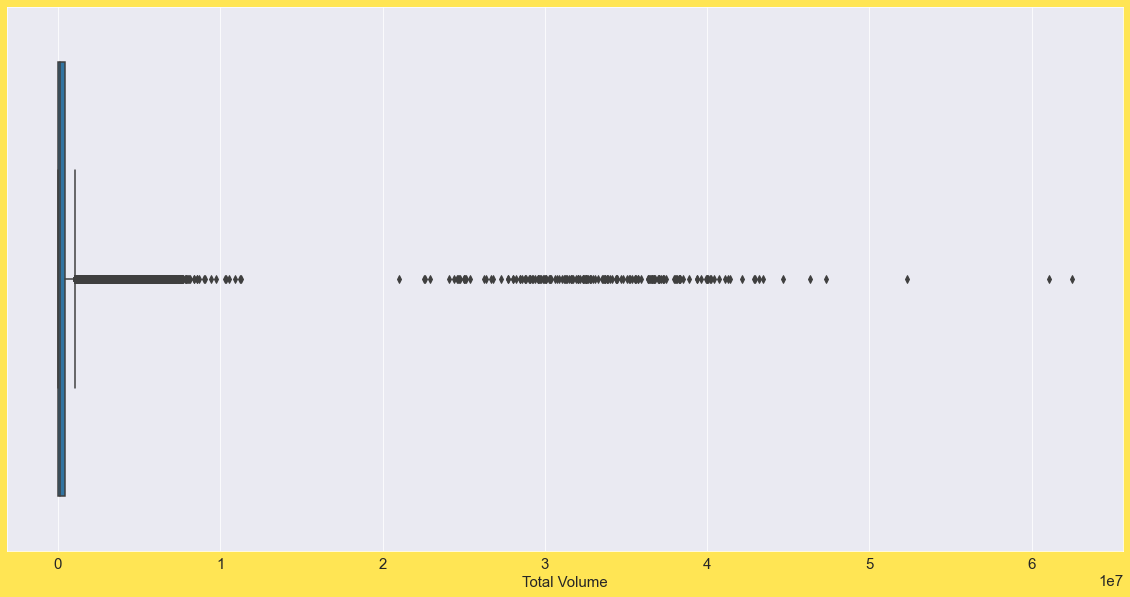

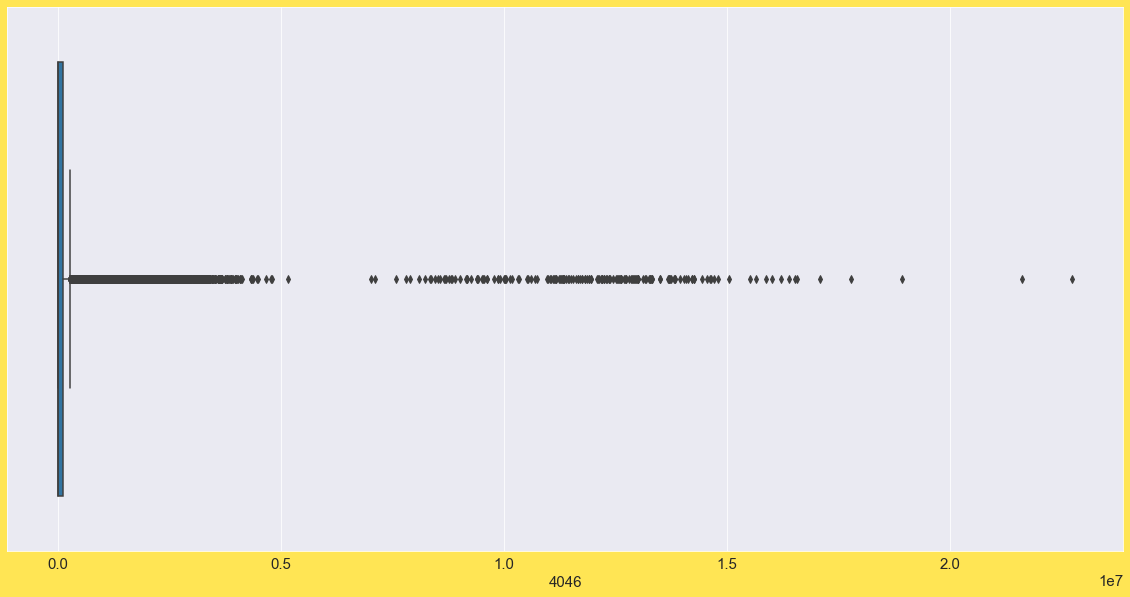

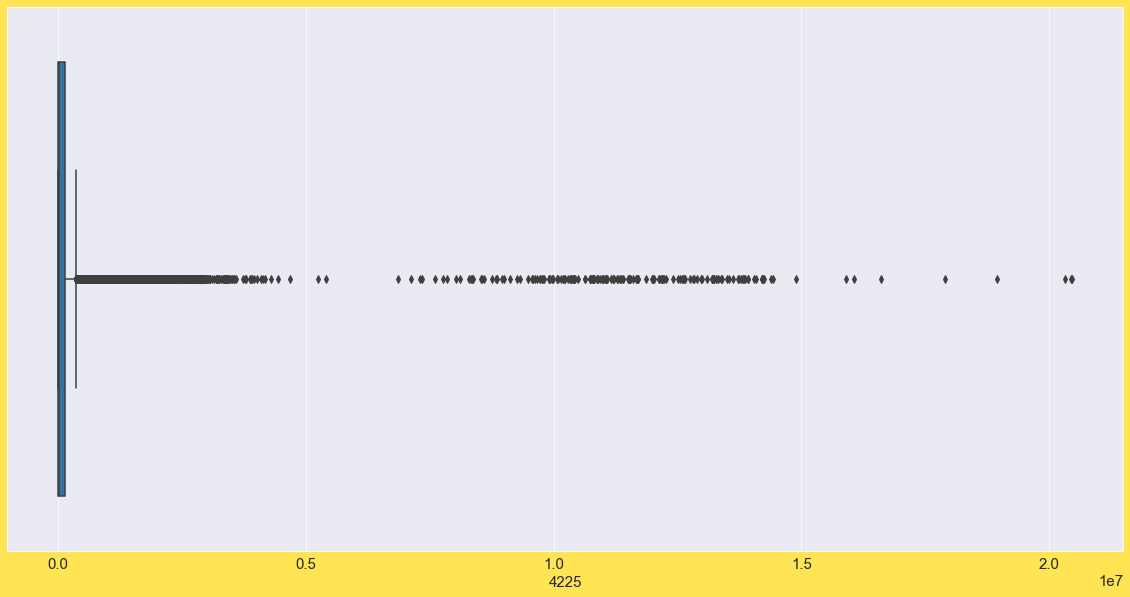

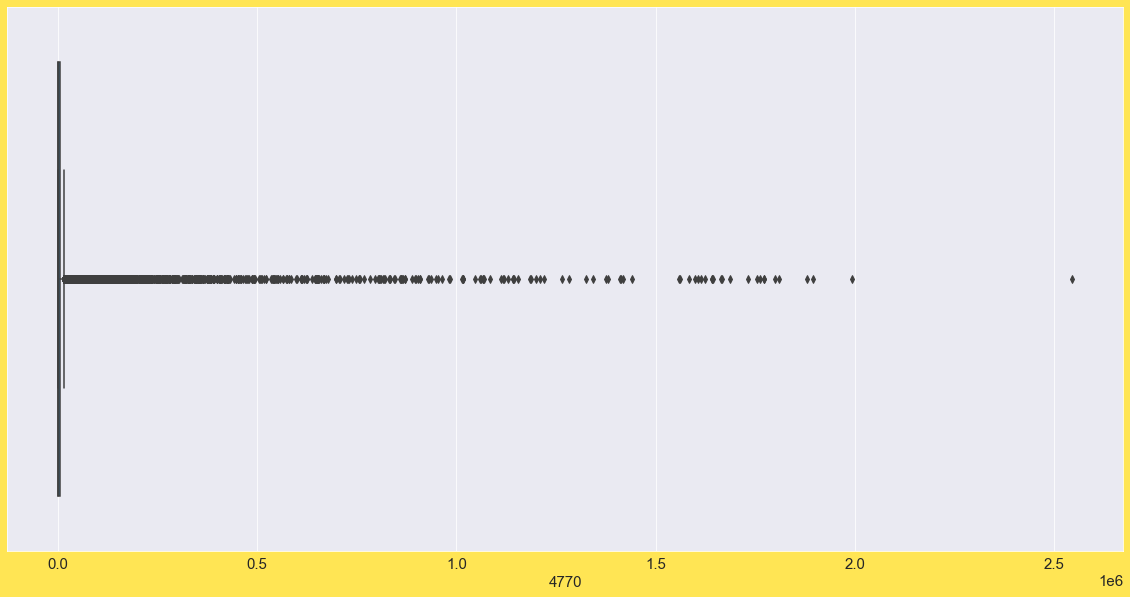

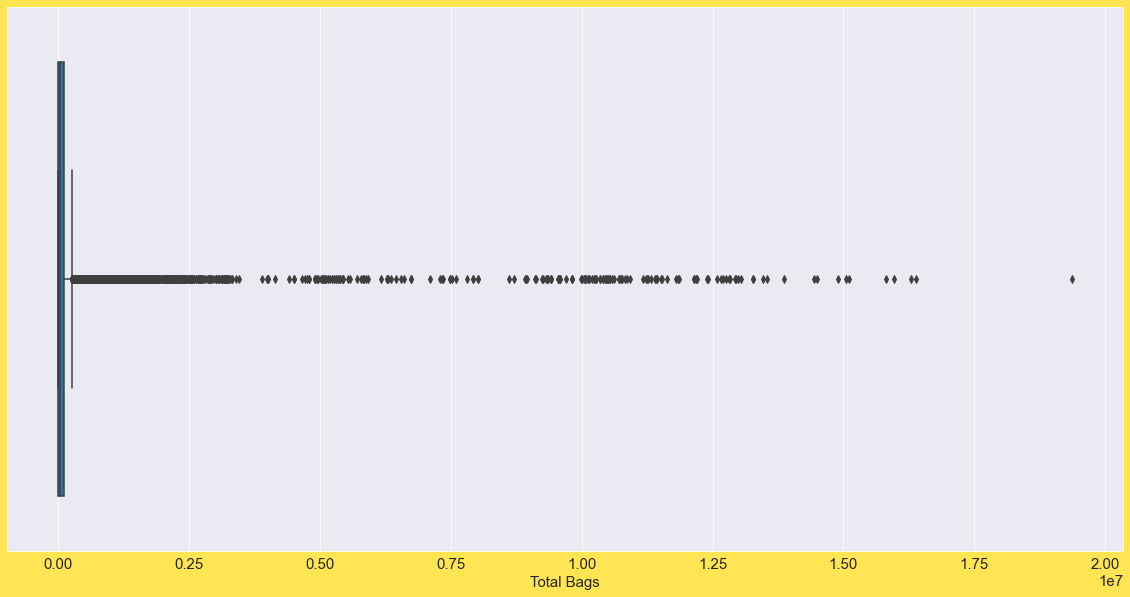

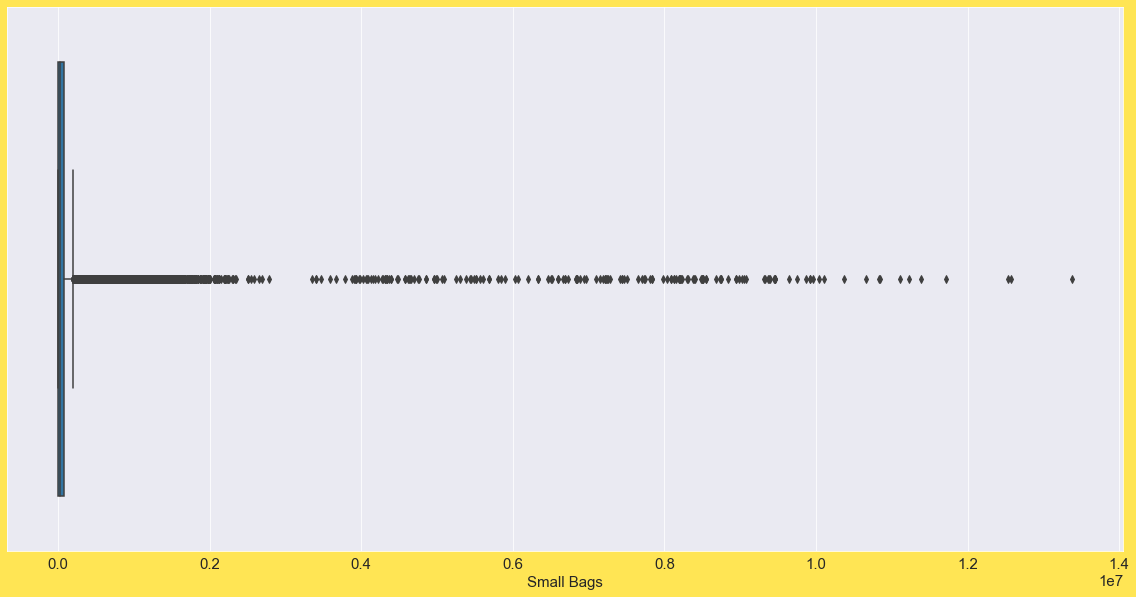

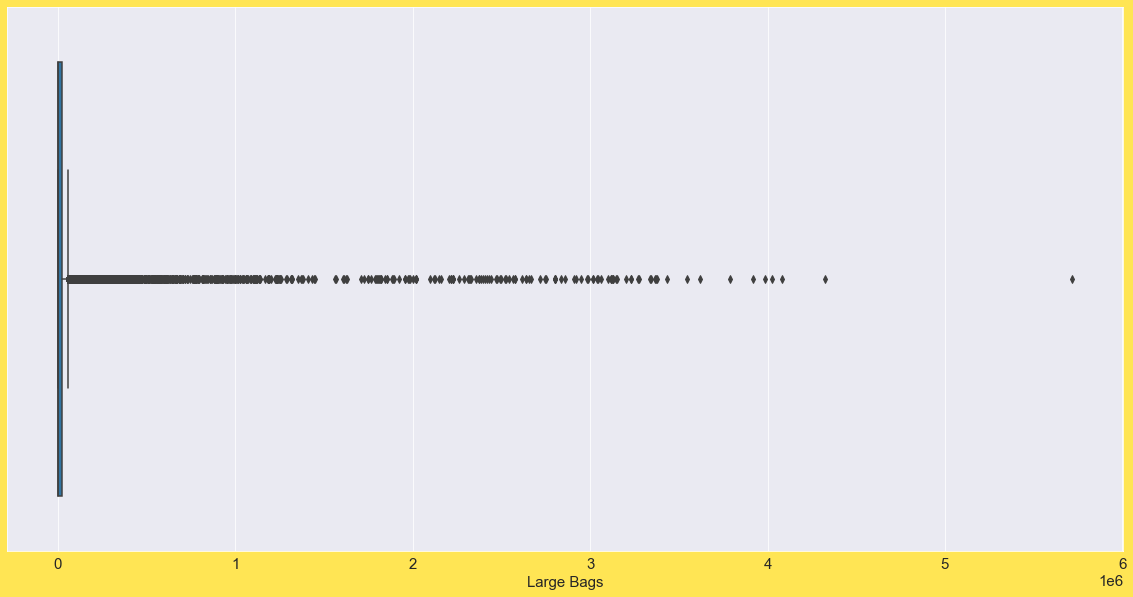

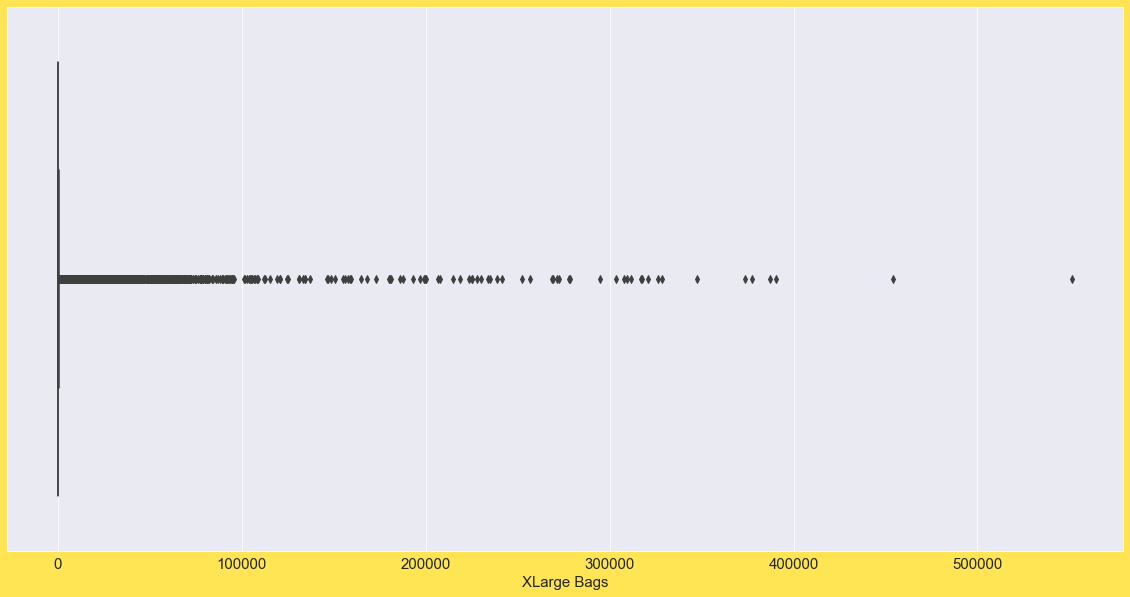

In [326]:
# visually checking the outliers
for i in cont_cols_p:
    plt.figure(figsize=(20,10))
    sns.boxplot(price_df[i])
    plt.show()
    
# We can see there are alot of outliers

In [297]:
# using zscore method to remove outliers

from scipy.stats import zscore

z = np.abs(zscore(price_df[cont_cols_p.columns]))

print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [327]:
price_new = price_df[(z<3).all(axis=1)]

In [328]:
print("shape before and after")
print("shape before: ",price_df.shape)
print("shape after: ",price_new.shape)
print("Percentage Loss: ", (price_df.shape[0]-price_new.shape[0])/price_df.shape[0]*100)

# We can see there is only 2.5 % data loss


shape before and after
shape before:  (18249, 14)
shape after:  (17782, 14)
Percentage Loss:  2.55904433119623


In [329]:
# On a safer note let's check the dataloss when IQR method is used for outlier removal
# finding out the quantile of data with continuous columns
Q1 = cont_cols_p.quantile(0.25)
Q3 = cont_cols_p.quantile(0.75)
IQR = Q3 - Q1

price_new_quant = price_df[~((cont_cols_p < (Q1 - 1.5 * IQR)) |(cont_cols_p > (Q3 + 1.5 * IQR))).any(axis=1)]

In [330]:
print("shape before and after")
print("shape before: ",price_df.shape)
print("shape after: ",price_new_quant.shape)
print("Percentage Loss: ",(price_df.shape[0]-price_new_quant.shape[0])/price_df.shape[0]*100)

# We can see that there is a 35% data loss if we use quantile IQR method


shape before and after
shape before:  (18249, 14)
shape after:  (11747, 14)
Percentage Loss:  35.62934955340019


In [331]:
# So we will choose the zscore method
price_new.head()

# Outliers has been removed from the data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  region  Month  Day  type_organic  
0     8603.62       93.25          0.0  2015       0     12   27             0  
1     9408.07       97.49          0.0  2015       0     12   20             0  
2     8042.21      103.14          0.0  2015       0     12   13             0  
3     5677.40      133.76          0.0  2015       0     12    6             0  
4     5986.26      197.69          0.0  2015       0     11   29             0

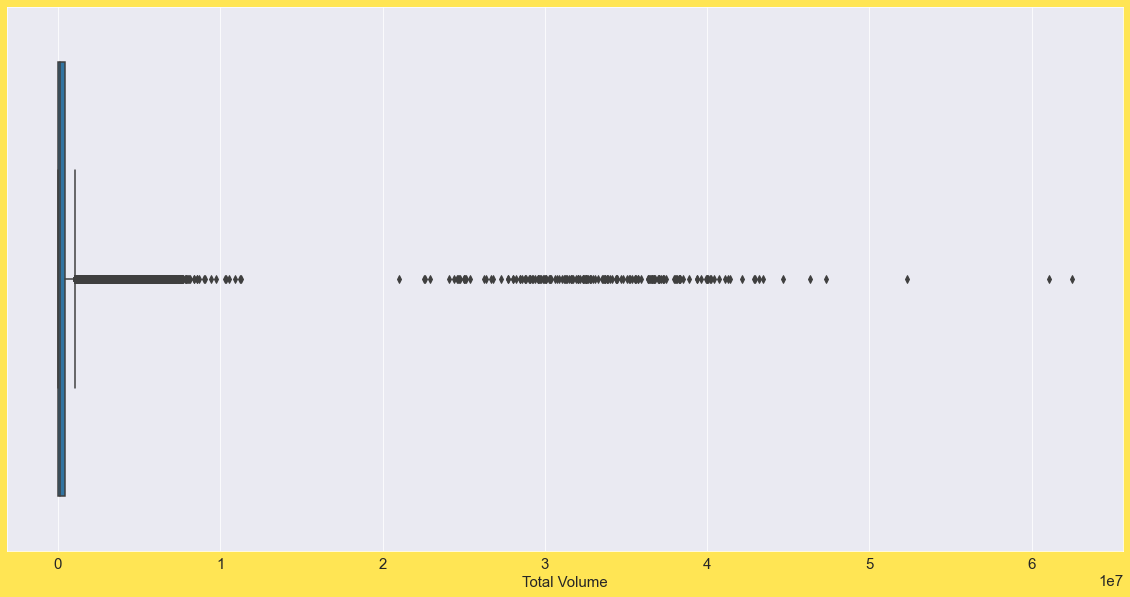

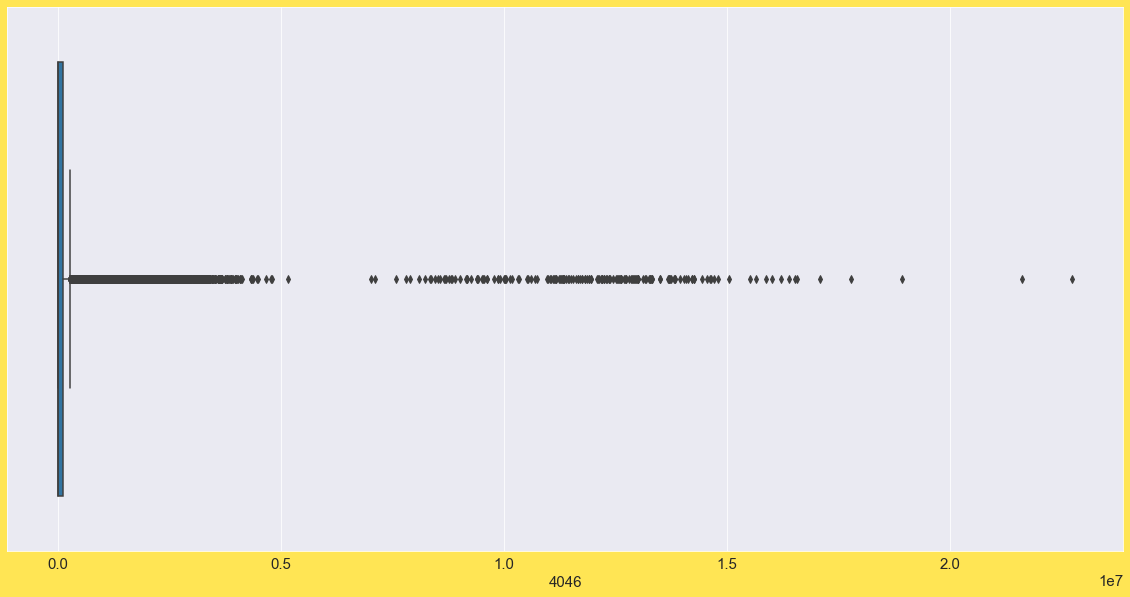

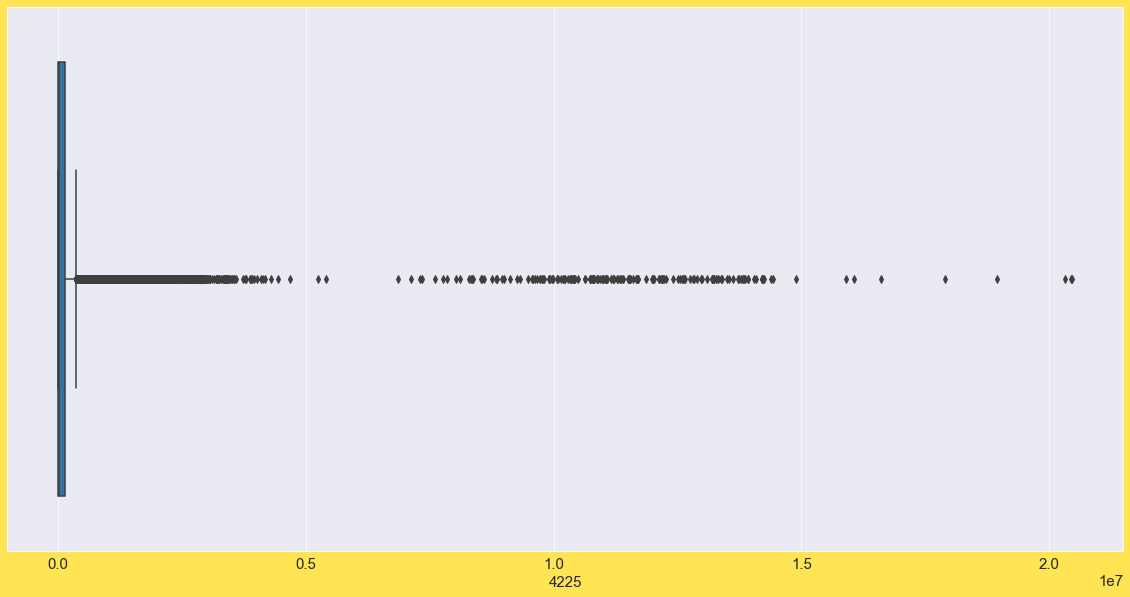

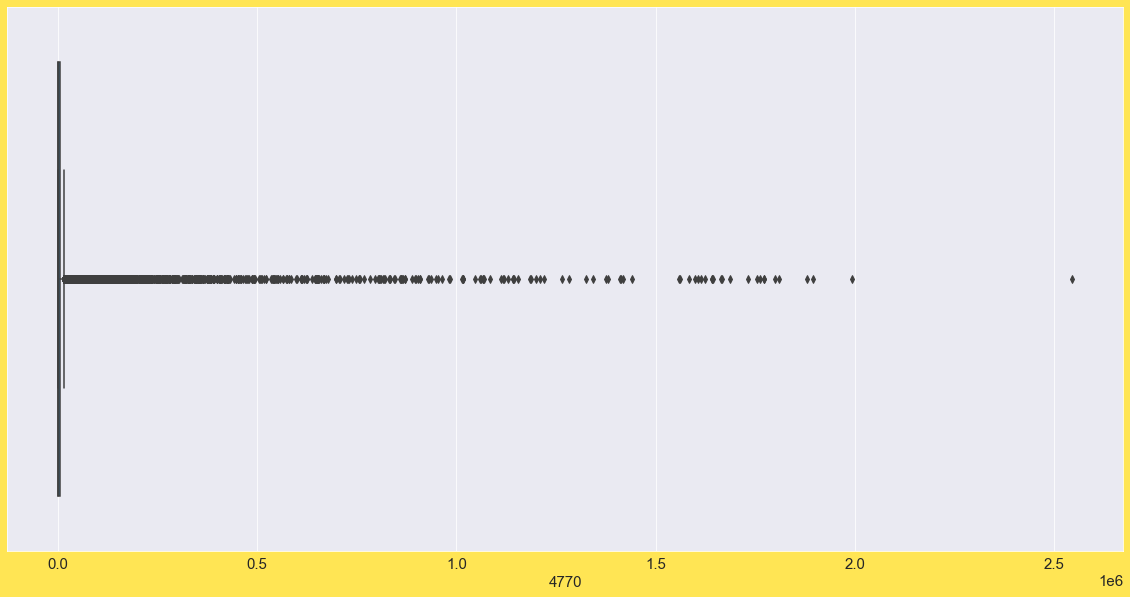

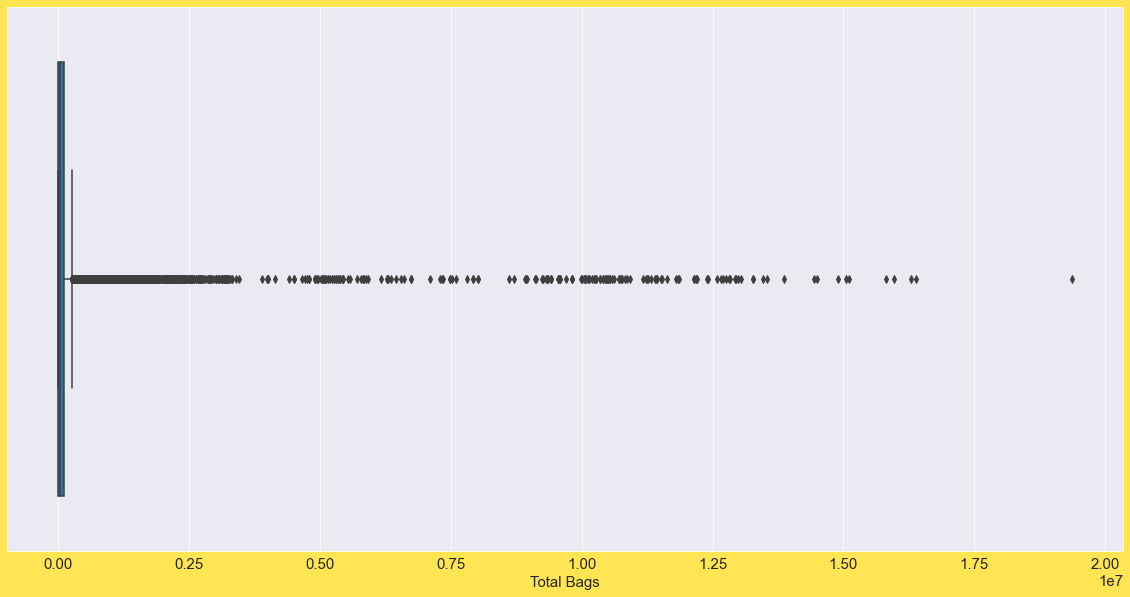

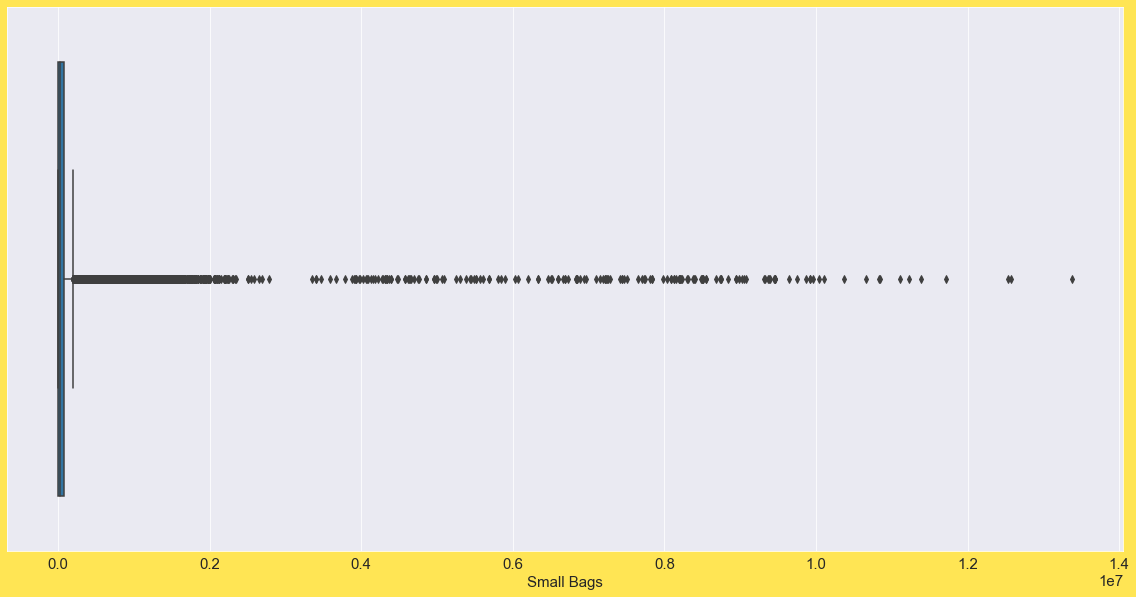

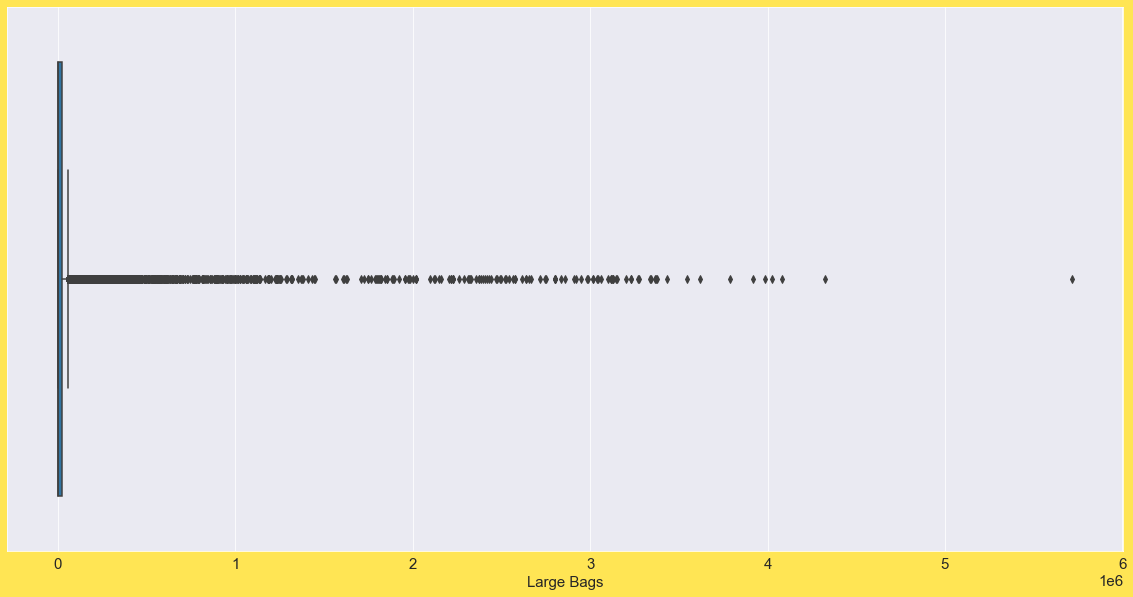

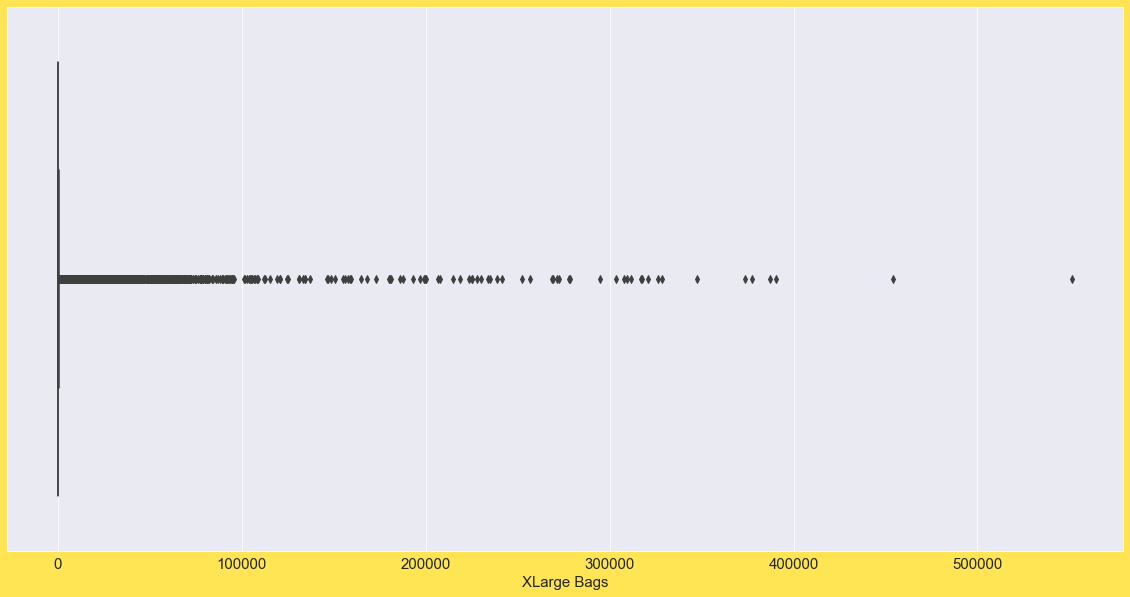

In [332]:
# checking the outliers again
for i in cont_cols_p:
    plt.figure(figsize=(20,10))
    sns.boxplot(price_df[i])
    plt.show()
    
# We can see most of the outliers have been removed, but continuous ones remained

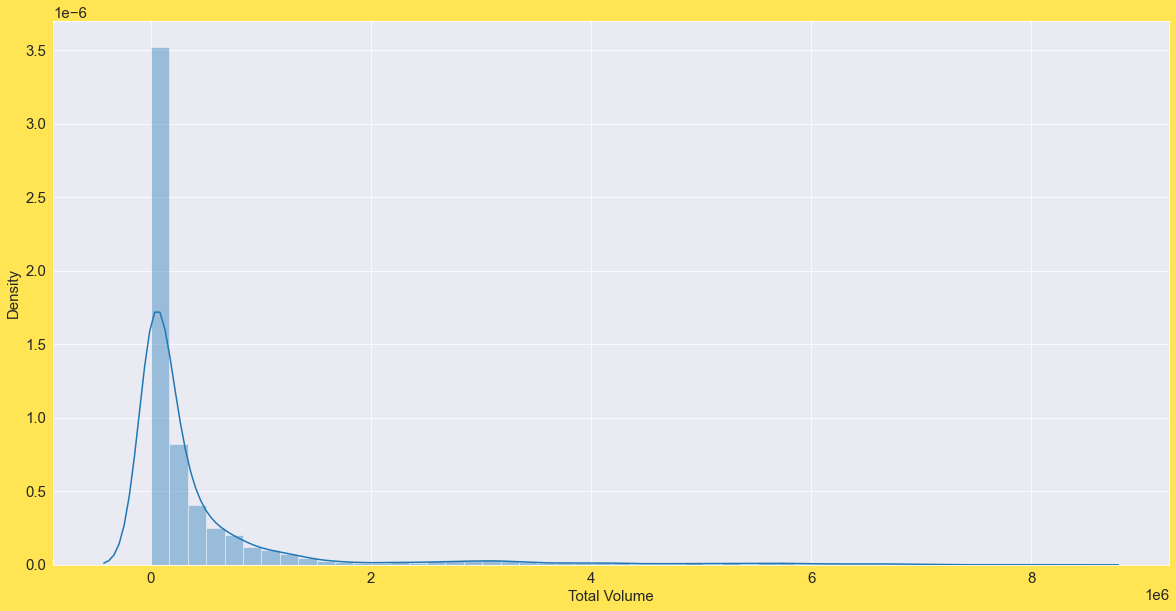

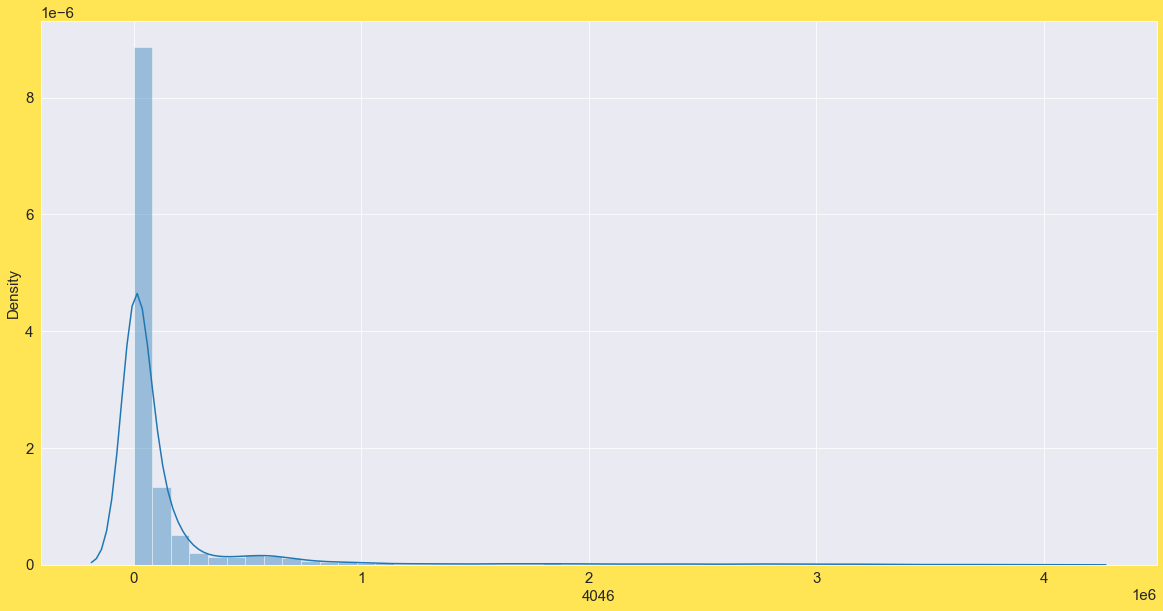

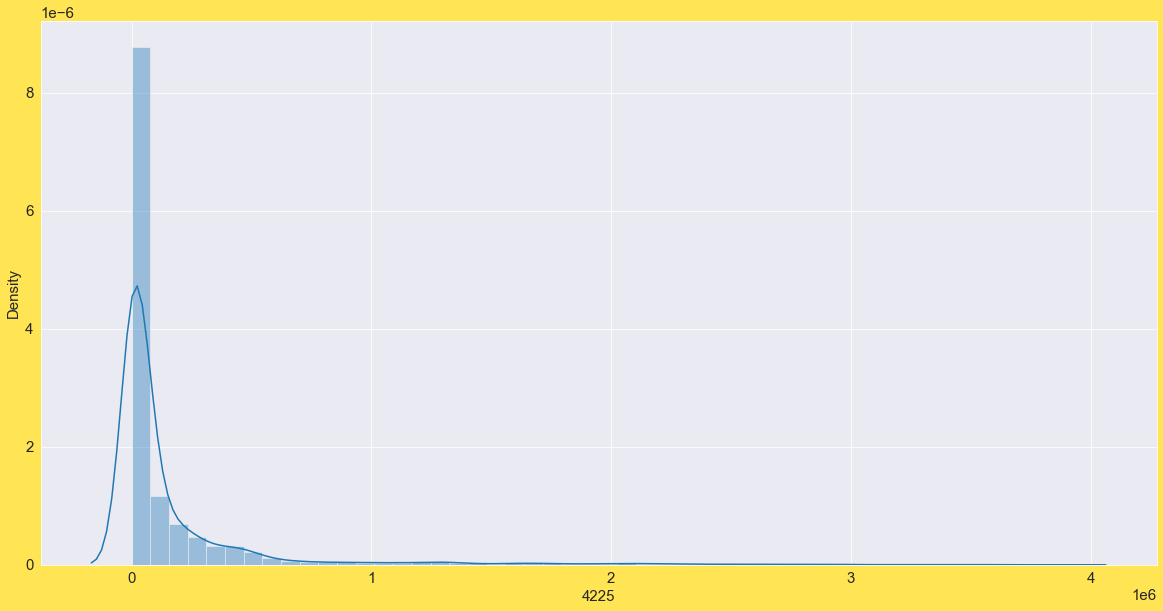

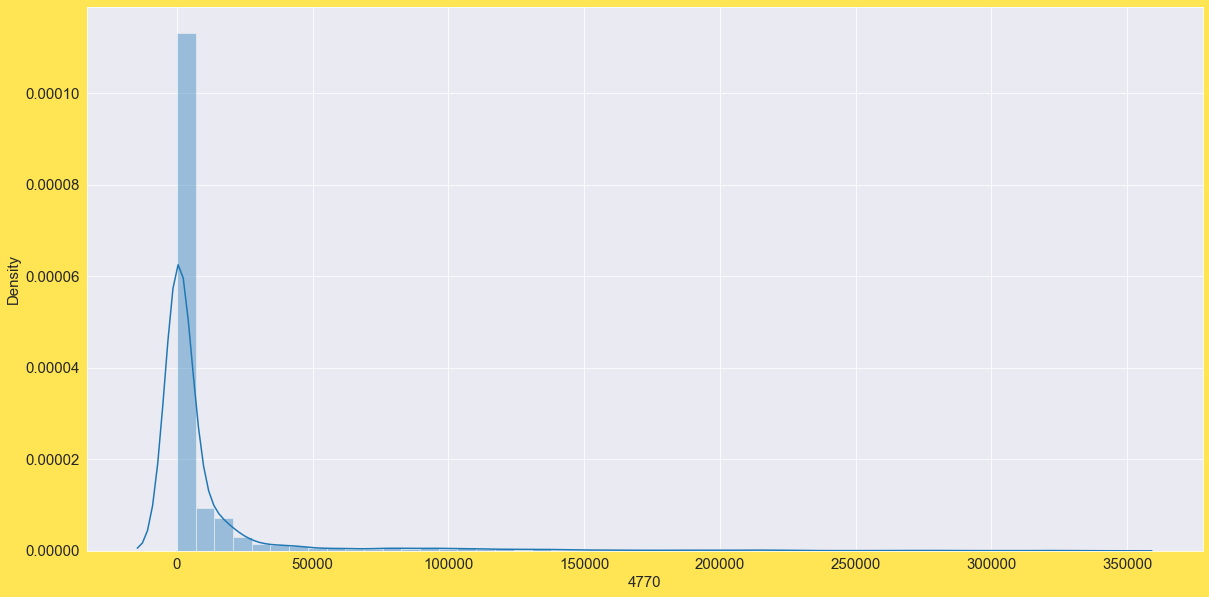

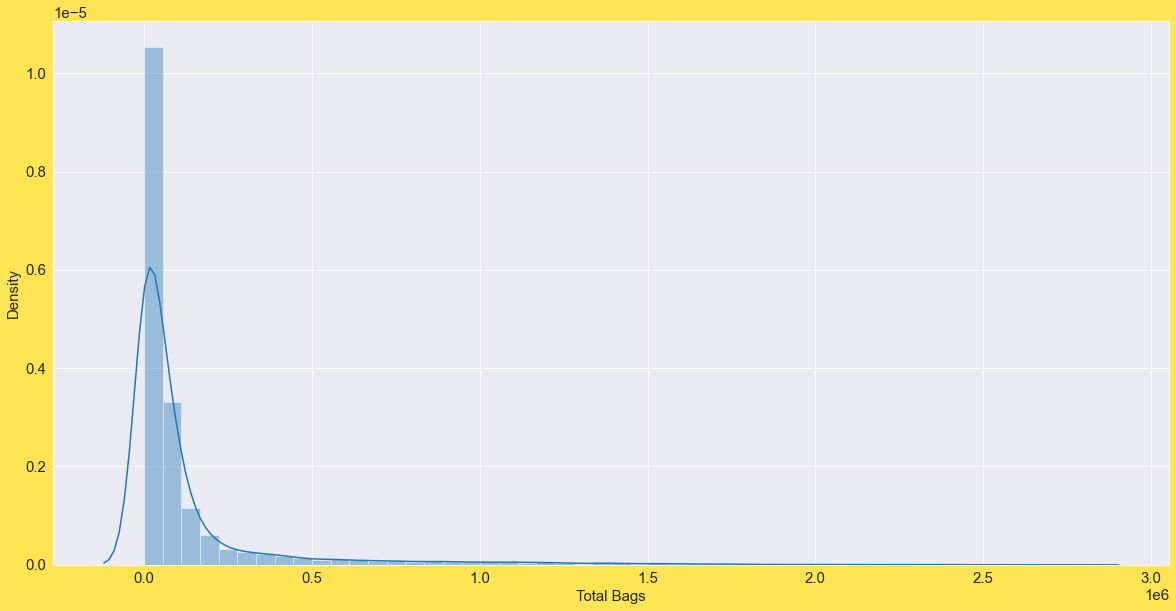

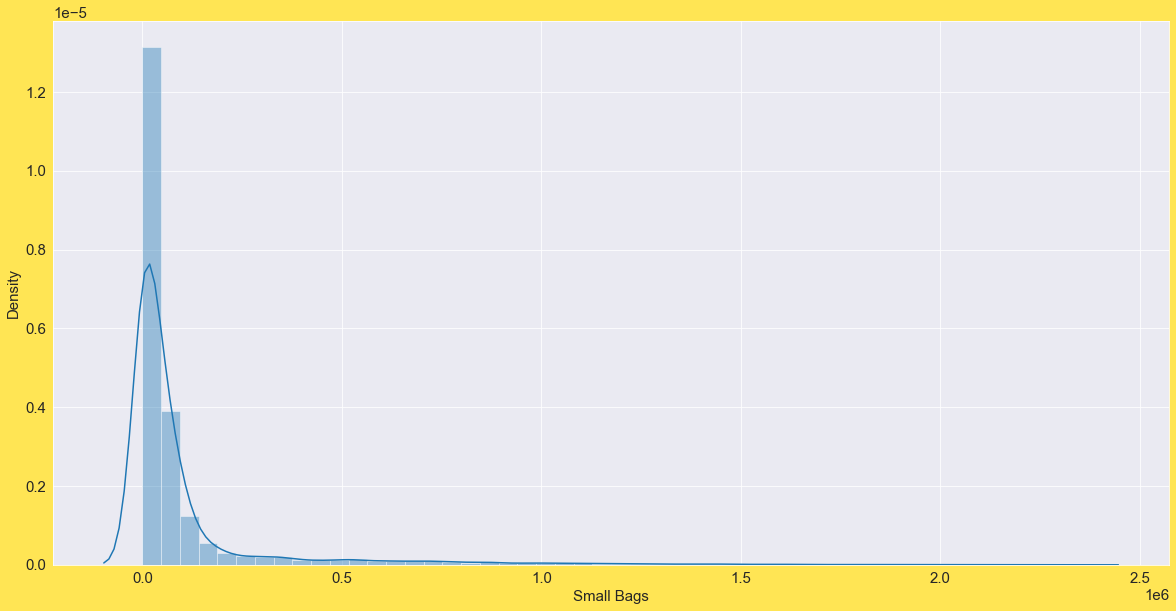

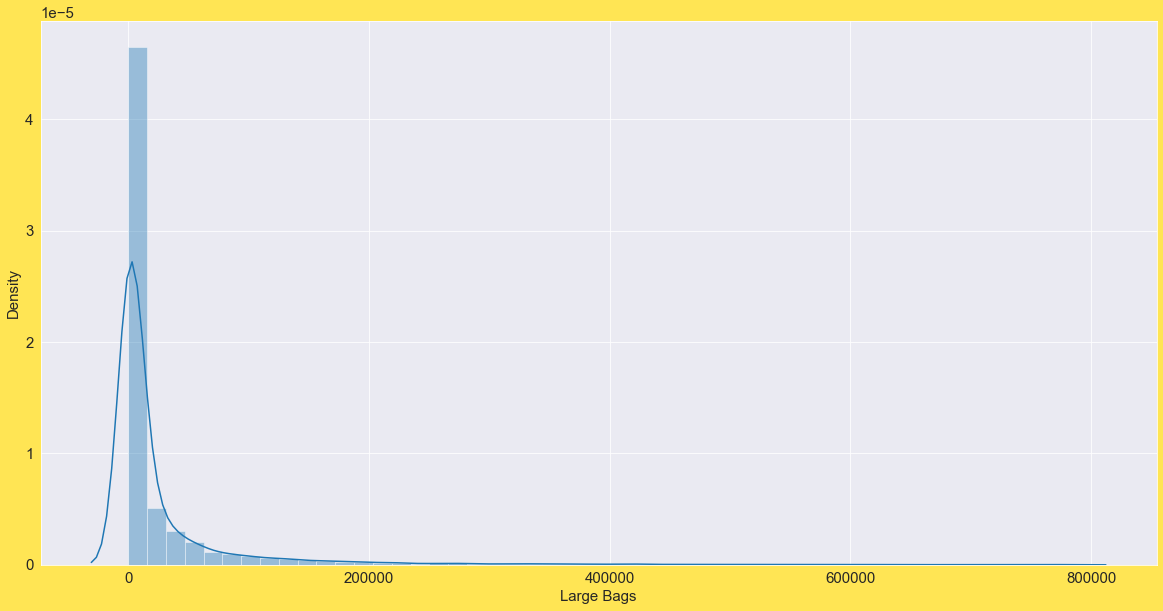

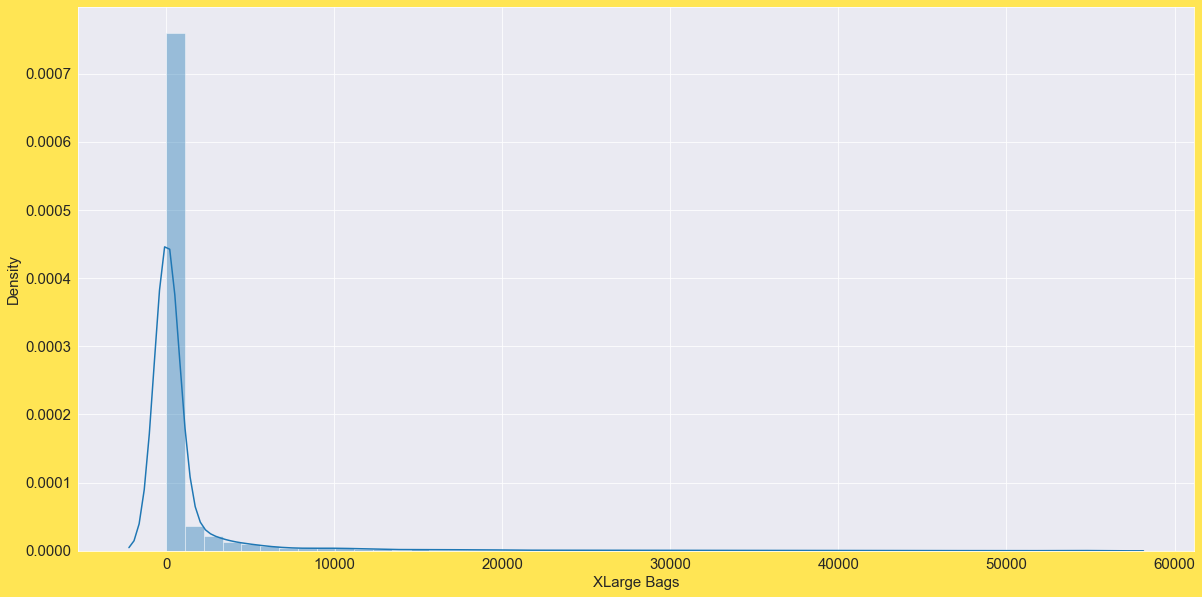

In [333]:
# Now checking skewness
for i in cont_cols_p.columns:
    plt.figure(figsize=(20,10))
    sns.distplot(price_new[i])
    plt.show()
    
# We can observe there is high amount of skewness present in the continuous columns

In [334]:
price_new.skew().sort_values()

# We can see numerically that there is high amount of skewness present in some of the columns

# Keeping the threshold of + 0.3 to -0.3

# We will remove skewness only in which are more than +-0.3 skewed

type_organic   -0.052210
region          0.005773
Day             0.011251
Month           0.098217
year            0.220792
AveragePrice    0.560969
Total Volume    3.782060
Total Bags      4.082103
Small Bags      4.238647
4225            4.472729
4046            4.928850
Large Bags      5.072468
4770            5.137120
XLarge Bags     6.159391
dtype: float64

In [335]:
# assigning the skewed columns to a variable
skewed_cols_p = ['Total Volume','Total Bags','Small Bags','4225','4046','Large Bags','4770','XLarge Bags']

In [336]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [337]:
#Removing skewness using yeo-johnson
price_new[skewed_cols_p] = pt.fit_transform(price_new[skewed_cols_p].values)

In [338]:
# checking skewness again
price_new.skew().sort_values()

# We can still see that there is skewness in XLarge Bags column which is exceeding the threshold

Large Bags     -0.110061
type_organic   -0.052210
4225           -0.043246
4046           -0.038259
Small Bags     -0.024657
Total Bags     -0.021531
Total Volume   -0.006809
region          0.005773
Day             0.011251
4770            0.028015
Month           0.098217
year            0.220792
AveragePrice    0.560969
XLarge Bags     0.860603
dtype: float64

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

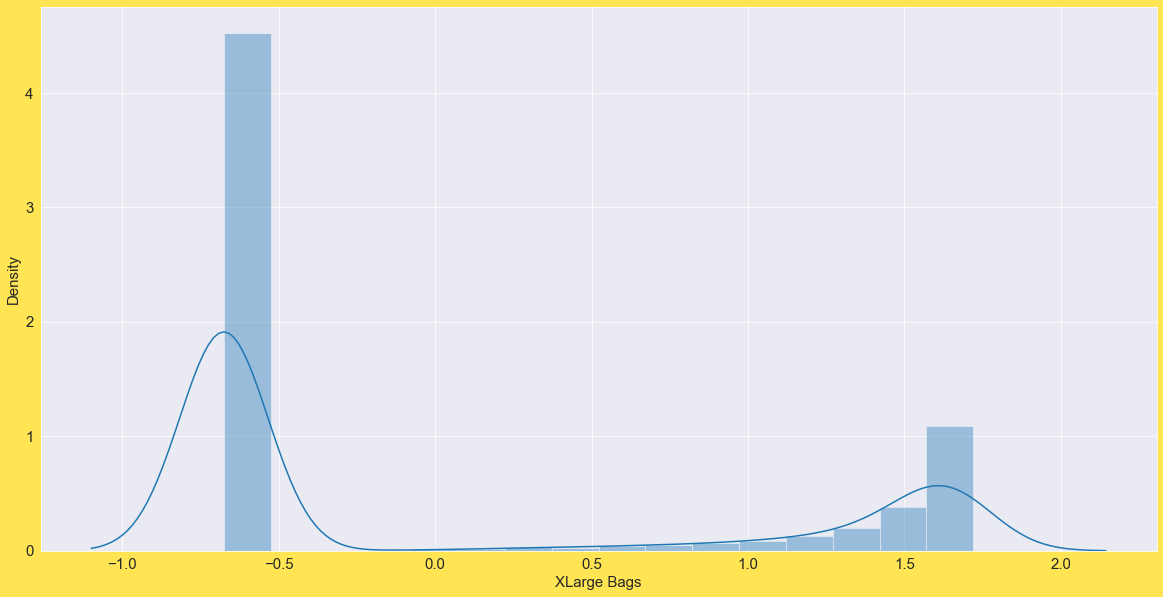

In [339]:
# checking XLarge skewness again
plt.figure(figsize=(20,10))
sns.distplot(price_new['XLarge Bags'])

In [340]:
# I have used sqrt, square, log, log1,log2 and boxcox method to remove the skewness from XLarge,they failed to reduce the skewness
# cbrt cuberoot method reduced it to the maximun
# we cannot reduce it further, this is the maximum
price_new['XLarge Bags'] = np.cbrt(price_new['XLarge Bags'])

In [341]:
price_new.skew().sort_values()
# We can see skewness is reduced to its minimum

Large Bags     -0.110061
type_organic   -0.052210
4225           -0.043246
4046           -0.038259
Small Bags     -0.024657
Total Bags     -0.021531
Total Volume   -0.006809
region          0.005773
Day             0.011251
4770            0.028015
Month           0.098217
year            0.220792
AveragePrice    0.560969
XLarge Bags     0.779510
dtype: float64

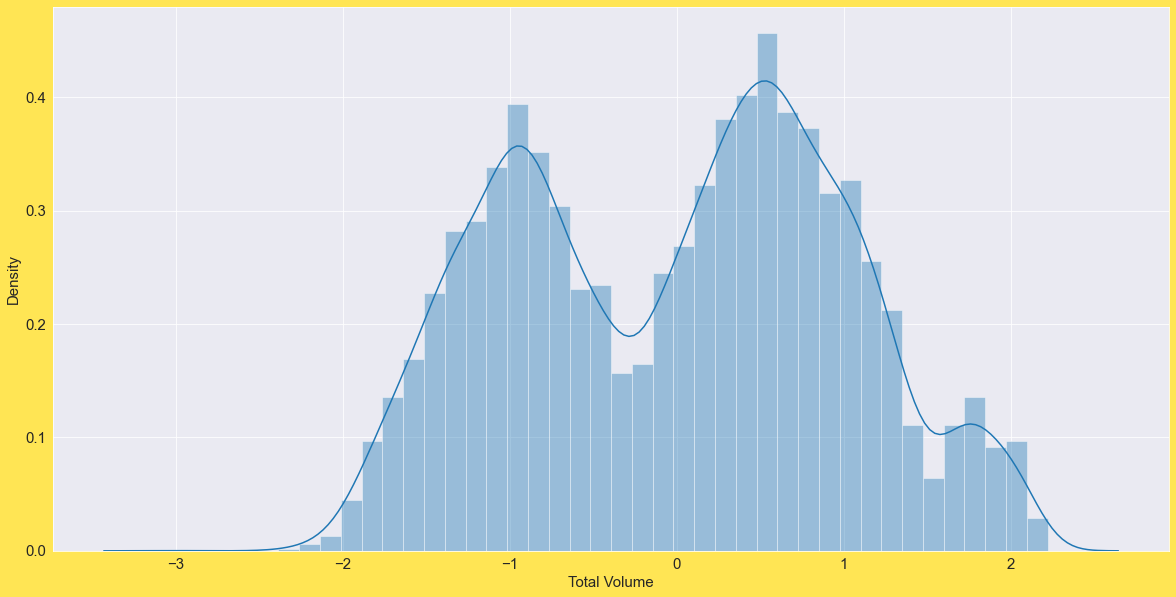

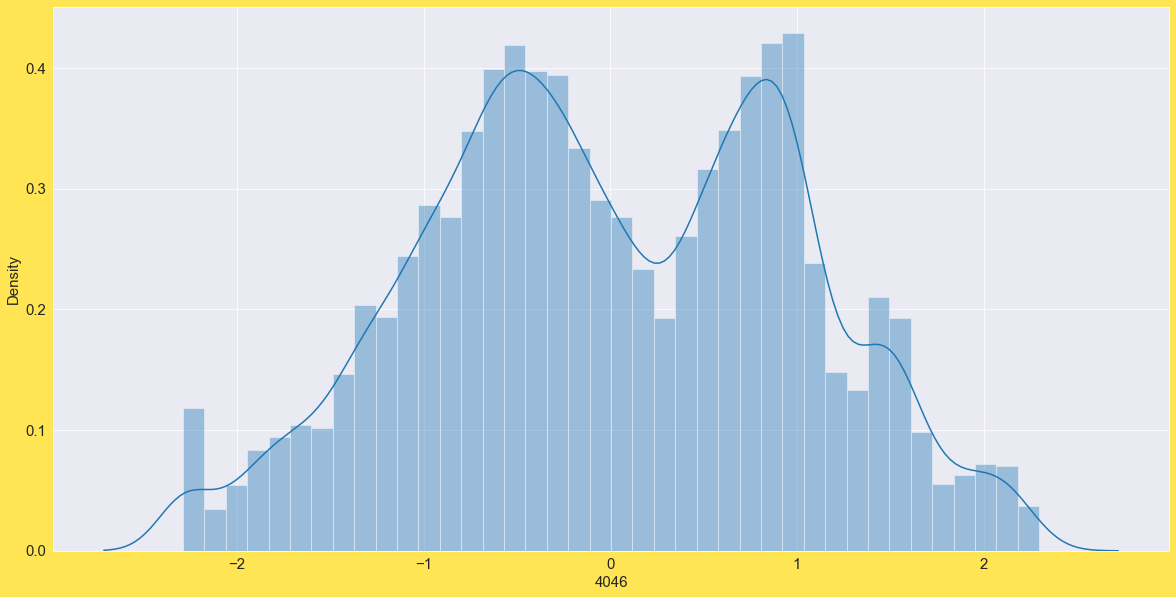

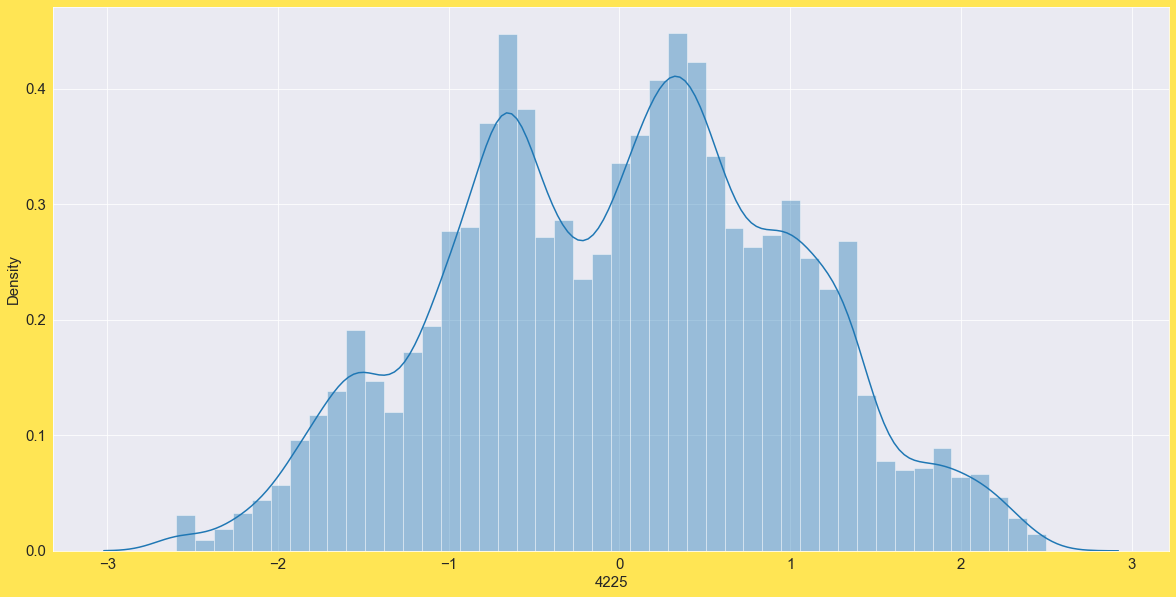

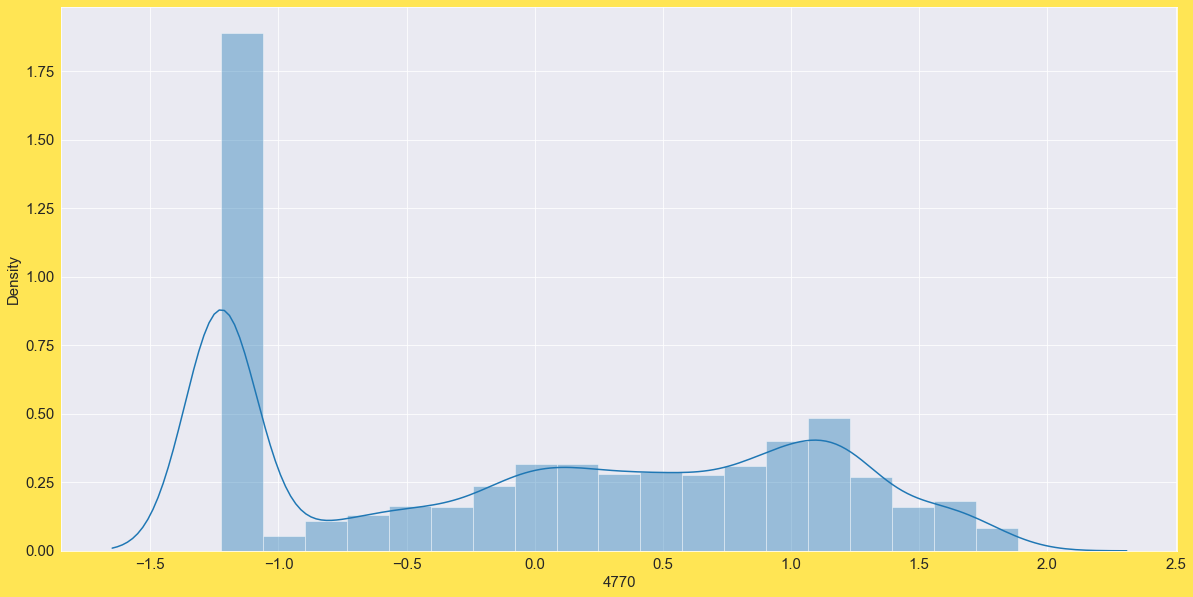

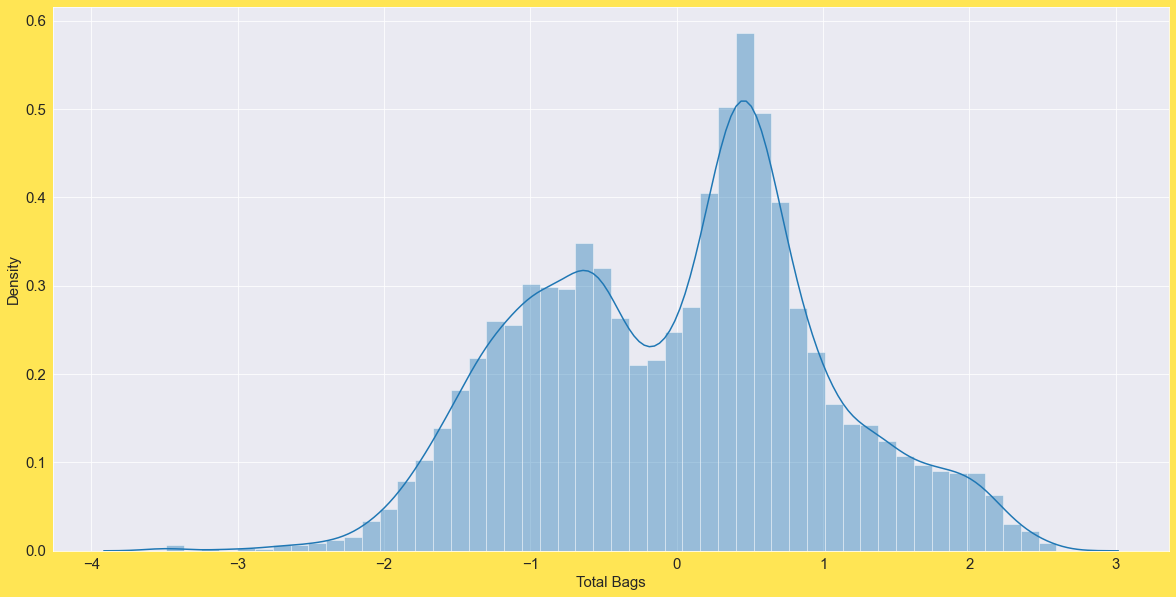

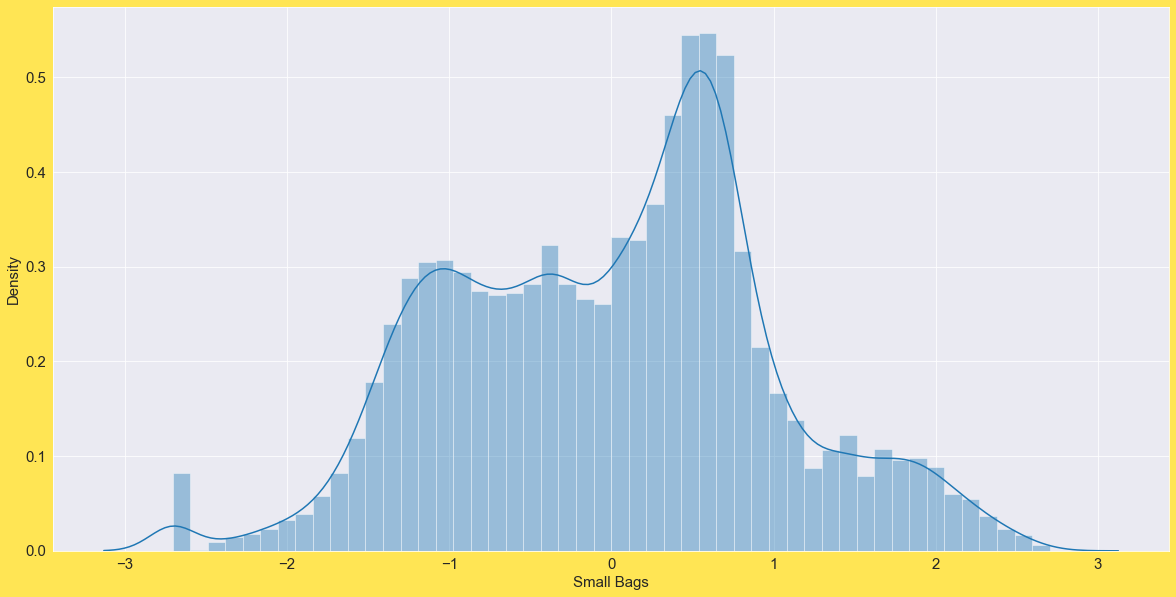

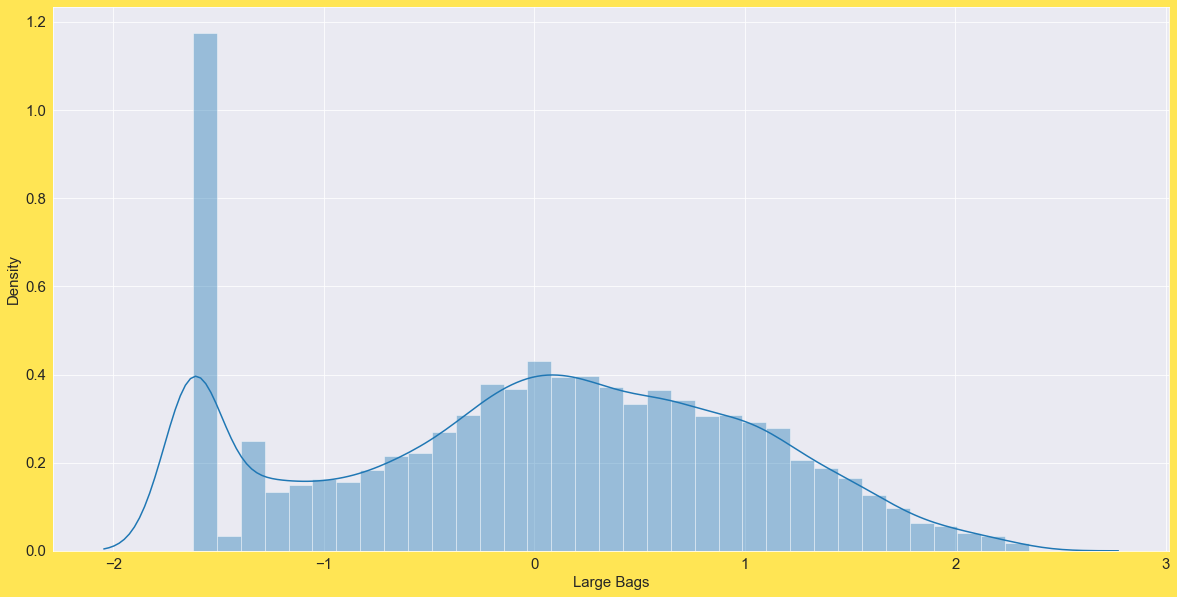

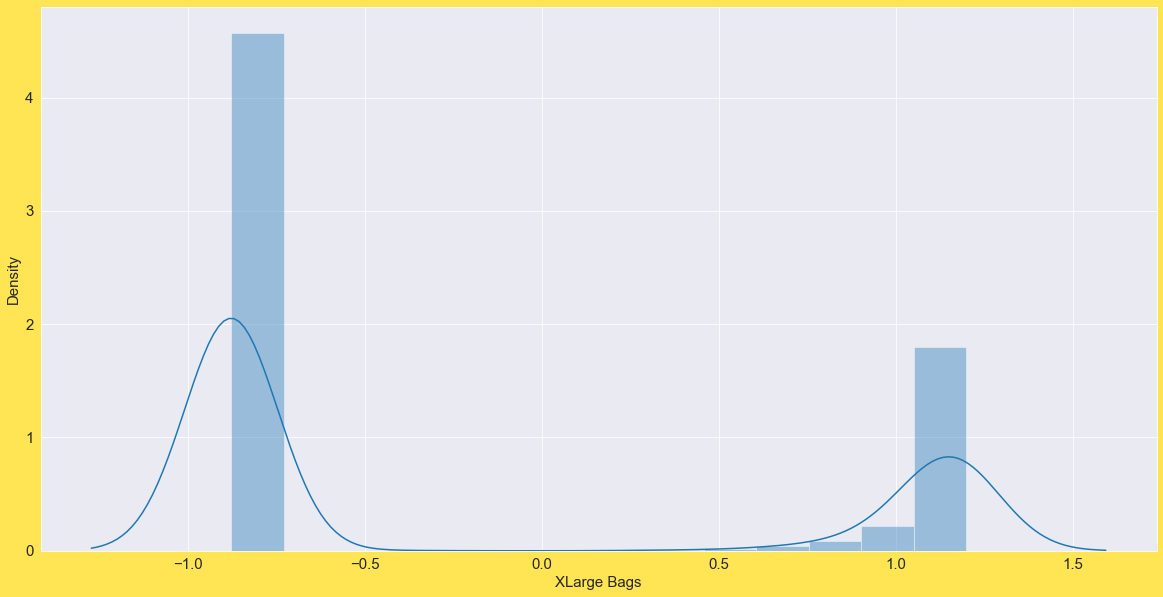

In [342]:
# checking the skewness again
for i in cont_cols_p.columns:
    plt.figure(figsize=(20,10))
    sns.distplot(price_new[i])
    plt.show()
 # We can see that the skewness is reduced   

### Correlation

In [343]:
price_new.corr().T

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392807      0.628226  0.574151  0.581432  0.615716   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   
type_organic      0.608447     -0.800828 -0.725826 -0.747722 -0.780988   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392807  0.099910   
Total Volume    0.939776    0.905098    0.681427     0.628226  0.076584   
4046            0.799354    0.778765    0.601899     0.574151 -0.002396   
4225            0.818511    0.784901    0.614878     0.581432 -0.004533   
4770            0.761641    0.754305    0.548457     0.615716 -0.051657   
Total Bags      1.000000    0.949901    0.729652     0.610500  0.210924   
Small Bags      0.949901    1.000000    0.566307     0.599339  0.185955   
Large Bags      0.729652    0.566307    1.000000     0.450004  0.190295   
XLarge Bags     0.610500    0.599339    0.450004     1.000000  0.153791   
year            0.210924    0.185955    0.190295     0.153791  1.000000   
region          0.065996    0.051985    0.086573    -0.016206 -0.003610   
Month          -0.014571   -0.010260   -0.016942     0.021398 -0.173166   
Day            -0.003703   -0.000535   -0.000876     0.011048  0.004044   
type_organic   -0.725686   -0.720466   -0.500026    -0.672645  0.007399   

                region     Month       Day  type_organic  
AveragePrice  0.010428  0.157900  0.024742      0.608447  
Total Volume  0.065709 -0.026332 -0.006248     -0.800828  
4046          0.159390 -0.025919 -0.004558     -0.725826  
4225          0.032273 -0.024708 -0.005919     -0.747722  
4770          0.037805 -0.017377  0.001383     -0.780988  
Total Bags    0.065996 -0.014571 -0.003703     -0.725686  
Small Bags    0.051985 -0.010260 -0.000535     -0.720466  
Large Bags    0.086573 -0.016942 -0.000876     -0.500026  
XLarge Bags  -0.016206  0.021398  0.011048     -0.672645  
year         -0.003610 -0.173166  0.004044      0.007399  
region        1.000000  0.002175  0.000751      0.021970  
Month         0.002175  1.000000  0.010456     -0.005044  
Day           0.000751  0.010456  1.000000     -0.002469  
type_organic  0.021970 -0.005044 -0.002469      1.000000

<AxesSubplot:>

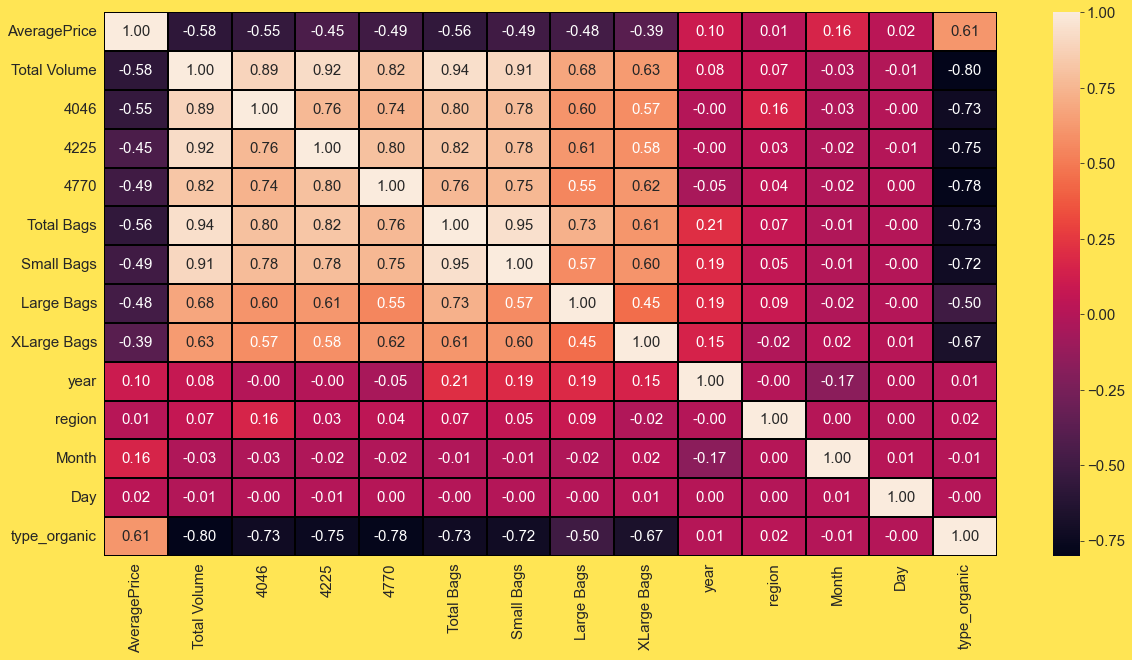

In [346]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(price_new.corr(),annot=True,linewidths=1.5,linecolor='black',fmt='.2f')


In [218]:
# We can Observe that:-

# Total Bags and Small Bags are highly correlated with each other.
# Total Volume and Small Bags are highly correlated with each other.
# Total Volume and Total Bags are highly correlated with each other.
# Total Volume and 4225 are highly correlated with each other.
# We can see negative correlation but not more than -0.8 so let it be.

In [347]:
price_new.corr()['AveragePrice'].sort_values()

Total Volume   -0.576829
Total Bags     -0.564616
4046           -0.548618
Small Bags     -0.493621
4770           -0.491320
Large Bags     -0.477879
4225           -0.448579
XLarge Bags    -0.392807
region          0.010428
Day             0.024742
year            0.099910
Month           0.157900
type_organic    0.608447
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

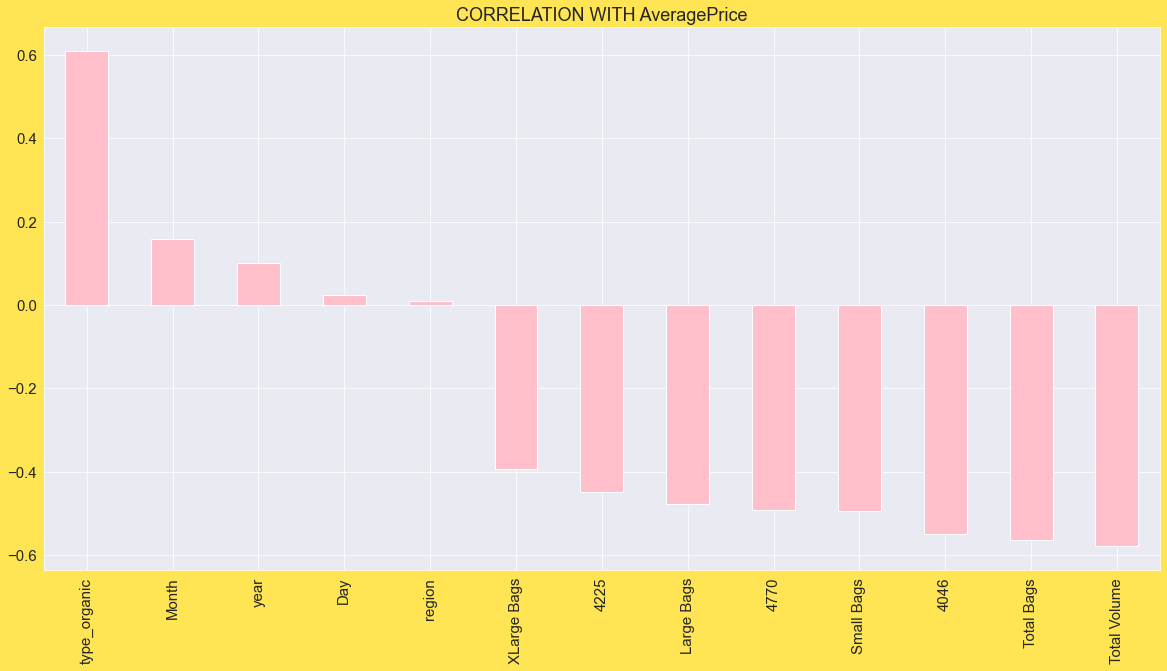

In [348]:
# plotting a barplot to see the correlation with respect to region as target
plt.figure(figsize=(20,10))
price_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='pink')
plt.title('CORRELATION WITH AveragePrice',fontsize=18)
plt.show()

# We can observe Day and region columns are least correlated with the target, so we will drop them

In [349]:
price_new.drop(['Day','region'],axis=1,inplace=True)

In [350]:
price_new.head()

# We can see the day and region columns have been dropped

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  year  Month  type_organic  
0   -0.337064   -0.775214    -0.877509  2015     12             0  
1   -0.301038   -0.765237    -0.877509  2015     12             0  
2   -0.364044   -0.752534    -0.877509  2015     12             0  
3   -0.500341   -0.693012    -0.877509  2015     12             0  
4   -0.479918   -0.600755    -0.877509  2015     11             0

In [351]:
# Seperating the data to x and y
x = price_new.drop(['AveragePrice'],axis=1)
y = price_new['AveragePrice']

In [352]:
x.shape

(17782, 11)

In [353]:
y.shape

(17782,)

In [354]:
# We have to check for multicollinearity
# Inorder to do that we have to scale the data first
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [355]:
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns) # transforming the data and converting it as a df, because sc gives us result in arrays

In [356]:
round(x.sum().mean(),1)# We can see after scaling our mean is almost 0

0.0

In [357]:
# performing vif to check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [358]:
def vif_calc():
    vif = pd.DataFrame()
    vif["vif_Features"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"] = x.columns
    print(vif)

In [359]:
vif_calc()

    vif_Features      Features
0      51.791619  Total Volume
1       6.807538          4046
2      11.154820          4225
3       3.950143          4770
4      34.440522    Total Bags
5      16.629491    Small Bags
6       3.462270    Large Bags
7       2.057904   XLarge Bags
8       1.384576          year
9       1.053980         Month
10      3.726395  type_organic


In [360]:
# We can see total volume and total bags have more vif score we need to drop both of them
x.drop(['Total Volume'],axis=1,inplace=True)

In [361]:
# checking vif again
vif_calc()

# We have to drop Total Bags as well 

   vif_Features      Features
0      3.546250          4046
1      4.272083          4225
2      3.934776          4770
3     24.479452    Total Bags
4     16.629302    Small Bags
5      3.419050    Large Bags
6      2.046893   XLarge Bags
7      1.381975          year
8      1.051798         Month
9      3.494443  type_organic


In [362]:
x.drop(['Total Bags'],axis=1,inplace=True)

In [363]:
# checking vif again
vif_calc()

# Now multicollinearity is resolved

   vif_Features      Features
0      3.527278          4046
1      4.127579          4225
2      3.934512          4770
3      4.098130    Small Bags
4      1.864132    Large Bags
5      2.046687   XLarge Bags
6      1.357577          year
7      1.051167         Month
8      3.491343  type_organic


## Model Building

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [267]:
lr = LinearRegression()

dtr = DecisionTreeRegressor()

knr = KNeighborsRegressor()

svr = SVR()

sgdr = SGDRegressor()

xgbr = XGBRegressor()

rfr = RandomForestRegressor()

abr = AdaBoostRegressor()

gbr = GradientBoostingRegressor()

In [256]:
# CHECKING THE RANDOM STATE FOR LINEAR REGRESSION
lr = LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')

At random state 231 The model performs very well
At random state:- 231
Training r2 score is  50.7
Testing r2 score is  50.7 


At random state 248 The model performs very well
At random state:- 248
Training r2 score is  50.7
Testing r2 score is  50.7 


At random state 251 The model performs very well
At random state:- 251
Training r2 score is  50.7
Testing r2 score is  50.7 


At random state 384 The model performs very well
At random state:- 384
Training r2 score is  50.7
Testing r2 score is  50.7 


At random state 431 The model performs very well
At random state:- 431
Training r2 score is  50.6
Testing r2 score is  50.6 


At random state 476 The model performs very well
At random state:- 476
Training r2 score is  50.6
Testing r2 score is  50.6 


At random state 489 The model performs very well
At random state:- 489
Training r2 score is  50.7
Testing r2 score is  50.7 




In [257]:
# selecting 489 as best random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=489)

In [259]:
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
print('Accuracy Score:-',r2_score(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lr)))

# Getting 50% accuracy with Linear Regression

Accuracy Score:- 0.5082298884600084
Mean Squared Error:- 0.07900743519694019
Mean Absolute Error:- 0.217924895225657
Root Mean Squared Error 0.2810826127616936


In [260]:
# Cross Validating linear regression
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [270]:
for i in range(25,30):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')
    
    # Linear Regression model is not working well

[-0.53674742 -0.72115674 -1.28983434  0.1457195   0.2659448   0.38400879
  0.10601013  0.43417233  0.27218887 -0.14712848  0.1187626   0.18869531
  0.38160354  0.19539052 -0.24600811  0.21855565  0.08000738  0.18659065
  0.09462128  0.3705972   0.19698091  0.21299632  0.10887325  0.13676831
 -0.26667264]
At cv:-  25
Cross validation score is:-  3.5637583965759863
r2_score is:-  50.82298884600084


[-0.50684031 -0.72823467 -1.13462503 -0.18887272  0.31466437  0.38764244
  0.16920306  0.34723733  0.18142811  0.11113408 -0.01139321  0.11405632
  0.58662574  0.20076592  0.04705683  0.14911987  0.05696857 -0.03932511
  0.20119847  0.22359748  0.2828519   0.19622392  0.21867339  0.11200697
  0.13007538 -0.38057546]
At cv:-  26
Cross validation score is:-  4.002552387028971
r2_score is:-  50.82298884600084


[-0.47979574 -0.72703722 -0.97093344 -0.6913865   0.364788    0.35189917
  0.23477205  0.10389279  0.37190302  0.22762615 -0.19437913  0.09202947
  0.18019846  0.37061563  0.23940369 -0.4

In [ ]:
# selecting best cv
lrcscore_selected = cross_val_score(lr,x,y,cv=23).mean()
print('The cv score of LogisticRegression is ',lrcscore_selected,'\nThe accuracy score of LogisticRegression is: ',lrs)


### KNN REGRESSSOR

In [276]:
param_grid_knr = {'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree','kd_tree','brute'],'leaf_size':[25,30,35,40]}

In [277]:
knr_search = GridSearchCV(knr,param_grid=param_grid_knr)

In [269]:
knr_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [271]:
print(knr_search.best_score_)
print(knr_search.best_estimator_)
print(knr_search.best_params_)

0.8640028918888308
KNeighborsRegressor(algorithm='brute', leaf_size=25, n_neighbors=4,
                    weights='distance')
{'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}


In [272]:
# running the model with bestparams
knr = KNeighborsRegressor(algorithm='brute',leaf_size=25,n_neighbors=4,weights='distance')# using the best parameters
knr.fit(x_train,y_train)
pred_knr_test= knr.predict(x_test)
pred_knr_train = knr.predict(x_train)
print('Training score of knr',r2_score(pred_knr_train,y_train))
print('Accuracy Score of knr',r2_score(pred_knr_test,y_test))
print('Mean Squared Error of knr',mean_squared_error(pred_knr_test,y_test))
print('Mean Absolute Error of knr',mean_absolute_error(pred_knr_test,y_test))
print('Root Mean Squared Error of knr',np.sqrt(mean_squared_error(pred_knr_test,y_test)))
print('\n')


# We are getting 86% accuracy with KNeighborsR

Training score of knr 0.9999999999999918
Accuracy Score of knr 0.869320349756962
Mean Squared Error of knr 0.018491242376474648
Mean Absolute Error of knr 0.09353351524301844
Root Mean Squared Error of knr 0.13598250761209932




In [273]:
# checking the Cross Validation score
from sklearn.model_selection import cross_val_score
knra = r2_score(y_test,pred_knr_test)

In [275]:
for i in range(50,100):
    knrscore = cross_val_score(knr,x,y,cv=i)
    print(knrscore)
    knrc = knrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',knrc*100)
    print('r2_score is:- ',knra*100)
    print('\n') 

[ 0.17157465 -0.04677723  0.34185469 -0.33485445  0.229413   -1.69389788
 -0.17567698  0.65462474  0.47847694  0.40789152  0.32304386  0.46113615
  0.47728604  0.43970505  0.46499968  0.518045    0.31117944  0.51506453
  0.28785173  0.49819543  0.0234724   0.22308507  0.43360081  0.08366251
  0.33295392  0.23639888  0.30473929  0.51744211 -0.20449117  0.16989407
  0.30202301  0.15318762  0.22759388  0.2110787   0.31049211  0.35258026
  0.30434245  0.37960366  0.42402343  0.2150624   0.40848495  0.61764096
  0.48596192  0.30206731  0.37252513  0.39502931  0.42048993  0.4671687
  0.1994036  -0.74323466]
At cv:-  50
Cross validation score is:-  24.510836955598297
r2_score is:-  88.4903992854281


[ 0.21779551 -0.03777701  0.3507774  -0.12569707  0.19793747 -0.93714228
 -0.21561035  0.59639627  0.51381658  0.42493606  0.44020214  0.44108749
  0.52216839  0.44149337  0.42702201  0.58830042  0.32537372  0.2531429
  0.4693694   0.16028201  0.49572253  0.30479931  0.30027148  0.18653626
  0.63

In [288]:
# selecting best cv 590
knrscore_selected = cross_val_score(knr,x,y,cv=605).mean()
print('The cv score of KNeighborsRegressor is ',knrscore_selected,'\nThe accuracy score of KNeighborsRegressor is: ',knra)

# We are getting cv score and accuracy almost same so our model is working well

The cv score of KNeighborsRegressor is  -0.8568688198265403 
The accuracy score of KNeighborsRegressor is:  0.884903992854281


### DecisionTreeRegressor

In [278]:
# creating parameter grid for dtr
param_grid_dtr = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
             'splitter':["best", "random"],'max_depth':[2,8,10,None],'max_features':[0.25,0.5,1.0],'min_samples_split':[0.25,0.5,1.0]}

In [279]:
dtr_search = GridSearchCV(dtr,param_grid=param_grid_dtr)

In [280]:
dtr_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0],
                         'splitter': ['best', 'random']})

In [281]:
print(dtr_search.best_score_)
print(dtr_search.best_estimator_)
print(dtr_search.best_params_)

# getting the bestparams

0.46482319197913624
DecisionTreeRegressor(max_depth=10, max_features=1.0, min_samples_split=0.25)
{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'min_samples_split': 0.25, 'splitter': 'best'}


In [282]:
# Running the model with bestparams
dtr = DecisionTreeRegressor(criterion='squared_error',max_depth=10,max_features=1.0,min_samples_split=0.25,splitter='best') # using the best parameters
dtr.fit(x_train,y_train)
pred_dtr_test= dtr.predict(x_test)
pred_dtr_train = dtr.predict(x_train)
print('Training score of dtr',r2_score(pred_dtr_train,y_train))
print('Accuracy Score of dtr',r2_score(pred_dtr_test,y_test))
print('Mean Squared Error of dtr',mean_squared_error(pred_dtr_test,y_test))
print('Mean Absolute Error of dtr',mean_absolute_error(pred_dtr_test,y_test))
print('Root Mean Squared Error of dtr',np.sqrt(mean_squared_error(pred_dtr_test,y_test)))
print('\n')

# getting least score from decisiontreeregressor

Training score of dtr -0.1317170612029075
Accuracy Score of dtr -0.15169210623089824
Mean Squared Error of dtr 0.0878911539258329
Mean Absolute Error of dtr 0.227782554092526
Root Mean Squared Error of dtr 0.29646442269829426




In [364]:
# checking the cv score for dtr
from sklearn.model_selection import cross_val_score
dtra = r2_score(y_test,pred_dtr_test)

In [372]:
for i in range(50,56):
    dtrscore = cross_val_score(dtr,x,y,cv=i)
    print(dtrscore)
    dtrc = dtrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',dtrc*100)
    print('r2_score is:- ',dtra*100)
    print('\n') 

[ 0.07107767 -0.14859131  0.26699778 -0.59325891  0.38410925 -0.22099331
  0.21545832  0.30484297 -0.02037179  0.02858071  0.15709678 -0.0830059
  0.13749973 -0.00139713  0.03290556  0.18636084  0.12831289  0.10096663
 -0.53771767  0.25897168 -0.24844209  0.00243868  0.20053866 -0.7551369
  0.54189624 -0.30984193  0.29731008 -0.35389806  0.03034729 -0.02716331
  0.03599498  0.12997286  0.14820823 -0.00881789  0.14015216 -0.36888646
  0.21606657  0.04721565  0.14209867  0.15574282 -0.06303903  0.18448233
  0.06017976  0.04233932 -0.03934534 -0.05237774 -0.1628297  -0.18660074
 -0.16647905 -0.1793183 ]
At cv:-  50
Cross validation score is:-  0.24130505191702656
r2_score is:-  45.293449329488766


[ 0.05620828 -0.11434422  0.25671315 -0.39310125  0.38835459 -0.08264911
  0.16871103  0.4063853  -0.00698062  0.04904716  0.09866034  0.05001118
  0.12204665 -0.01576993 -0.00278048  0.41572933 -0.05265748  0.01776522
 -0.00915537 -0.48245233  0.17472246 -0.57361337 -0.01812159 -0.73418112
  0

In [374]:
# selecting best cv =52
dtrscore_selected = cross_val_score(dtr,x,y,cv=52).mean()
print('The cv score of DecisionTreeRegressor is ',dtrscore_selected,'\nThe accuracy score of DecisionTreeRegressor is: ',dtra)


The cv score of DecisionTreeRegressor is  -0.008606676661690361 
The accuracy score of DecisionTreeRegressor is:  0.45293449329488766


### SuportVectorRegressor

In [378]:
# creating parametrs for svr
param_grid_svr = {'kernel':['linear', 'poly', 'rbf'],'degree':[4,5,6],'gamma':['scale','auto'],'coef0':[0.3,0.4,0.5]}

In [379]:
svr_search = GridSearchCV(svr,param_grid=param_grid_svr)

In [380]:
svr_search.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'coef0': [0.3, 0.4, 0.5], 'degree': [4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [382]:
print(svr_search.best_score_)
print(svr_search.best_estimator_)
print(svr_search.best_params_)
# getting the best params 

0.8120941325267015
SVR(coef0=0.5, degree=6, kernel='poly')
{'coef0': 0.5, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}


In [383]:
# using the best params
svr = SVR(coef0=0.5,degree=6,gamma='scale',kernel='poly')
svr.fit(x_train,y_train)
pred_svr_test= svr.predict(x_test)
pred_svr_train = svr.predict(x_train)
print('Training score of svr',r2_score(pred_svr_train,y_train))
print('Accuracy Score of svr',r2_score(pred_svr_test,y_test))
print('Mean Squared Error of svr',mean_squared_error(pred_svr_test,y_test))
print('Mean Absolute Error of svr',mean_absolute_error(pred_svr_test,y_test))
print('Root Mean Squared Error of svr',np.sqrt(mean_squared_error(pred_svr_test,y_test)))
print('\n')

# getting 77% accuracy with SupportVector Regressor

Training score of svr 0.8048059226251552
Accuracy Score of svr 0.7767355954516607
Mean Squared Error of svr 0.028638194810066006
Mean Absolute Error of svr 0.12302954897965283
Root Mean Squared Error of svr 0.16922823289884584




In [384]:
# checking cv score
from sklearn.model_selection import cross_val_score
svra = r2_score(y_test,pred_svr_test)

In [389]:
# selecting best cv
svrscore_selected = cross_val_score(svr,x,y,cv=76).mean()
print('The cv score of SupportVectorRegressor is ',svrscore_selected,'\nThe accuracy score of SuppportVectorRegressor is: ',svra)


KeyboardInterrupt: 

### SGDRegressor

In [390]:
param_grid_sgd = {'penalty':['l2','l1','elasticnet'],'alpha':[.0001,.001,.01,1],'fit_intercept':[True,False]}

In [391]:
sgd_search = GridSearchCV(sgdr,param_grid=param_grid_sgd)

In [392]:
sgd_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1],
                         'fit_intercept': [True, False],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [393]:
print(sgd_search.best_score_)
print(sgd_search.best_estimator_)
print(sgd_search.best_params_)

0.5047933333449357
SGDRegressor(alpha=0.001)
{'alpha': 0.001, 'fit_intercept': True, 'penalty': 'l2'}


In [400]:
# using the best params
sgdr = SGDRegressor(alpha=0.001,fit_intercept=True,penalty='l2',shuffle=True)
sgdr.fit(x_train,y_train)
pred_sgdr_test= sgdr.predict(x_test)
pred_sgdr_train = sgdr.predict(x_train)
print('Training score of sgdr',r2_score(pred_sgdr_train,y_train))
print('Accuracy Score of sgdr',r2_score(pred_sgdr_test,y_test))
print('Mean Squared Error of sgdr',mean_squared_error(pred_sgdr_test,y_test))
print('Mean Absolute Error of sgdr',mean_absolute_error(pred_sgdr_test,y_test))
print('Root Mean Squared Error of sgdr',np.sqrt(mean_squared_error(pred_sgdr_test,y_test)))
print('\n')


Training score of sgdr 0.04748032851817341
Accuracy Score of sgdr 0.05505704626709196
Mean Squared Error of sgdr 0.0792719190015867
Mean Absolute Error of sgdr 0.2183326089370316
Root Mean Squared Error of sgdr 0.2815526931172684




In [401]:
# checking cv score
from sklearn.model_selection import cross_val_score
sgdra = r2_score(y_test,pred_sgdr_test)

In [402]:
for i in range(50,55):
    sgdrscore = cross_val_score(sgdr,x,y,cv=i)
    print(sgdrscore)
    sgdrc = sgdrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',sgdrc*100)
    print('r2_score is:- ',sgdra*100)
    print('\n') 
    
# getting least accuracy with SGD

[-5.61569999e-01 -9.48158387e-01 -3.90680107e-01 -1.43842654e+00
 -7.43948523e-01 -3.09733404e+00 -4.43633957e-01  4.24835544e-01
  2.58573480e-01  1.64007395e-01  4.59371501e-01  2.83375034e-01
  1.76208963e-01  9.59630817e-02  1.95633281e-01  2.31066878e-01
  2.77318284e-01  2.69490681e-01 -2.40540941e-03 -2.55924417e-01
  1.87827935e-01  3.87049250e-02  1.44581201e-01  1.06284689e-01
  4.94671201e-01  7.59367741e-02  2.92447133e-01  5.48566426e-02
 -3.73159446e-01 -3.05995915e-02  3.54661809e-01 -2.40094207e-01
  1.42453170e-01  2.76979148e-02  2.94440693e-01  9.97338528e-04
  3.83158334e-02 -1.37494651e-02  3.86716485e-01  2.43994207e-01
  6.28132431e-02  3.15605446e-01  2.20091106e-01  1.70817729e-01
  5.91203106e-03  1.77292634e-01  2.31142475e-01  1.61217346e-03
 -2.50918695e-01 -1.81926459e-01]
At cv:-  50
Cross validation score is:-  -4.133620667319442
r2_score is:-  50.658364808038684


[-0.60226021 -0.92657569 -0.24728381 -1.61646442 -0.75772151 -2.50748625
 -0.5303296   0.2

In [404]:
# selecting best cv
sgdrscore_selected = cross_val_score(sgdr,x,y,cv=588).mean()
print('The cv score of SGDRegressor is ',sgdrscore_selected,'\nThe accuracy score of SGDRegressor is: ',sgdra)


The cv score of SGDRegressor is  -1.7971755620089114 
The accuracy score of SGDRegressor is:  0.5065836480803868


#### Using ensemble methods

### RandomForestRegressor

In [408]:
param_grid_rfr = {'n_estimators':[100,110,120],'criterion':["squared_error", "absolute_error", "poisson"],'max_depth':[2,4,None],'min_samples_split':[2,4,6]}

In [409]:
rfr_search = GridSearchCV(rfr,param_grid=param_grid_rfr)

In [424]:
rfr = RandomForestRegressor(bootstrap=True,criterion='poisson',max_depth=None,min_samples_leaf=2,min_samples_split=4,n_estimators=100)
rfr.fit(x_train,y_train)
pred_rfr_test= rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('Training score of rfr',r2_score(pred_rfr_train,y_train))
print('Accuracy Score of rfr',r2_score(pred_rfr_test,y_test))
print('Mean Squared Error of rfr',mean_squared_error(pred_rfr_test,y_test))
print('Mean Absolute Error of rfr',mean_absolute_error(pred_rfr_test,y_test))
print('Root Mean Squared Error of rfr',np.sqrt(mean_squared_error(pred_rfr_test,y_test)))
print('\n')

# RandomForestregressor without bestparams giving the accuracy of 83%

Training score of rfr 0.9667795897656409
Accuracy Score of rfr 0.8300567807102861
Mean Squared Error of rfr 0.021507883057801058
Mean Absolute Error of rfr 0.1020942330087368
Root Mean Squared Error of rfr 0.1466556615265877




In [425]:
# checking cv score
from sklearn.model_selection import cross_val_score
rfra = r2_score(y_test,pred_rfr_test)

### AdaBoostRegressor

In [411]:
# creating parametergrid for AdaBoostR
param_grid_abr = {'loss':['linear', 'square', 'exponential'],'n_estimators':[50,60,80],'learning_rate':[0.5,1.5]}

In [412]:
abr_search = GridSearchCV(abr,param_grid=param_grid_abr)

In [413]:
abr_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.5, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 80]})

In [414]:
print(abr_search.best_score_)
print(abr_search.best_estimator_)
print(abr_search.best_params_)

# getting the best params

0.586463128210964
AdaBoostRegressor(learning_rate=1.5, loss='square', n_estimators=80)
{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 80}


In [417]:
# using the best params
abr = AdaBoostRegressor(learning_rate=1.5,loss='square',n_estimators=80,random_state=40)
abr.fit(x_train,y_train)
pred_abr_test= abr.predict(x_test)
pred_abr_train = abr.predict(x_train)
print('Training score of abr',r2_score(pred_abr_train,y_train))
print('Accuracy Score of abr',r2_score(pred_abr_test,y_test))
print('Mean Squared Error of abr',mean_squared_error(pred_abr_test,y_test))
print('Mean Absolute Error of abr',mean_absolute_error(pred_abr_test,y_test))
print('Root Mean Squared Error of abr',np.sqrt(mean_squared_error(pred_abr_test,y_test)))
print('\n')

# getting 49% accuracy

Training score of abr 0.5091409286648778
Accuracy Score of abr 0.49741900195111366
Mean Squared Error of abr 0.0696022301749268
Mean Absolute Error of abr 0.21099351367535213
Root Mean Squared Error of abr 0.26382234585972203




In [418]:
# checking cv score
from sklearn.model_selection import cross_val_score
abra = r2_score(y_test,pred_abr_test)

In [420]:
for i in range(25,31):
    abrscore = cross_val_score(abr,x,y,cv=i)
    print(abrscore)
    abrc = abrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',abrc*100)
    print('r2_score is:- ',abra*100)
    print('\n') 

[-0.50949872 -0.13400185 -0.19847028 -0.05056277  0.17574608  0.27449946
  0.24661982  0.16449571  0.22550363  0.03648505  0.45781291  0.2776653
  0.38913369 -0.0848332   0.1299326   0.25388813 -0.14219019  0.05140343
 -0.24788581  0.23309702 -0.40516338  0.17584735  0.18786804  0.21185003
  0.26110292 -0.08859438  0.52198278  0.11512426  0.24125238  0.35330074
  0.17814643  0.27975082  0.4180403   0.33083065 -0.77671543]
At cv:-  35
Cross validation score is:-  10.152752871517816
r2_score is:-  56.67711980367953


[-1.01295388 -0.41234373 -0.33197554 -0.03672385 -0.01819187  0.39455429
  0.33501074  0.4575781   0.20042168  0.02650871  0.28626641  0.33129919
  0.42950435 -0.28834808  0.199501    0.21704495  0.14511843  0.59638568
 -0.06850542  0.08006888 -0.34415494  0.2939201  -0.03419682 -0.27135603
  0.33146264  0.29386792 -0.26515659  0.56993427  0.24344715  0.28667592
  0.13315598  0.22819133  0.29786758  0.40382686  0.16765067 -0.71943337]
At cv:-  36
Cross validation score is:- 

In [421]:
# selecting best cv
abrscore_selected = cross_val_score(abr,x,y,cv=41).mean()
print('The cv score of AdaBoostRegressor is ',abrscore_selected,'\nThe accuracy score of AdaBoostRegressor is: ',abra)


The cv score of AdaBoostRegressor is  0.07358380158645415 
The accuracy score of AdaBoostRegressor is:  0.5667711980367953


### Model Selection

Text(0.5, 1.0, 'KNeighborsRegressor')

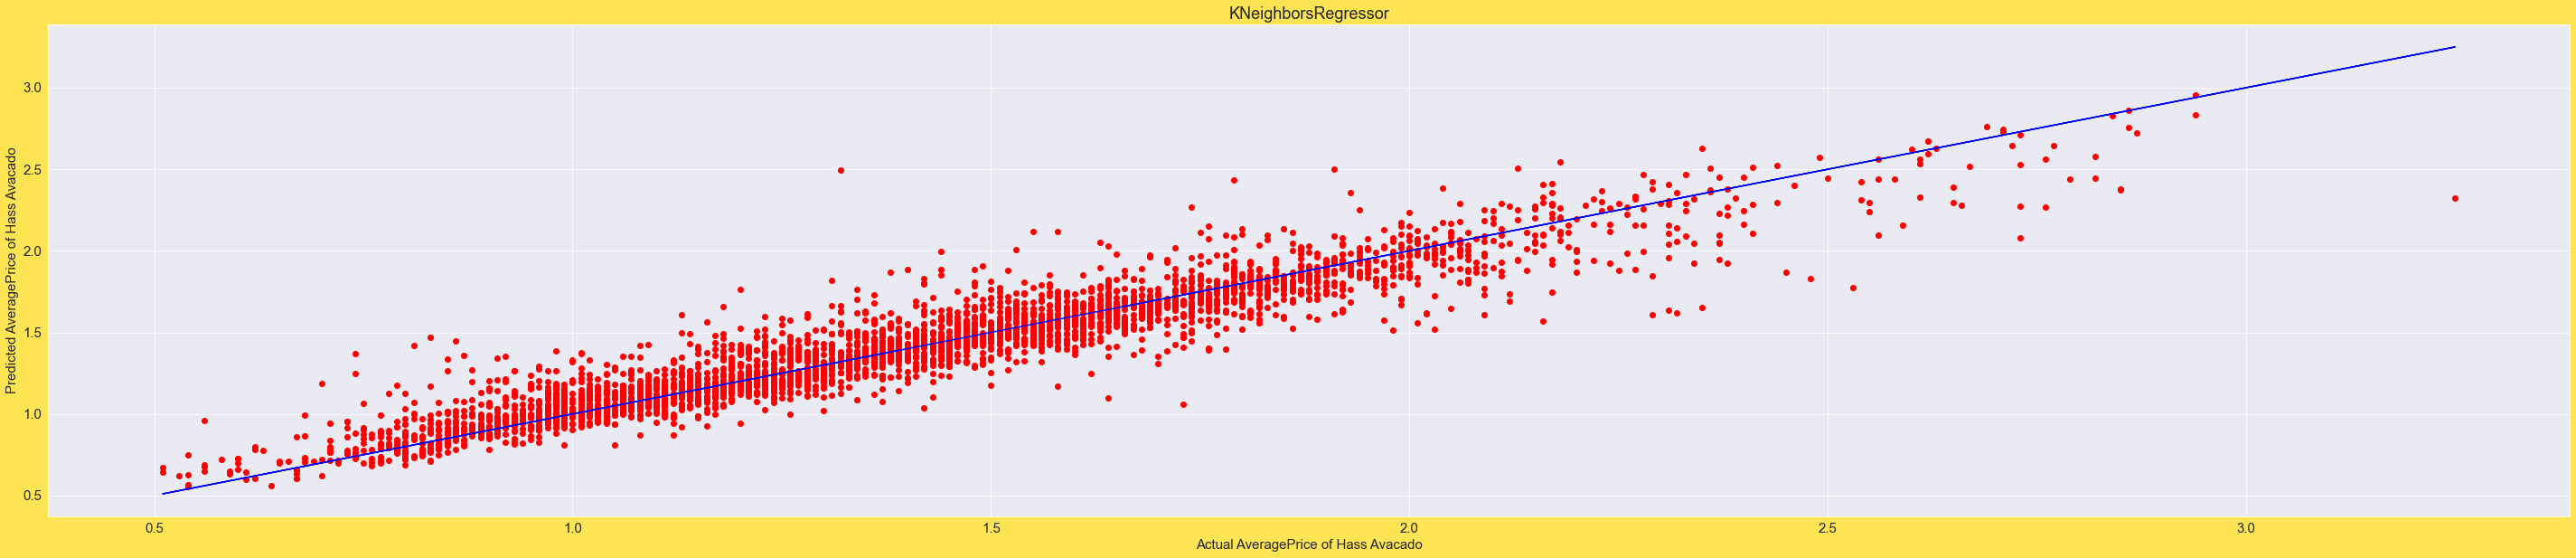

In [429]:
# choosing linear regression as best model with % accuracy
plt.scatter(x=y_test,y=pred_knr_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual AveragePrice of Hass Avacado')
plt.ylabel('Predicted AveragePrice of Hass Avacado')
plt.title('KNeighborsRegressor')

In [430]:
# KNEIGHBORSrEGRESSOR IS GIVING HIGHEST ACCURACY AND ITS CV SCORE IS ALMOST SAME AS ITS ACCURACY
# sO WE ARE SAVING KNEIGHBORS REGRESSOR MODEL

### SAVING THE MODEL

In [431]:
import pickle
filename='Avacado_price'
pickle.dump(knr,open(filename,'wb'))